In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.42


In [3]:
import torch
from gcpds_cv_pykit.datasets import OxfordIITPet
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import UNet
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
OxfordIITPet()

Path to downloaded dataset files: /kaggle/input/oxfordiiitpet
Dataset copied to: /content/datasets/oxfordiiitpet
Could not delete original download folder '/kaggle/input/oxfordiiitpet': [Errno 30] Read-only file system: 'sample_149.png'


'/content/datasets/oxfordiiitpet'

In [ ]:
config = {"Dir of dataset": "./datasets/oxfordiiitpet", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 1, "Single class train": None, "Single class test": None, "Single class valid": None,
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "UNet", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["WandB_API_Key","MasterTests","OxfordIIITPet-UNet-DICE"]}

In [7]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"])

Searching for images in: datasets/oxfordiiitpet/Train/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 1024


Organizing masks: 100%|██████████| 1024/1024 [00:00<00:00, 112533.86it/s]


In [8]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"])

Searching for images in: datasets/oxfordiiitpet/Valid/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 256


Organizing masks: 100%|██████████| 256/256 [00:00<00:00, 101267.74it/s]


In [9]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"])

Searching for images in: datasets/oxfordiiitpet/Test/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 256


Organizing masks: 100%|██████████| 256/256 [00:00<00:00, 74076.70it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 1, 256, 256])


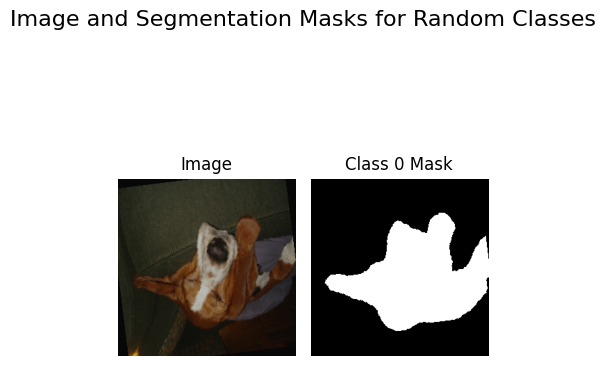

In [10]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 165MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

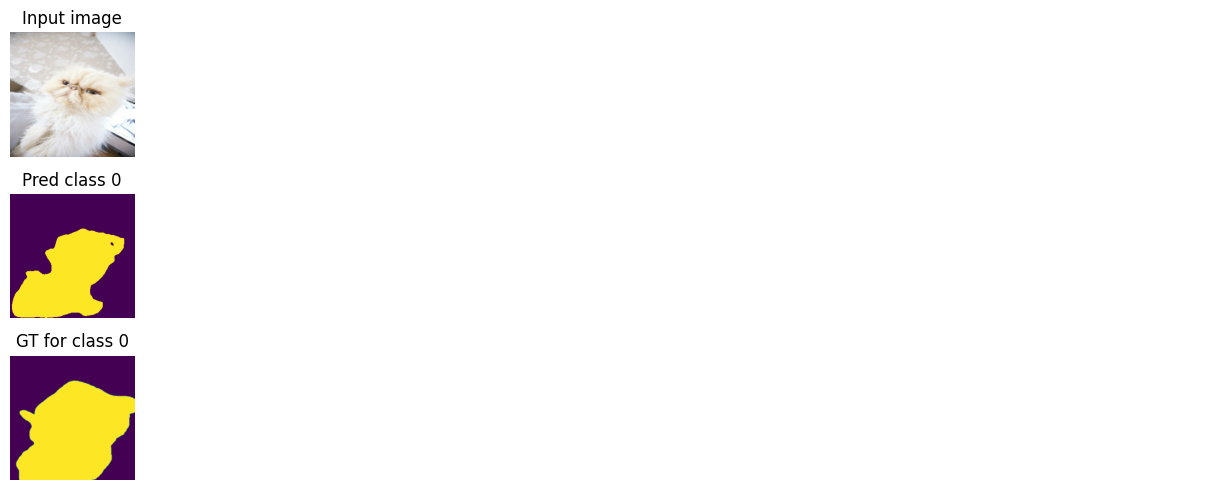

Train loss: 0.34220 | Time: 0m 23s | Val loss: 0.31627
Train_DICE_avg: 0.78580 | Train_Jaccard_avg: 0.67041 | Train_Sensitivity_avg: 0.79032 | Train_Specificity_avg: 0.86622 
Class 0 - Train_DICE: 0.78580 | Train_Jaccard: 0.67041 | Train_Sensitivity: 0.79032 | Train_Specificity: 0.86622 
Val_DICE_avg: 0.85638 | Val_Jaccard_avg: 0.75784 | Val_Sensitivity_avg: 0.91239 | Val_Specificity_avg: 0.86812 
Class 0 - Val_DICE: 0.85638 | Val_Jaccard: 0.75784 | Val_Sensitivity: 0.91239 | Val_Specificity: 0.86812 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

wandb: WARNING Tried to log to step 0 that is less than the current step 1. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.22301 | Time: 0m 45s | Val loss: 0.20694
Train_DICE_avg: 0.88574 | Train_Jaccard_avg: 0.80390 | Train_Sensitivity_avg: 0.85649 | Train_Specificity_avg: 0.93878 
Class 0 - Train_DICE: 0.88574 | Train_Jaccard: 0.80390 | Train_Sensitivity: 0.85649 | Train_Specificity: 0.93878 
Val_DICE_avg: 0.90857 | Val_Jaccard_avg: 0.84036 | Val_Sensitivity_avg: 0.89806 | Val_Specificity_avg: 0.94184 
Class 0 - Val_DICE: 0.90857 | Val_Jaccard: 0.84036 | Val_Sensitivity: 0.89806 | Val_Specificity: 0.94184 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.20006 | Time: 1m 7s | Val loss: 0.19153
Train_DICE_avg: 0.90282 | Train_Jaccard_avg: 0.83053 | Train_Sensitivity_avg: 0.87917 | Train_Specificity_avg: 0.94439 
Class 0 - Train_DICE: 0.90282 | Train_Jaccard: 0.83053 | Train_Sensitivity: 0.87917 | Train_Specificity: 0.94439 
Val_DICE_avg: 0.92131 | Val_Jaccard_avg: 0.86130 | Val_Sensitivity_avg: 0.90975 | Val_Specificity_avg: 0.95346 
Class 0 - Val_DICE: 0.92131 | Val_Jaccard: 0.86130 | Val_Sensitivity: 0.90975 | Val_Specificity: 0.95346 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.18373 | Time: 1m 29s | Val loss: 0.17512
Train_DICE_avg: 0.91307 | Train_Jaccard_avg: 0.84719 | Train_Sensitivity_avg: 0.89229 | Train_Specificity_avg: 0.94983 
Class 0 - Train_DICE: 0.91307 | Train_Jaccard: 0.84719 | Train_Sensitivity: 0.89229 | Train_Specificity: 0.94983 
Val_DICE_avg: 0.92741 | Val_Jaccard_avg: 0.87097 | Val_Sensitivity_avg: 0.93042 | Val_Specificity_avg: 0.94628 
Class 0 - Val_DICE: 0.92741 | Val_Jaccard: 0.87097 | Val_Sensitivity: 0.93042 | Val_Specificity: 0.94628 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.17125 | Time: 1m 51s | Val loss: 0.16353
Train_DICE_avg: 0.91904 | Train_Jaccard_avg: 0.85668 | Train_Sensitivity_avg: 0.90074 | Train_Specificity_avg: 0.95159 
Class 0 - Train_DICE: 0.91904 | Train_Jaccard: 0.85668 | Train_Sensitivity: 0.90074 | Train_Specificity: 0.95159 
Val_DICE_avg: 0.92671 | Val_Jaccard_avg: 0.87003 | Val_Sensitivity_avg: 0.90168 | Val_Specificity_avg: 0.96852 
Class 0 - Val_DICE: 0.92671 | Val_Jaccard: 0.87003 | Val_Sensitivity: 0.90168 | Val_Specificity: 0.96852 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

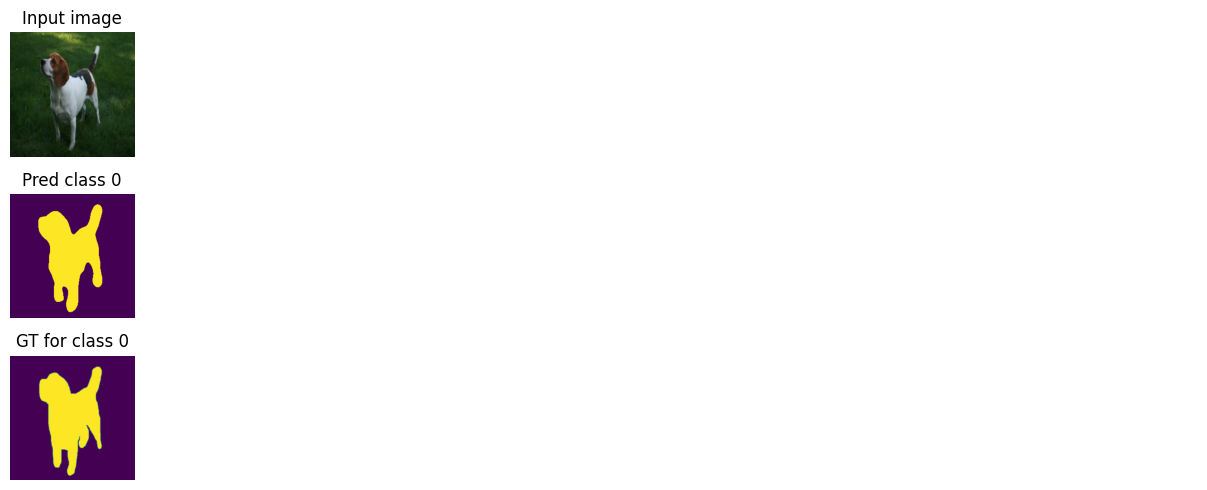

Train loss: 0.16012 | Time: 2m 14s | Val loss: 0.15333
Train_DICE_avg: 0.92407 | Train_Jaccard_avg: 0.86466 | Train_Sensitivity_avg: 0.90749 | Train_Specificity_avg: 0.95337 
Class 0 - Train_DICE: 0.92407 | Train_Jaccard: 0.86466 | Train_Sensitivity: 0.90749 | Train_Specificity: 0.95337 
Val_DICE_avg: 0.93241 | Val_Jaccard_avg: 0.87957 | Val_Sensitivity_avg: 0.93040 | Val_Specificity_avg: 0.95538 
Class 0 - Val_DICE: 0.93241 | Val_Jaccard: 0.87957 | Val_Sensitivity: 0.93040 | Val_Specificity: 0.95538 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15085 | Time: 2m 35s | Val loss: 0.14595
Train_DICE_avg: 0.92790 | Train_Jaccard_avg: 0.87087 | Train_Sensitivity_avg: 0.91474 | Train_Specificity_avg: 0.95372 
Class 0 - Train_DICE: 0.92790 | Train_Jaccard: 0.87087 | Train_Sensitivity: 0.91474 | Train_Specificity: 0.95372 
Val_DICE_avg: 0.93045 | Val_Jaccard_avg: 0.87684 | Val_Sensitivity_avg: 0.90865 | Val_Specificity_avg: 0.96786 
Class 0 - Val_DICE: 0.93045 | Val_Jaccard: 0.87684 | Val_Sensitivity: 0.90865 | Val_Specificity: 0.96786 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14177 | Time: 2m 57s | Val loss: 0.13907
Train_DICE_avg: 0.93116 | Train_Jaccard_avg: 0.87641 | Train_Sensitivity_avg: 0.91753 | Train_Specificity_avg: 0.95689 
Class 0 - Train_DICE: 0.93116 | Train_Jaccard: 0.87641 | Train_Sensitivity: 0.91753 | Train_Specificity: 0.95689 
Val_DICE_avg: 0.93320 | Val_Jaccard_avg: 0.88131 | Val_Sensitivity_avg: 0.92508 | Val_Specificity_avg: 0.96324 
Class 0 - Val_DICE: 0.93320 | Val_Jaccard: 0.88131 | Val_Sensitivity: 0.92508 | Val_Specificity: 0.96324 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13614 | Time: 3m 19s | Val loss: 0.13507
Train_DICE_avg: 0.93141 | Train_Jaccard_avg: 0.87684 | Train_Sensitivity_avg: 0.91896 | Train_Specificity_avg: 0.95520 
Class 0 - Train_DICE: 0.93141 | Train_Jaccard: 0.87684 | Train_Sensitivity: 0.91896 | Train_Specificity: 0.95520 
Val_DICE_avg: 0.93398 | Val_Jaccard_avg: 0.88236 | Val_Sensitivity_avg: 0.92715 | Val_Specificity_avg: 0.96138 
Class 0 - Val_DICE: 0.93398 | Val_Jaccard: 0.88236 | Val_Sensitivity: 0.92715 | Val_Specificity: 0.96138 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13003 | Time: 3m 41s | Val loss: 0.12663
Train_DICE_avg: 0.93282 | Train_Jaccard_avg: 0.87954 | Train_Sensitivity_avg: 0.92161 | Train_Specificity_avg: 0.95733 
Class 0 - Train_DICE: 0.93282 | Train_Jaccard: 0.87954 | Train_Sensitivity: 0.92161 | Train_Specificity: 0.95733 
Val_DICE_avg: 0.93342 | Val_Jaccard_avg: 0.88182 | Val_Sensitivity_avg: 0.92211 | Val_Specificity_avg: 0.96463 
Class 0 - Val_DICE: 0.93342 | Val_Jaccard: 0.88182 | Val_Sensitivity: 0.92211 | Val_Specificity: 0.96463 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

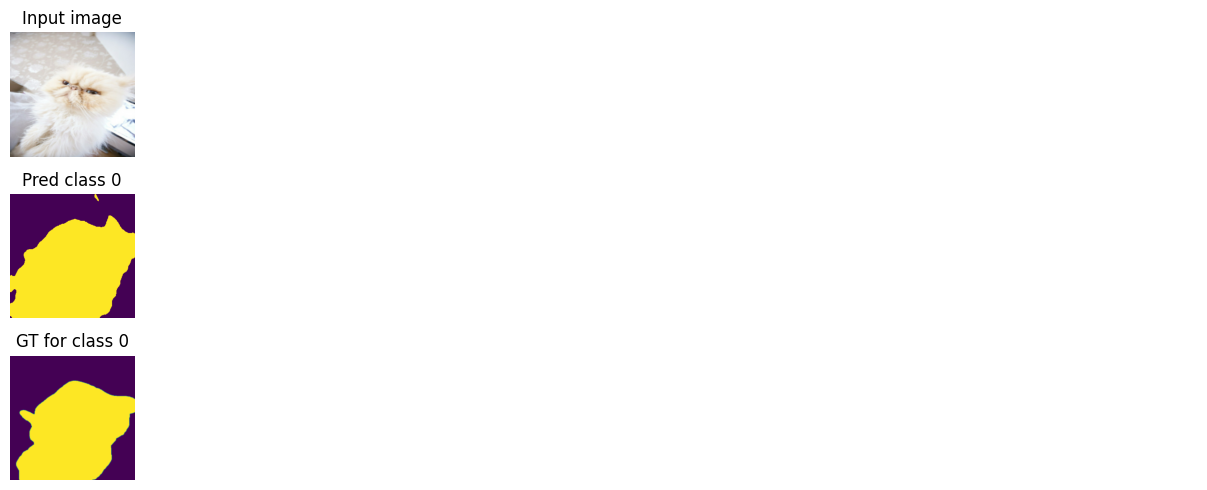

Train loss: 0.12398 | Time: 4m 4s | Val loss: 0.12406
Train_DICE_avg: 0.93400 | Train_Jaccard_avg: 0.88082 | Train_Sensitivity_avg: 0.92353 | Train_Specificity_avg: 0.95605 
Class 0 - Train_DICE: 0.93400 | Train_Jaccard: 0.88082 | Train_Sensitivity: 0.92353 | Train_Specificity: 0.95605 
Val_DICE_avg: 0.93358 | Val_Jaccard_avg: 0.88226 | Val_Sensitivity_avg: 0.93946 | Val_Specificity_avg: 0.95714 
Class 0 - Val_DICE: 0.93358 | Val_Jaccard: 0.88226 | Val_Sensitivity: 0.93946 | Val_Specificity: 0.95714 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11697 | Time: 4m 26s | Val loss: 0.11338
Train_DICE_avg: 0.93562 | Train_Jaccard_avg: 0.88402 | Train_Sensitivity_avg: 0.92632 | Train_Specificity_avg: 0.95673 
Class 0 - Train_DICE: 0.93562 | Train_Jaccard: 0.88402 | Train_Sensitivity: 0.92632 | Train_Specificity: 0.95673 
Val_DICE_avg: 0.93603 | Val_Jaccard_avg: 0.88654 | Val_Sensitivity_avg: 0.93537 | Val_Specificity_avg: 0.95892 
Class 0 - Val_DICE: 0.93603 | Val_Jaccard: 0.88654 | Val_Sensitivity: 0.93537 | Val_Specificity: 0.95892 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11165 | Time: 4m 49s | Val loss: 0.11178
Train_DICE_avg: 0.93650 | Train_Jaccard_avg: 0.88526 | Train_Sensitivity_avg: 0.92811 | Train_Specificity_avg: 0.95604 
Class 0 - Train_DICE: 0.93650 | Train_Jaccard: 0.88526 | Train_Sensitivity: 0.92811 | Train_Specificity: 0.95604 
Val_DICE_avg: 0.93466 | Val_Jaccard_avg: 0.88479 | Val_Sensitivity_avg: 0.94182 | Val_Specificity_avg: 0.95730 
Class 0 - Val_DICE: 0.93466 | Val_Jaccard: 0.88479 | Val_Sensitivity: 0.94182 | Val_Specificity: 0.95730 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10549 | Time: 5m 11s | Val loss: 0.10743
Train_DICE_avg: 0.93841 | Train_Jaccard_avg: 0.88876 | Train_Sensitivity_avg: 0.92911 | Train_Specificity_avg: 0.95910 
Class 0 - Train_DICE: 0.93841 | Train_Jaccard: 0.88876 | Train_Sensitivity: 0.92911 | Train_Specificity: 0.95910 
Val_DICE_avg: 0.93597 | Val_Jaccard_avg: 0.88661 | Val_Sensitivity_avg: 0.92300 | Val_Specificity_avg: 0.96901 
Class 0 - Val_DICE: 0.93597 | Val_Jaccard: 0.88661 | Val_Sensitivity: 0.92300 | Val_Specificity: 0.96901 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10048 | Time: 5m 33s | Val loss: 0.10106
Train_DICE_avg: 0.94008 | Train_Jaccard_avg: 0.89145 | Train_Sensitivity_avg: 0.93290 | Train_Specificity_avg: 0.95868 
Class 0 - Train_DICE: 0.94008 | Train_Jaccard: 0.89145 | Train_Sensitivity: 0.93290 | Train_Specificity: 0.95868 
Val_DICE_avg: 0.93532 | Val_Jaccard_avg: 0.88540 | Val_Sensitivity_avg: 0.95121 | Val_Specificity_avg: 0.94821 
Class 0 - Val_DICE: 0.93532 | Val_Jaccard: 0.88540 | Val_Sensitivity: 0.95121 | Val_Specificity: 0.94821 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

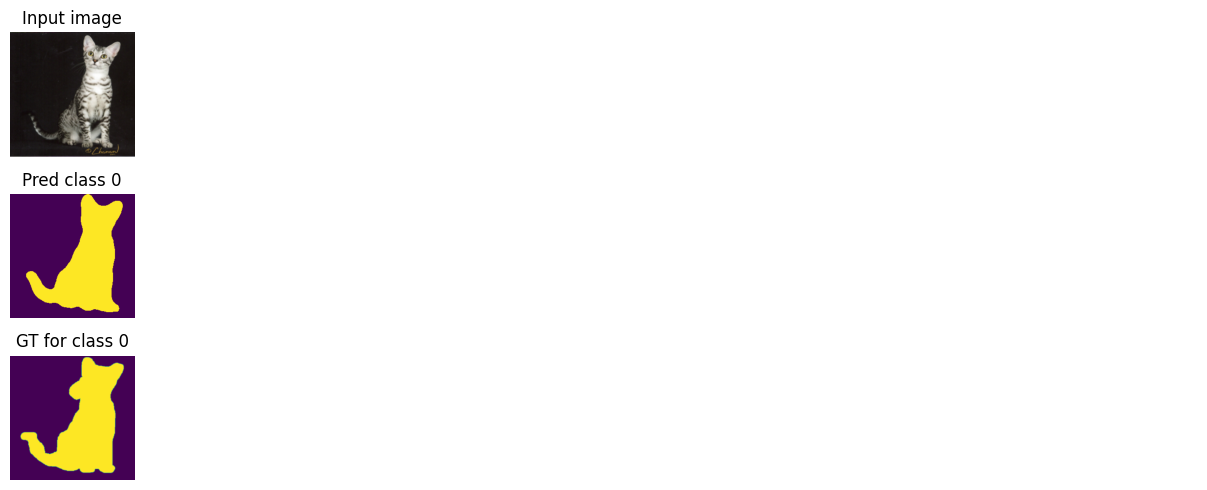

Train loss: 0.09662 | Time: 5m 56s | Val loss: 0.09678
Train_DICE_avg: 0.94067 | Train_Jaccard_avg: 0.89244 | Train_Sensitivity_avg: 0.93389 | Train_Specificity_avg: 0.95875 
Class 0 - Train_DICE: 0.94067 | Train_Jaccard: 0.89244 | Train_Sensitivity: 0.93389 | Train_Specificity: 0.95875 
Val_DICE_avg: 0.93916 | Val_Jaccard_avg: 0.89176 | Val_Sensitivity_avg: 0.93706 | Val_Specificity_avg: 0.96339 
Class 0 - Val_DICE: 0.93916 | Val_Jaccard: 0.89176 | Val_Sensitivity: 0.93706 | Val_Specificity: 0.96339 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09336 | Time: 6m 18s | Val loss: 0.09389
Train_DICE_avg: 0.94104 | Train_Jaccard_avg: 0.89304 | Train_Sensitivity_avg: 0.93451 | Train_Specificity_avg: 0.95880 
Class 0 - Train_DICE: 0.94104 | Train_Jaccard: 0.89304 | Train_Sensitivity: 0.93451 | Train_Specificity: 0.95880 
Val_DICE_avg: 0.93851 | Val_Jaccard_avg: 0.89076 | Val_Sensitivity_avg: 0.95260 | Val_Specificity_avg: 0.95321 
Class 0 - Val_DICE: 0.93851 | Val_Jaccard: 0.89076 | Val_Sensitivity: 0.95260 | Val_Specificity: 0.95321 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09074 | Time: 6m 41s | Val loss: 0.09350
Train_DICE_avg: 0.94094 | Train_Jaccard_avg: 0.89294 | Train_Sensitivity_avg: 0.93391 | Train_Specificity_avg: 0.95766 
Class 0 - Train_DICE: 0.94094 | Train_Jaccard: 0.89294 | Train_Sensitivity: 0.93391 | Train_Specificity: 0.95766 
Val_DICE_avg: 0.93524 | Val_Jaccard_avg: 0.88431 | Val_Sensitivity_avg: 0.95469 | Val_Specificity_avg: 0.94870 
Class 0 - Val_DICE: 0.93524 | Val_Jaccard: 0.88431 | Val_Sensitivity: 0.95469 | Val_Specificity: 0.94870 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08701 | Time: 7m 3s | Val loss: 0.09708
Train_DICE_avg: 0.94261 | Train_Jaccard_avg: 0.89567 | Train_Sensitivity_avg: 0.93774 | Train_Specificity_avg: 0.95730 
Class 0 - Train_DICE: 0.94261 | Train_Jaccard: 0.89567 | Train_Sensitivity: 0.93774 | Train_Specificity: 0.95730 
Val_DICE_avg: 0.92896 | Val_Jaccard_avg: 0.87599 | Val_Sensitivity_avg: 0.95379 | Val_Specificity_avg: 0.94270 
Class 0 - Val_DICE: 0.92896 | Val_Jaccard: 0.87599 | Val_Sensitivity: 0.95379 | Val_Specificity: 0.94270 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08348 | Time: 7m 25s | Val loss: 0.09213
Train_DICE_avg: 0.94402 | Train_Jaccard_avg: 0.89805 | Train_Sensitivity_avg: 0.93786 | Train_Specificity_avg: 0.96085 
Class 0 - Train_DICE: 0.94402 | Train_Jaccard: 0.89805 | Train_Sensitivity: 0.93786 | Train_Specificity: 0.96085 
Val_DICE_avg: 0.93321 | Val_Jaccard_avg: 0.88195 | Val_Sensitivity_avg: 0.94585 | Val_Specificity_avg: 0.95443 
Class 0 - Val_DICE: 0.93321 | Val_Jaccard: 0.88195 | Val_Sensitivity: 0.94585 | Val_Specificity: 0.95443 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

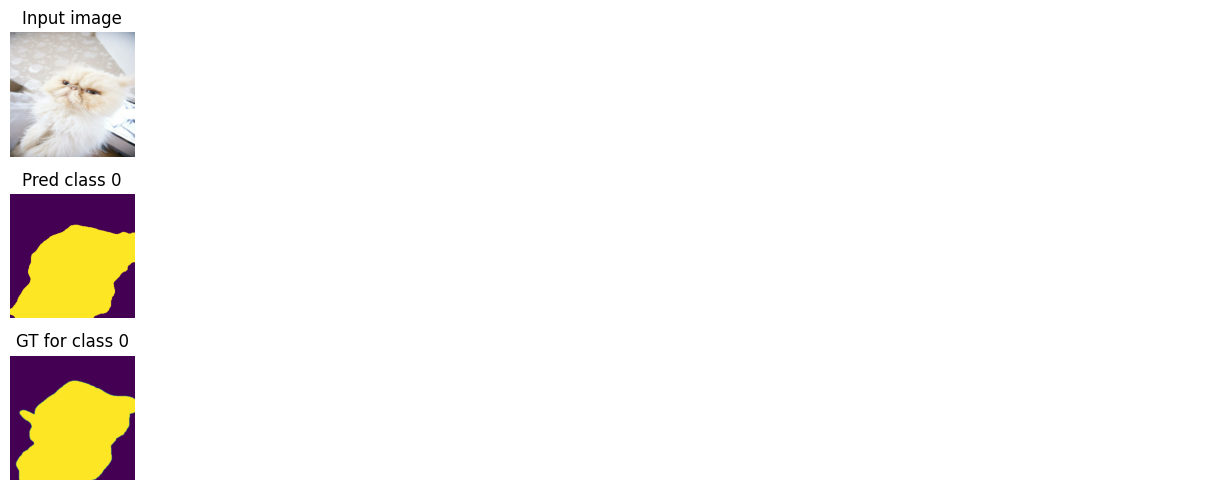

Train loss: 0.08114 | Time: 7m 48s | Val loss: 0.08460
Train_DICE_avg: 0.94408 | Train_Jaccard_avg: 0.89822 | Train_Sensitivity_avg: 0.93952 | Train_Specificity_avg: 0.95946 
Class 0 - Train_DICE: 0.94408 | Train_Jaccard: 0.89822 | Train_Sensitivity: 0.93952 | Train_Specificity: 0.95946 
Val_DICE_avg: 0.93815 | Val_Jaccard_avg: 0.88971 | Val_Sensitivity_avg: 0.95459 | Val_Specificity_avg: 0.95054 
Class 0 - Val_DICE: 0.93815 | Val_Jaccard: 0.88971 | Val_Sensitivity: 0.95459 | Val_Specificity: 0.95054 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07760 | Time: 8m 10s | Val loss: 0.08244
Train_DICE_avg: 0.94518 | Train_Jaccard_avg: 0.90001 | Train_Sensitivity_avg: 0.94101 | Train_Specificity_avg: 0.95938 
Class 0 - Train_DICE: 0.94518 | Train_Jaccard: 0.90001 | Train_Sensitivity: 0.94101 | Train_Specificity: 0.95938 
Val_DICE_avg: 0.93765 | Val_Jaccard_avg: 0.88924 | Val_Sensitivity_avg: 0.95471 | Val_Specificity_avg: 0.95178 
Class 0 - Val_DICE: 0.93765 | Val_Jaccard: 0.88924 | Val_Sensitivity: 0.95471 | Val_Specificity: 0.95178 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07497 | Time: 8m 33s | Val loss: 0.07967
Train_DICE_avg: 0.94567 | Train_Jaccard_avg: 0.90090 | Train_Sensitivity_avg: 0.94032 | Train_Specificity_avg: 0.96111 
Class 0 - Train_DICE: 0.94567 | Train_Jaccard: 0.90090 | Train_Sensitivity: 0.94032 | Train_Specificity: 0.96111 
Val_DICE_avg: 0.93967 | Val_Jaccard_avg: 0.89240 | Val_Sensitivity_avg: 0.95310 | Val_Specificity_avg: 0.95262 
Class 0 - Val_DICE: 0.93967 | Val_Jaccard: 0.89240 | Val_Sensitivity: 0.95310 | Val_Specificity: 0.95262 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07169 | Time: 8m 55s | Val loss: 0.08024
Train_DICE_avg: 0.94733 | Train_Jaccard_avg: 0.90372 | Train_Sensitivity_avg: 0.94417 | Train_Specificity_avg: 0.96034 
Class 0 - Train_DICE: 0.94733 | Train_Jaccard: 0.90372 | Train_Sensitivity: 0.94417 | Train_Specificity: 0.96034 
Val_DICE_avg: 0.93704 | Val_Jaccard_avg: 0.88852 | Val_Sensitivity_avg: 0.94914 | Val_Specificity_avg: 0.95451 
Class 0 - Val_DICE: 0.93704 | Val_Jaccard: 0.88852 | Val_Sensitivity: 0.94914 | Val_Specificity: 0.95451 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06995 | Time: 9m 17s | Val loss: 0.07677
Train_DICE_avg: 0.94729 | Train_Jaccard_avg: 0.90387 | Train_Sensitivity_avg: 0.94328 | Train_Specificity_avg: 0.96245 
Class 0 - Train_DICE: 0.94729 | Train_Jaccard: 0.90387 | Train_Sensitivity: 0.94328 | Train_Specificity: 0.96245 
Val_DICE_avg: 0.93731 | Val_Jaccard_avg: 0.88879 | Val_Sensitivity_avg: 0.95398 | Val_Specificity_avg: 0.95186 
Class 0 - Val_DICE: 0.93731 | Val_Jaccard: 0.88879 | Val_Sensitivity: 0.95398 | Val_Specificity: 0.95186 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

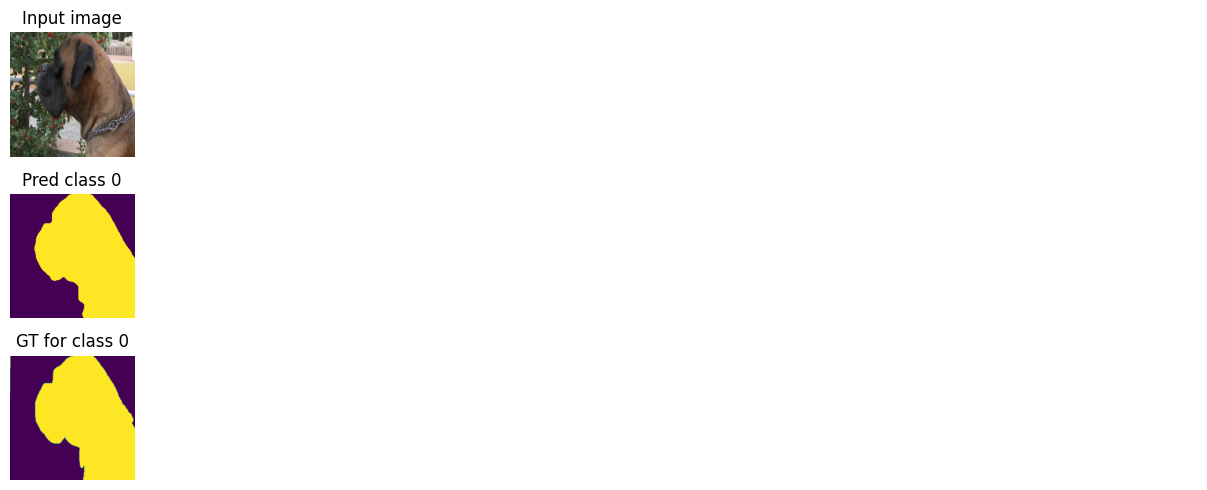

Train loss: 0.06643 | Time: 9m 40s | Val loss: 0.07456
Train_DICE_avg: 0.94956 | Train_Jaccard_avg: 0.90762 | Train_Sensitivity_avg: 0.94706 | Train_Specificity_avg: 0.96077 
Class 0 - Train_DICE: 0.94956 | Train_Jaccard: 0.90762 | Train_Sensitivity: 0.94706 | Train_Specificity: 0.96077 
Val_DICE_avg: 0.93893 | Val_Jaccard_avg: 0.89134 | Val_Sensitivity_avg: 0.95391 | Val_Specificity_avg: 0.95534 
Class 0 - Val_DICE: 0.93893 | Val_Jaccard: 0.89134 | Val_Sensitivity: 0.95391 | Val_Specificity: 0.95534 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06598 | Time: 10m 2s | Val loss: 0.07492
Train_DICE_avg: 0.94864 | Train_Jaccard_avg: 0.90623 | Train_Sensitivity_avg: 0.94490 | Train_Specificity_avg: 0.96256 
Class 0 - Train_DICE: 0.94864 | Train_Jaccard: 0.90623 | Train_Sensitivity: 0.94490 | Train_Specificity: 0.96256 
Val_DICE_avg: 0.93831 | Val_Jaccard_avg: 0.89045 | Val_Sensitivity_avg: 0.94686 | Val_Specificity_avg: 0.95783 
Class 0 - Val_DICE: 0.93831 | Val_Jaccard: 0.89045 | Val_Sensitivity: 0.94686 | Val_Specificity: 0.95783 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06376 | Time: 10m 24s | Val loss: 0.07714
Train_DICE_avg: 0.94975 | Train_Jaccard_avg: 0.90802 | Train_Sensitivity_avg: 0.94751 | Train_Specificity_avg: 0.96217 
Class 0 - Train_DICE: 0.94975 | Train_Jaccard: 0.90802 | Train_Sensitivity: 0.94751 | Train_Specificity: 0.96217 
Val_DICE_avg: 0.93453 | Val_Jaccard_avg: 0.88481 | Val_Sensitivity_avg: 0.96091 | Val_Specificity_avg: 0.94636 
Class 0 - Val_DICE: 0.93453 | Val_Jaccard: 0.88481 | Val_Sensitivity: 0.96091 | Val_Specificity: 0.94636 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06316 | Time: 10m 47s | Val loss: 0.07094
Train_DICE_avg: 0.94938 | Train_Jaccard_avg: 0.90740 | Train_Sensitivity_avg: 0.94722 | Train_Specificity_avg: 0.96110 
Class 0 - Train_DICE: 0.94938 | Train_Jaccard: 0.90740 | Train_Sensitivity: 0.94722 | Train_Specificity: 0.96110 
Val_DICE_avg: 0.93985 | Val_Jaccard_avg: 0.89237 | Val_Sensitivity_avg: 0.95042 | Val_Specificity_avg: 0.95497 
Class 0 - Val_DICE: 0.93985 | Val_Jaccard: 0.89237 | Val_Sensitivity: 0.95042 | Val_Specificity: 0.95497 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06115 | Time: 11m 10s | Val loss: 0.07013
Train_DICE_avg: 0.95055 | Train_Jaccard_avg: 0.90934 | Train_Sensitivity_avg: 0.94867 | Train_Specificity_avg: 0.96210 
Class 0 - Train_DICE: 0.95055 | Train_Jaccard: 0.90934 | Train_Sensitivity: 0.94867 | Train_Specificity: 0.96210 
Val_DICE_avg: 0.94066 | Val_Jaccard_avg: 0.89400 | Val_Sensitivity_avg: 0.94377 | Val_Specificity_avg: 0.95982 
Class 0 - Val_DICE: 0.94066 | Val_Jaccard: 0.89400 | Val_Sensitivity: 0.94377 | Val_Specificity: 0.95982 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

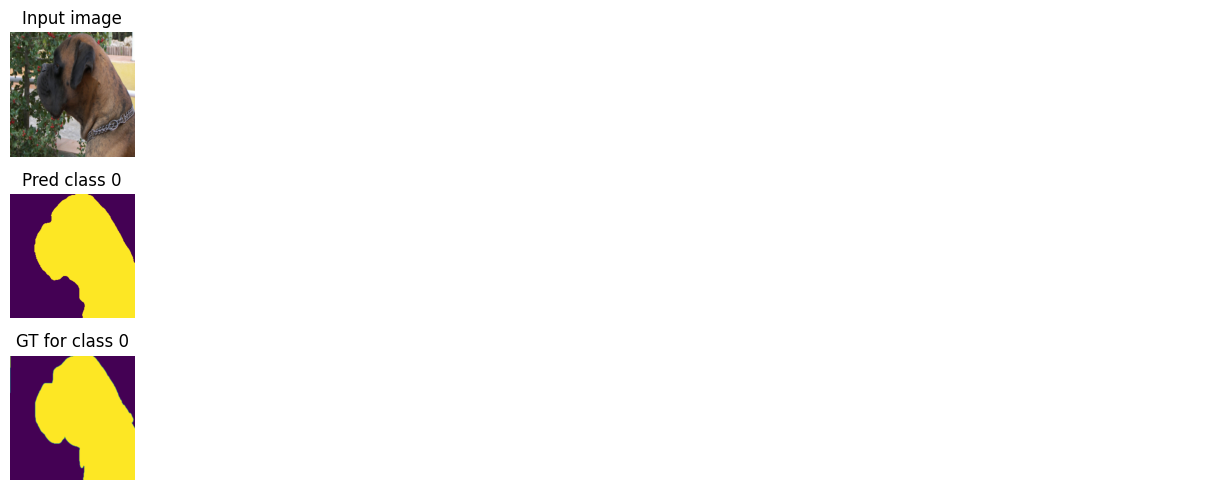

Train loss: 0.06106 | Time: 11m 32s | Val loss: 0.07529
Train_DICE_avg: 0.94965 | Train_Jaccard_avg: 0.90788 | Train_Sensitivity_avg: 0.94912 | Train_Specificity_avg: 0.95993 
Class 0 - Train_DICE: 0.94965 | Train_Jaccard: 0.90788 | Train_Sensitivity: 0.94912 | Train_Specificity: 0.95993 
Val_DICE_avg: 0.93424 | Val_Jaccard_avg: 0.88408 | Val_Sensitivity_avg: 0.95537 | Val_Specificity_avg: 0.94912 
Class 0 - Val_DICE: 0.93424 | Val_Jaccard: 0.88408 | Val_Sensitivity: 0.95537 | Val_Specificity: 0.94912 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05886 | Time: 11m 55s | Val loss: 0.07000
Train_DICE_avg: 0.95073 | Train_Jaccard_avg: 0.90974 | Train_Sensitivity_avg: 0.94910 | Train_Specificity_avg: 0.96327 
Class 0 - Train_DICE: 0.95073 | Train_Jaccard: 0.90974 | Train_Sensitivity: 0.94910 | Train_Specificity: 0.96327 
Val_DICE_avg: 0.93813 | Val_Jaccard_avg: 0.89002 | Val_Sensitivity_avg: 0.95342 | Val_Specificity_avg: 0.95305 
Class 0 - Val_DICE: 0.93813 | Val_Jaccard: 0.89002 | Val_Sensitivity: 0.95342 | Val_Specificity: 0.95305 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05645 | Time: 12m 17s | Val loss: 0.06899
Train_DICE_avg: 0.95238 | Train_Jaccard_avg: 0.91262 | Train_Sensitivity_avg: 0.95119 | Train_Specificity_avg: 0.96323 
Class 0 - Train_DICE: 0.95238 | Train_Jaccard: 0.91262 | Train_Sensitivity: 0.95119 | Train_Specificity: 0.96323 
Val_DICE_avg: 0.93925 | Val_Jaccard_avg: 0.89229 | Val_Sensitivity_avg: 0.95647 | Val_Specificity_avg: 0.95175 
Class 0 - Val_DICE: 0.93925 | Val_Jaccard: 0.89229 | Val_Sensitivity: 0.95647 | Val_Specificity: 0.95175 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05500 | Time: 12m 39s | Val loss: 0.06690
Train_DICE_avg: 0.95305 | Train_Jaccard_avg: 0.91387 | Train_Sensitivity_avg: 0.95158 | Train_Specificity_avg: 0.96444 
Class 0 - Train_DICE: 0.95305 | Train_Jaccard: 0.91387 | Train_Sensitivity: 0.95158 | Train_Specificity: 0.96444 
Val_DICE_avg: 0.94017 | Val_Jaccard_avg: 0.89356 | Val_Sensitivity_avg: 0.94882 | Val_Specificity_avg: 0.95623 
Class 0 - Val_DICE: 0.94017 | Val_Jaccard: 0.89356 | Val_Sensitivity: 0.94882 | Val_Specificity: 0.95623 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05409 | Time: 13m 2s | Val loss: 0.06678
Train_DICE_avg: 0.95338 | Train_Jaccard_avg: 0.91430 | Train_Sensitivity_avg: 0.95242 | Train_Specificity_avg: 0.96287 
Class 0 - Train_DICE: 0.95338 | Train_Jaccard: 0.91430 | Train_Sensitivity: 0.95242 | Train_Specificity: 0.96287 
Val_DICE_avg: 0.94017 | Val_Jaccard_avg: 0.89345 | Val_Sensitivity_avg: 0.95149 | Val_Specificity_avg: 0.95505 
Class 0 - Val_DICE: 0.94017 | Val_Jaccard: 0.89345 | Val_Sensitivity: 0.95149 | Val_Specificity: 0.95505 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

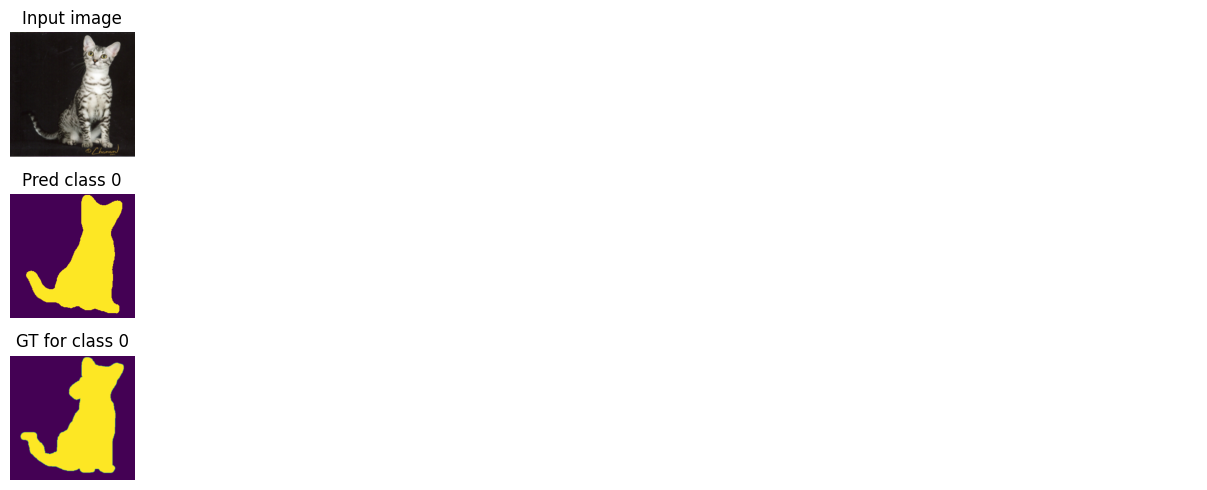

Train loss: 0.05231 | Time: 13m 25s | Val loss: 0.06417
Train_DICE_avg: 0.95468 | Train_Jaccard_avg: 0.91661 | Train_Sensitivity_avg: 0.95381 | Train_Specificity_avg: 0.96500 
Class 0 - Train_DICE: 0.95468 | Train_Jaccard: 0.91661 | Train_Sensitivity: 0.95381 | Train_Specificity: 0.96500 
Val_DICE_avg: 0.94228 | Val_Jaccard_avg: 0.89695 | Val_Sensitivity_avg: 0.94527 | Val_Specificity_avg: 0.96061 
Class 0 - Val_DICE: 0.94228 | Val_Jaccard: 0.89695 | Val_Sensitivity: 0.94527 | Val_Specificity: 0.96061 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05154 | Time: 13m 48s | Val loss: 0.06475
Train_DICE_avg: 0.95507 | Train_Jaccard_avg: 0.91744 | Train_Sensitivity_avg: 0.95441 | Train_Specificity_avg: 0.96505 
Class 0 - Train_DICE: 0.95507 | Train_Jaccard: 0.91744 | Train_Sensitivity: 0.95441 | Train_Specificity: 0.96505 
Val_DICE_avg: 0.94123 | Val_Jaccard_avg: 0.89525 | Val_Sensitivity_avg: 0.95360 | Val_Specificity_avg: 0.95487 
Class 0 - Val_DICE: 0.94123 | Val_Jaccard: 0.89525 | Val_Sensitivity: 0.95360 | Val_Specificity: 0.95487 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05028 | Time: 14m 10s | Val loss: 0.06553
Train_DICE_avg: 0.95595 | Train_Jaccard_avg: 0.91890 | Train_Sensitivity_avg: 0.95540 | Train_Specificity_avg: 0.96607 
Class 0 - Train_DICE: 0.95595 | Train_Jaccard: 0.91890 | Train_Sensitivity: 0.95540 | Train_Specificity: 0.96607 
Val_DICE_avg: 0.94021 | Val_Jaccard_avg: 0.89355 | Val_Sensitivity_avg: 0.95417 | Val_Specificity_avg: 0.95462 
Class 0 - Val_DICE: 0.94021 | Val_Jaccard: 0.89355 | Val_Sensitivity: 0.95417 | Val_Specificity: 0.95462 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04867 | Time: 14m 33s | Val loss: 0.06335
Train_DICE_avg: 0.95733 | Train_Jaccard_avg: 0.92131 | Train_Sensitivity_avg: 0.95678 | Train_Specificity_avg: 0.96680 
Class 0 - Train_DICE: 0.95733 | Train_Jaccard: 0.92131 | Train_Sensitivity: 0.95678 | Train_Specificity: 0.96680 
Val_DICE_avg: 0.94194 | Val_Jaccard_avg: 0.89634 | Val_Sensitivity_avg: 0.95130 | Val_Specificity_avg: 0.95674 
Class 0 - Val_DICE: 0.94194 | Val_Jaccard: 0.89634 | Val_Sensitivity: 0.95130 | Val_Specificity: 0.95674 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04867 | Time: 14m 55s | Val loss: 0.06474
Train_DICE_avg: 0.95704 | Train_Jaccard_avg: 0.92083 | Train_Sensitivity_avg: 0.95663 | Train_Specificity_avg: 0.96611 
Class 0 - Train_DICE: 0.95704 | Train_Jaccard: 0.92083 | Train_Sensitivity: 0.95663 | Train_Specificity: 0.96611 
Val_DICE_avg: 0.94102 | Val_Jaccard_avg: 0.89508 | Val_Sensitivity_avg: 0.94316 | Val_Specificity_avg: 0.96276 
Class 0 - Val_DICE: 0.94102 | Val_Jaccard: 0.89508 | Val_Sensitivity: 0.94316 | Val_Specificity: 0.96276 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

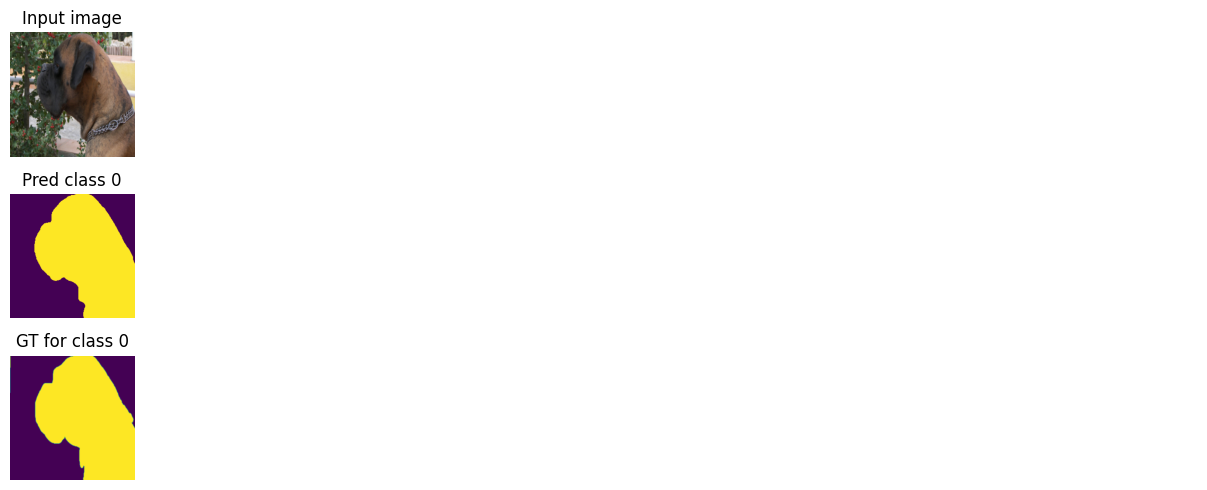

Train loss: 0.04842 | Time: 15m 18s | Val loss: 0.06307
Train_DICE_avg: 0.95696 | Train_Jaccard_avg: 0.92070 | Train_Sensitivity_avg: 0.95601 | Train_Specificity_avg: 0.96671 
Class 0 - Train_DICE: 0.95696 | Train_Jaccard: 0.92070 | Train_Sensitivity: 0.95601 | Train_Specificity: 0.96671 
Val_DICE_avg: 0.94205 | Val_Jaccard_avg: 0.89710 | Val_Sensitivity_avg: 0.94309 | Val_Specificity_avg: 0.96270 
Class 0 - Val_DICE: 0.94205 | Val_Jaccard: 0.89710 | Val_Sensitivity: 0.94309 | Val_Specificity: 0.96270 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04722 | Time: 15m 40s | Val loss: 0.06421
Train_DICE_avg: 0.95797 | Train_Jaccard_avg: 0.92255 | Train_Sensitivity_avg: 0.95714 | Train_Specificity_avg: 0.96828 
Class 0 - Train_DICE: 0.95797 | Train_Jaccard: 0.92255 | Train_Sensitivity: 0.95714 | Train_Specificity: 0.96828 
Val_DICE_avg: 0.94134 | Val_Jaccard_avg: 0.89566 | Val_Sensitivity_avg: 0.94119 | Val_Specificity_avg: 0.96370 
Class 0 - Val_DICE: 0.94134 | Val_Jaccard: 0.89566 | Val_Sensitivity: 0.94119 | Val_Specificity: 0.96370 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04699 | Time: 16m 3s | Val loss: 0.06235
Train_DICE_avg: 0.95799 | Train_Jaccard_avg: 0.92277 | Train_Sensitivity_avg: 0.95746 | Train_Specificity_avg: 0.96783 
Class 0 - Train_DICE: 0.95799 | Train_Jaccard: 0.92277 | Train_Sensitivity: 0.95746 | Train_Specificity: 0.96783 
Val_DICE_avg: 0.94267 | Val_Jaccard_avg: 0.89761 | Val_Sensitivity_avg: 0.94059 | Val_Specificity_avg: 0.96512 
Class 0 - Val_DICE: 0.94267 | Val_Jaccard: 0.89761 | Val_Sensitivity: 0.94059 | Val_Specificity: 0.96512 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04525 | Time: 16m 26s | Val loss: 0.06373
Train_DICE_avg: 0.95963 | Train_Jaccard_avg: 0.92554 | Train_Sensitivity_avg: 0.95886 | Train_Specificity_avg: 0.96862 
Class 0 - Train_DICE: 0.95963 | Train_Jaccard: 0.92554 | Train_Sensitivity: 0.95886 | Train_Specificity: 0.96862 
Val_DICE_avg: 0.94137 | Val_Jaccard_avg: 0.89555 | Val_Sensitivity_avg: 0.93990 | Val_Specificity_avg: 0.96460 
Class 0 - Val_DICE: 0.94137 | Val_Jaccard: 0.89555 | Val_Sensitivity: 0.93990 | Val_Specificity: 0.96460 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04564 | Time: 16m 48s | Val loss: 0.06250
Train_DICE_avg: 0.95908 | Train_Jaccard_avg: 0.92454 | Train_Sensitivity_avg: 0.95881 | Train_Specificity_avg: 0.96865 
Class 0 - Train_DICE: 0.95908 | Train_Jaccard: 0.92454 | Train_Sensitivity: 0.95881 | Train_Specificity: 0.96865 
Val_DICE_avg: 0.94212 | Val_Jaccard_avg: 0.89672 | Val_Sensitivity_avg: 0.94276 | Val_Specificity_avg: 0.96307 
Class 0 - Val_DICE: 0.94212 | Val_Jaccard: 0.89672 | Val_Sensitivity: 0.94276 | Val_Specificity: 0.96307 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

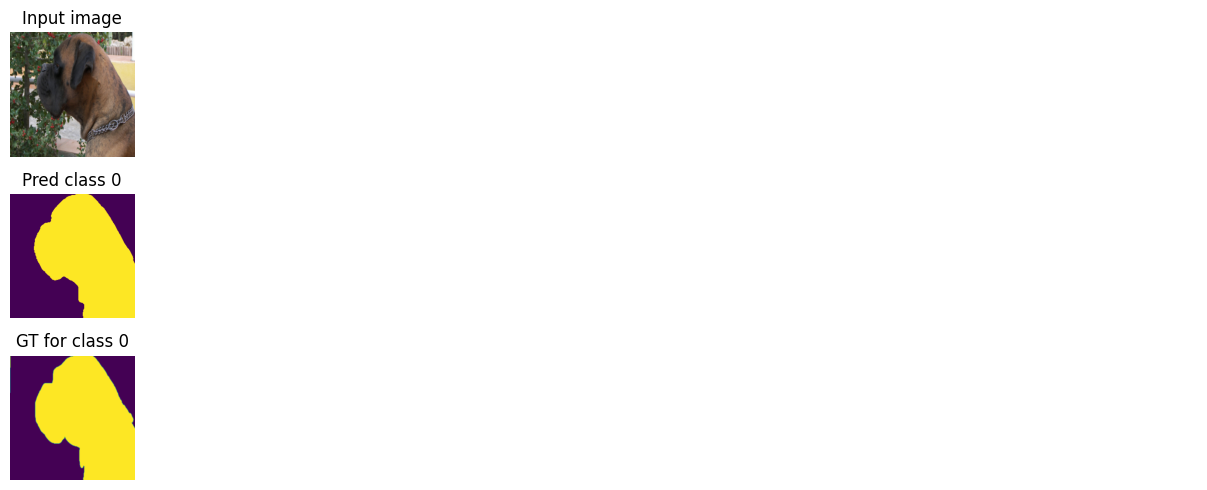

Train loss: 0.04458 | Time: 17m 11s | Val loss: 0.06304
Train_DICE_avg: 0.96005 | Train_Jaccard_avg: 0.92622 | Train_Sensitivity_avg: 0.95917 | Train_Specificity_avg: 0.96899 
Class 0 - Train_DICE: 0.96005 | Train_Jaccard: 0.92622 | Train_Sensitivity: 0.95917 | Train_Specificity: 0.96899 
Val_DICE_avg: 0.94166 | Val_Jaccard_avg: 0.89586 | Val_Sensitivity_avg: 0.93730 | Val_Specificity_avg: 0.96636 
Class 0 - Val_DICE: 0.94166 | Val_Jaccard: 0.89586 | Val_Sensitivity: 0.93730 | Val_Specificity: 0.96636 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04427 | Time: 17m 33s | Val loss: 0.06218
Train_DICE_avg: 0.96019 | Train_Jaccard_avg: 0.92649 | Train_Sensitivity_avg: 0.95969 | Train_Specificity_avg: 0.96908 
Class 0 - Train_DICE: 0.96019 | Train_Jaccard: 0.92649 | Train_Sensitivity: 0.95969 | Train_Specificity: 0.96908 
Val_DICE_avg: 0.94256 | Val_Jaccard_avg: 0.89758 | Val_Sensitivity_avg: 0.93759 | Val_Specificity_avg: 0.96716 
Class 0 - Val_DICE: 0.94256 | Val_Jaccard: 0.89758 | Val_Sensitivity: 0.93759 | Val_Specificity: 0.96716 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04343 | Time: 17m 56s | Val loss: 0.06255
Train_DICE_avg: 0.96087 | Train_Jaccard_avg: 0.92774 | Train_Sensitivity_avg: 0.96080 | Train_Specificity_avg: 0.97075 
Class 0 - Train_DICE: 0.96087 | Train_Jaccard: 0.92774 | Train_Sensitivity: 0.96080 | Train_Specificity: 0.97075 
Val_DICE_avg: 0.94195 | Val_Jaccard_avg: 0.89650 | Val_Sensitivity_avg: 0.93710 | Val_Specificity_avg: 0.96704 
Class 0 - Val_DICE: 0.94195 | Val_Jaccard: 0.89650 | Val_Sensitivity: 0.93710 | Val_Specificity: 0.96704 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04299 | Time: 18m 18s | Val loss: 0.06210
Train_DICE_avg: 0.96132 | Train_Jaccard_avg: 0.92853 | Train_Sensitivity_avg: 0.96050 | Train_Specificity_avg: 0.97049 
Class 0 - Train_DICE: 0.96132 | Train_Jaccard: 0.92853 | Train_Sensitivity: 0.96050 | Train_Specificity: 0.97049 
Val_DICE_avg: 0.94214 | Val_Jaccard_avg: 0.89682 | Val_Sensitivity_avg: 0.94214 | Val_Specificity_avg: 0.96375 
Class 0 - Val_DICE: 0.94214 | Val_Jaccard: 0.89682 | Val_Sensitivity: 0.94214 | Val_Specificity: 0.96375 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04292 | Time: 18m 41s | Val loss: 0.06310
Train_DICE_avg: 0.96125 | Train_Jaccard_avg: 0.92848 | Train_Sensitivity_avg: 0.96078 | Train_Specificity_avg: 0.97014 
Class 0 - Train_DICE: 0.96125 | Train_Jaccard: 0.92848 | Train_Sensitivity: 0.96078 | Train_Specificity: 0.97014 
Val_DICE_avg: 0.94120 | Val_Jaccard_avg: 0.89518 | Val_Sensitivity_avg: 0.93955 | Val_Specificity_avg: 0.96547 
Class 0 - Val_DICE: 0.94120 | Val_Jaccard: 0.89518 | Val_Sensitivity: 0.93955 | Val_Specificity: 0.96547 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

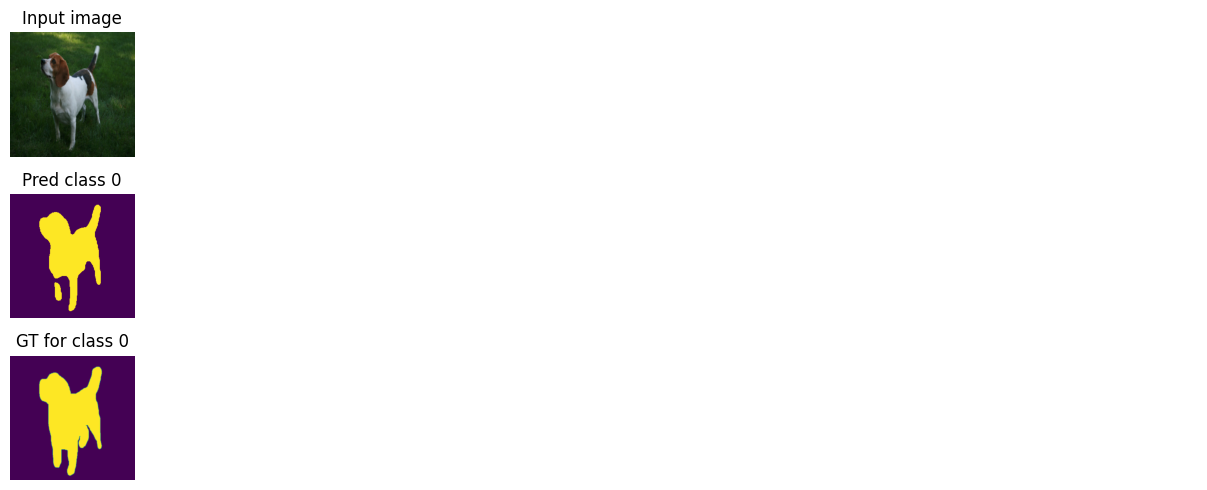

Train loss: 0.04209 | Time: 19m 4s | Val loss: 0.06201
Train_DICE_avg: 0.96201 | Train_Jaccard_avg: 0.92977 | Train_Sensitivity_avg: 0.96150 | Train_Specificity_avg: 0.97044 
Class 0 - Train_DICE: 0.96201 | Train_Jaccard: 0.92977 | Train_Sensitivity: 0.96150 | Train_Specificity: 0.97044 
Val_DICE_avg: 0.94190 | Val_Jaccard_avg: 0.89639 | Val_Sensitivity_avg: 0.94417 | Val_Specificity_avg: 0.96270 
Class 0 - Val_DICE: 0.94190 | Val_Jaccard: 0.89639 | Val_Sensitivity: 0.94417 | Val_Specificity: 0.96270 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04187 | Time: 19m 26s | Val loss: 0.06152
Train_DICE_avg: 0.96221 | Train_Jaccard_avg: 0.93015 | Train_Sensitivity_avg: 0.96196 | Train_Specificity_avg: 0.97066 
Class 0 - Train_DICE: 0.96221 | Train_Jaccard: 0.93015 | Train_Sensitivity: 0.96196 | Train_Specificity: 0.97066 
Val_DICE_avg: 0.94246 | Val_Jaccard_avg: 0.89726 | Val_Sensitivity_avg: 0.94501 | Val_Specificity_avg: 0.96303 
Class 0 - Val_DICE: 0.94246 | Val_Jaccard: 0.89726 | Val_Sensitivity: 0.94501 | Val_Specificity: 0.96303 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04211 | Time: 19m 48s | Val loss: 0.06130
Train_DICE_avg: 0.96183 | Train_Jaccard_avg: 0.92953 | Train_Sensitivity_avg: 0.96098 | Train_Specificity_avg: 0.97177 
Class 0 - Train_DICE: 0.96183 | Train_Jaccard: 0.92953 | Train_Sensitivity: 0.96098 | Train_Specificity: 0.97177 
Val_DICE_avg: 0.94269 | Val_Jaccard_avg: 0.89764 | Val_Sensitivity_avg: 0.94327 | Val_Specificity_avg: 0.96394 
Class 0 - Val_DICE: 0.94269 | Val_Jaccard: 0.89764 | Val_Sensitivity: 0.94327 | Val_Specificity: 0.96394 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04183 | Time: 20m 11s | Val loss: 0.06136
Train_DICE_avg: 0.96207 | Train_Jaccard_avg: 0.92992 | Train_Sensitivity_avg: 0.96199 | Train_Specificity_avg: 0.97109 
Class 0 - Train_DICE: 0.96207 | Train_Jaccard: 0.92992 | Train_Sensitivity: 0.96199 | Train_Specificity: 0.97109 
Val_DICE_avg: 0.94240 | Val_Jaccard_avg: 0.89714 | Val_Sensitivity_avg: 0.94697 | Val_Specificity_avg: 0.96161 
Class 0 - Val_DICE: 0.94240 | Val_Jaccard: 0.89714 | Val_Sensitivity: 0.94697 | Val_Specificity: 0.96161 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04088 | Time: 20m 33s | Val loss: 0.06172
Train_DICE_avg: 0.96298 | Train_Jaccard_avg: 0.93159 | Train_Sensitivity_avg: 0.96282 | Train_Specificity_avg: 0.97130 
Class 0 - Train_DICE: 0.96298 | Train_Jaccard: 0.93159 | Train_Sensitivity: 0.96282 | Train_Specificity: 0.97130 
Val_DICE_avg: 0.94196 | Val_Jaccard_avg: 0.89641 | Val_Sensitivity_avg: 0.94673 | Val_Specificity_avg: 0.96080 
Class 0 - Val_DICE: 0.94196 | Val_Jaccard: 0.89641 | Val_Sensitivity: 0.94673 | Val_Specificity: 0.96080 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

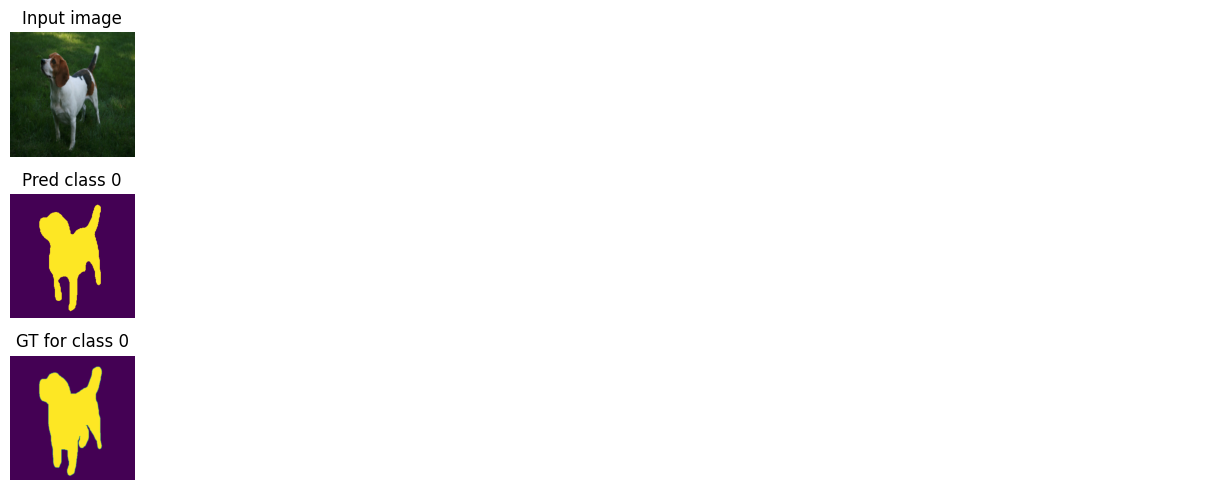

Train loss: 0.04074 | Time: 20m 56s | Val loss: 0.06145
Train_DICE_avg: 0.96311 | Train_Jaccard_avg: 0.93181 | Train_Sensitivity_avg: 0.96218 | Train_Specificity_avg: 0.97292 
Class 0 - Train_DICE: 0.96311 | Train_Jaccard: 0.93181 | Train_Sensitivity: 0.96218 | Train_Specificity: 0.97292 
Val_DICE_avg: 0.94218 | Val_Jaccard_avg: 0.89682 | Val_Sensitivity_avg: 0.94327 | Val_Specificity_avg: 0.96335 
Class 0 - Val_DICE: 0.94218 | Val_Jaccard: 0.89682 | Val_Sensitivity: 0.94327 | Val_Specificity: 0.96335 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04061 | Time: 21m 19s | Val loss: 0.06145
Train_DICE_avg: 0.96311 | Train_Jaccard_avg: 0.93181 | Train_Sensitivity_avg: 0.96240 | Train_Specificity_avg: 0.97222 
Class 0 - Train_DICE: 0.96311 | Train_Jaccard: 0.93181 | Train_Sensitivity: 0.96240 | Train_Specificity: 0.97222 
Val_DICE_avg: 0.94217 | Val_Jaccard_avg: 0.89669 | Val_Sensitivity_avg: 0.94548 | Val_Specificity_avg: 0.96143 
Class 0 - Val_DICE: 0.94217 | Val_Jaccard: 0.89669 | Val_Sensitivity: 0.94548 | Val_Specificity: 0.96143 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04126 | Time: 21m 41s | Val loss: 0.06111
Train_DICE_avg: 0.96243 | Train_Jaccard_avg: 0.93063 | Train_Sensitivity_avg: 0.96268 | Train_Specificity_avg: 0.97104 
Class 0 - Train_DICE: 0.96243 | Train_Jaccard: 0.93063 | Train_Sensitivity: 0.96268 | Train_Specificity: 0.97104 
Val_DICE_avg: 0.94260 | Val_Jaccard_avg: 0.89731 | Val_Sensitivity_avg: 0.94325 | Val_Specificity_avg: 0.96352 
Class 0 - Val_DICE: 0.94260 | Val_Jaccard: 0.89731 | Val_Sensitivity: 0.94325 | Val_Specificity: 0.96352 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04098 | Time: 22m 4s | Val loss: 0.06125
Train_DICE_avg: 0.96266 | Train_Jaccard_avg: 0.93108 | Train_Sensitivity_avg: 0.96273 | Train_Specificity_avg: 0.97087 
Class 0 - Train_DICE: 0.96266 | Train_Jaccard: 0.93108 | Train_Sensitivity: 0.96273 | Train_Specificity: 0.97087 
Val_DICE_avg: 0.94223 | Val_Jaccard_avg: 0.89670 | Val_Sensitivity_avg: 0.94737 | Val_Specificity_avg: 0.96018 
Class 0 - Val_DICE: 0.94223 | Val_Jaccard: 0.89670 | Val_Sensitivity: 0.94737 | Val_Specificity: 0.96018 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.03986 | Time: 22m 26s | Val loss: 0.06164
Train_DICE_avg: 0.96381 | Train_Jaccard_avg: 0.93310 | Train_Sensitivity_avg: 0.96291 | Train_Specificity_avg: 0.97261 
Class 0 - Train_DICE: 0.96381 | Train_Jaccard: 0.93310 | Train_Sensitivity: 0.96291 | Train_Specificity: 0.97261 
Val_DICE_avg: 0.94188 | Val_Jaccard_avg: 0.89624 | Val_Sensitivity_avg: 0.94556 | Val_Specificity_avg: 0.96122 
Class 0 - Val_DICE: 0.94188 | Val_Jaccard: 0.89624 | Val_Sensitivity: 0.94556 | Val_Specificity: 0.96122 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

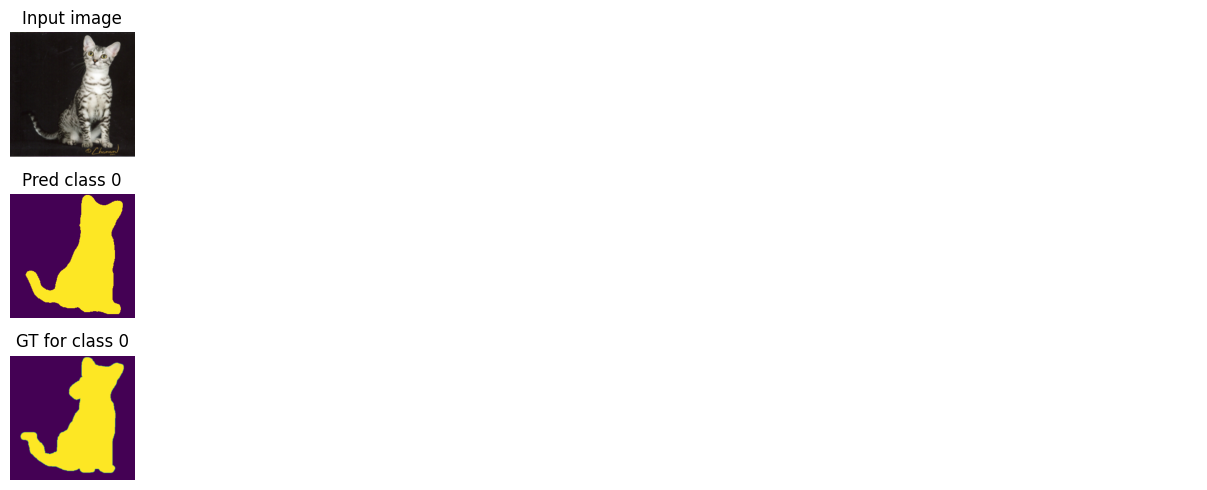

Train loss: 0.03976 | Time: 22m 50s | Val loss: 0.06131
Train_DICE_avg: 0.96383 | Train_Jaccard_avg: 0.93313 | Train_Sensitivity_avg: 0.96341 | Train_Specificity_avg: 0.97339 
Class 0 - Train_DICE: 0.96383 | Train_Jaccard: 0.93313 | Train_Sensitivity: 0.96341 | Train_Specificity: 0.97339 
Val_DICE_avg: 0.94211 | Val_Jaccard_avg: 0.89668 | Val_Sensitivity_avg: 0.94511 | Val_Specificity_avg: 0.96172 
Class 0 - Val_DICE: 0.94211 | Val_Jaccard: 0.89668 | Val_Sensitivity: 0.94511 | Val_Specificity: 0.96172 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 158MB/s]


<All keys matched successfully>

In [12]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]



Global Performance Metrics:
Loss mean: 0.05504, std: 0.00910
Dice Coefficient mean: 0.94820, std: 0.04270
Jaccard Index mean: 0.90421, std: 0.06712
Sensitivity mean: 0.95742, std: 0.03785
Specificity mean: 0.96066, std: 0.04860

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.94820, std: 0.04270
Jaccard mean: 0.90421, std: 0.06712
Sensitivity mean: 0.95742, std: 0.03785
Specificity mean: 0.96066, std: 0.04860


### Cross-Entropy Loss

In [13]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","OxfordIIITPet-UNet-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.54 GB
GPU Memory - Reserved: 1.09 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

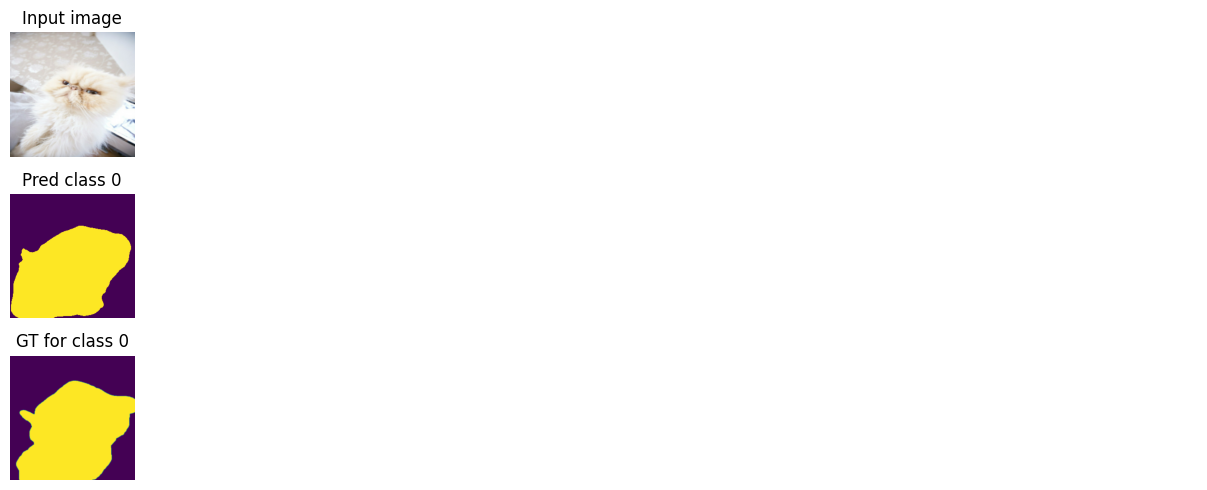

Train loss: 0.38473 | Time: 0m 22s | Val loss: 0.32240
Train_DICE_avg: 0.71389 | Train_Jaccard_avg: 0.60018 | Train_Sensitivity_avg: 0.89766 | Train_Specificity_avg: 0.79713 
Class 0 - Train_DICE: 0.71389 | Train_Jaccard: 0.60018 | Train_Sensitivity: 0.89766 | Train_Specificity: 0.79713 
Val_DICE_avg: 0.77719 | Val_Jaccard_avg: 0.64901 | Val_Sensitivity_avg: 0.96906 | Val_Specificity_avg: 0.79257 
Class 0 - Val_DICE: 0.77719 | Val_Jaccard: 0.64901 | Val_Sensitivity: 0.96906 | Val_Specificity: 0.79257 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.24718 | Time: 0m 44s | Val loss: 0.20709
Train_DICE_avg: 0.88006 | Train_Jaccard_avg: 0.79479 | Train_Sensitivity_avg: 0.92672 | Train_Specificity_avg: 0.89008 
Class 0 - Train_DICE: 0.88006 | Train_Jaccard: 0.79479 | Train_Sensitivity: 0.92672 | Train_Specificity: 0.89008 
Val_DICE_avg: 0.88932 | Val_Jaccard_avg: 0.80885 | Val_Sensitivity_avg: 0.95667 | Val_Specificity_avg: 0.88671 
Class 0 - Val_DICE: 0.88932 | Val_Jaccard: 0.80885 | Val_Sensitivity: 0.95667 | Val_Specificity: 0.88671 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.21429 | Time: 1m 6s | Val loss: 0.19517
Train_DICE_avg: 0.90064 | Train_Jaccard_avg: 0.82640 | Train_Sensitivity_avg: 0.94166 | Train_Specificity_avg: 0.90486 
Class 0 - Train_DICE: 0.90064 | Train_Jaccard: 0.82640 | Train_Sensitivity: 0.94166 | Train_Specificity: 0.90486 
Val_DICE_avg: 0.89169 | Val_Jaccard_avg: 0.81324 | Val_Sensitivity_avg: 0.97264 | Val_Specificity_avg: 0.89145 
Class 0 - Val_DICE: 0.89169 | Val_Jaccard: 0.81324 | Val_Sensitivity: 0.97264 | Val_Specificity: 0.89145 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.19968 | Time: 1m 28s | Val loss: 0.17676
Train_DICE_avg: 0.90603 | Train_Jaccard_avg: 0.83536 | Train_Sensitivity_avg: 0.94891 | Train_Specificity_avg: 0.90855 
Class 0 - Train_DICE: 0.90603 | Train_Jaccard: 0.83536 | Train_Sensitivity: 0.94891 | Train_Specificity: 0.90855 
Val_DICE_avg: 0.91021 | Val_Jaccard_avg: 0.84306 | Val_Sensitivity_avg: 0.96760 | Val_Specificity_avg: 0.90824 
Class 0 - Val_DICE: 0.91021 | Val_Jaccard: 0.84306 | Val_Sensitivity: 0.96760 | Val_Specificity: 0.90824 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.18314 | Time: 1m 50s | Val loss: 0.17103
Train_DICE_avg: 0.91477 | Train_Jaccard_avg: 0.84923 | Train_Sensitivity_avg: 0.95486 | Train_Specificity_avg: 0.91341 
Class 0 - Train_DICE: 0.91477 | Train_Jaccard: 0.84923 | Train_Sensitivity: 0.95486 | Train_Specificity: 0.91341 
Val_DICE_avg: 0.91688 | Val_Jaccard_avg: 0.85412 | Val_Sensitivity_avg: 0.96690 | Val_Specificity_avg: 0.91904 
Class 0 - Val_DICE: 0.91688 | Val_Jaccard: 0.85412 | Val_Sensitivity: 0.96690 | Val_Specificity: 0.91904 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

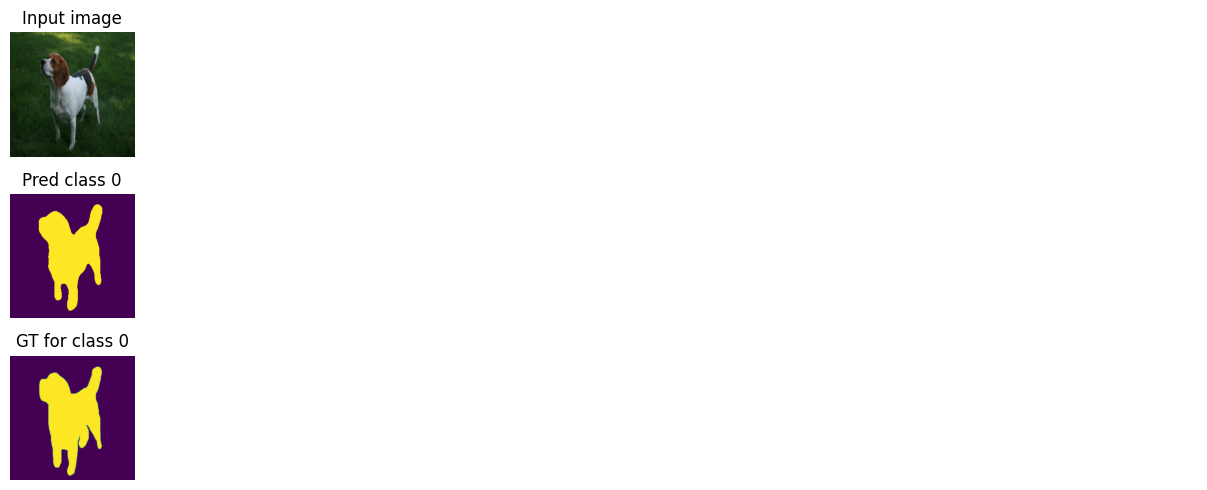

Train loss: 0.17575 | Time: 2m 13s | Val loss: 0.16391
Train_DICE_avg: 0.91742 | Train_Jaccard_avg: 0.85295 | Train_Sensitivity_avg: 0.95629 | Train_Specificity_avg: 0.91620 
Class 0 - Train_DICE: 0.91742 | Train_Jaccard: 0.85295 | Train_Sensitivity: 0.95629 | Train_Specificity: 0.91620 
Val_DICE_avg: 0.92400 | Val_Jaccard_avg: 0.86557 | Val_Sensitivity_avg: 0.96520 | Val_Specificity_avg: 0.92651 
Class 0 - Val_DICE: 0.92400 | Val_Jaccard: 0.86557 | Val_Sensitivity: 0.96520 | Val_Specificity: 0.92651 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.16738 | Time: 2m 35s | Val loss: 0.17330
Train_DICE_avg: 0.92056 | Train_Jaccard_avg: 0.85833 | Train_Sensitivity_avg: 0.95773 | Train_Specificity_avg: 0.91845 
Class 0 - Train_DICE: 0.92056 | Train_Jaccard: 0.85833 | Train_Sensitivity: 0.95773 | Train_Specificity: 0.91845 
Val_DICE_avg: 0.89232 | Val_Jaccard_avg: 0.81765 | Val_Sensitivity_avg: 0.98126 | Val_Specificity_avg: 0.89226 
Class 0 - Val_DICE: 0.89232 | Val_Jaccard: 0.81765 | Val_Sensitivity: 0.98126 | Val_Specificity: 0.89226 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.16003 | Time: 2m 57s | Val loss: 0.16699
Train_DICE_avg: 0.92340 | Train_Jaccard_avg: 0.86314 | Train_Sensitivity_avg: 0.95925 | Train_Specificity_avg: 0.92106 
Class 0 - Train_DICE: 0.92340 | Train_Jaccard: 0.86314 | Train_Sensitivity: 0.95925 | Train_Specificity: 0.92106 
Val_DICE_avg: 0.88789 | Val_Jaccard_avg: 0.81323 | Val_Sensitivity_avg: 0.98291 | Val_Specificity_avg: 0.88981 
Class 0 - Val_DICE: 0.88789 | Val_Jaccard: 0.81323 | Val_Sensitivity: 0.98291 | Val_Specificity: 0.88981 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15421 | Time: 3m 19s | Val loss: 0.15171
Train_DICE_avg: 0.92507 | Train_Jaccard_avg: 0.86567 | Train_Sensitivity_avg: 0.96036 | Train_Specificity_avg: 0.92091 
Class 0 - Train_DICE: 0.92507 | Train_Jaccard: 0.86567 | Train_Sensitivity: 0.96036 | Train_Specificity: 0.92091 
Val_DICE_avg: 0.91010 | Val_Jaccard_avg: 0.84340 | Val_Sensitivity_avg: 0.97792 | Val_Specificity_avg: 0.90711 
Class 0 - Val_DICE: 0.91010 | Val_Jaccard: 0.84340 | Val_Sensitivity: 0.97792 | Val_Specificity: 0.90711 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14688 | Time: 3m 40s | Val loss: 0.14762
Train_DICE_avg: 0.92699 | Train_Jaccard_avg: 0.86923 | Train_Sensitivity_avg: 0.96278 | Train_Specificity_avg: 0.92323 
Class 0 - Train_DICE: 0.92699 | Train_Jaccard: 0.86923 | Train_Sensitivity: 0.96278 | Train_Specificity: 0.92323 
Val_DICE_avg: 0.91460 | Val_Jaccard_avg: 0.85095 | Val_Sensitivity_avg: 0.97556 | Val_Specificity_avg: 0.91518 
Class 0 - Val_DICE: 0.91460 | Val_Jaccard: 0.85095 | Val_Sensitivity: 0.97556 | Val_Specificity: 0.91518 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

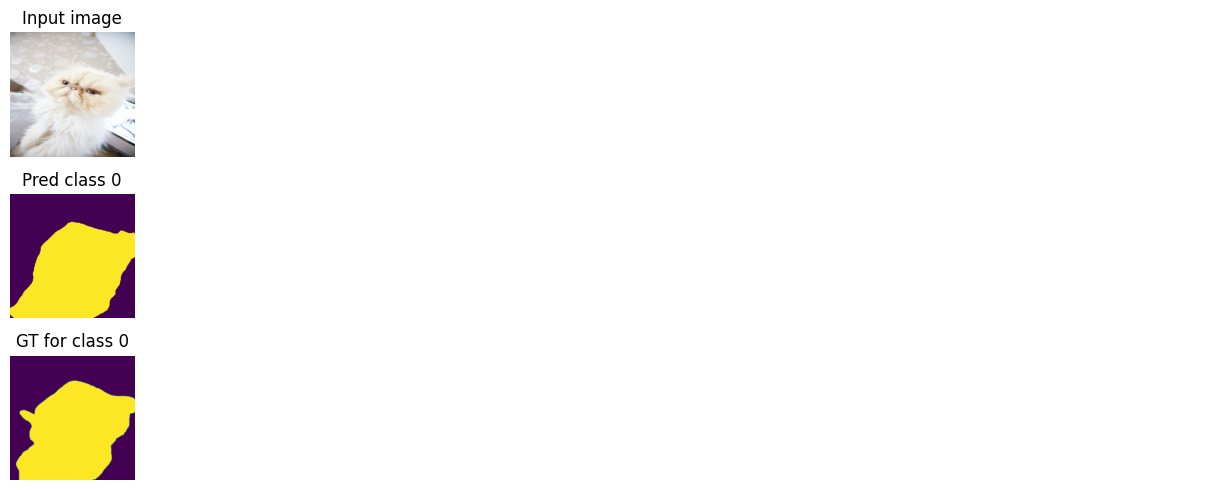

Train loss: 0.14532 | Time: 4m 3s | Val loss: 0.15877
Train_DICE_avg: 0.92455 | Train_Jaccard_avg: 0.86532 | Train_Sensitivity_avg: 0.96486 | Train_Specificity_avg: 0.92090 
Class 0 - Train_DICE: 0.92455 | Train_Jaccard: 0.86532 | Train_Sensitivity: 0.96486 | Train_Specificity: 0.92090 
Val_DICE_avg: 0.89204 | Val_Jaccard_avg: 0.81687 | Val_Sensitivity_avg: 0.98230 | Val_Specificity_avg: 0.88820 
Class 0 - Val_DICE: 0.89204 | Val_Jaccard: 0.81687 | Val_Sensitivity: 0.98230 | Val_Specificity: 0.88820 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13587 | Time: 4m 25s | Val loss: 0.13791
Train_DICE_avg: 0.93007 | Train_Jaccard_avg: 0.87413 | Train_Sensitivity_avg: 0.96431 | Train_Specificity_avg: 0.92686 
Class 0 - Train_DICE: 0.93007 | Train_Jaccard: 0.87413 | Train_Sensitivity: 0.96431 | Train_Specificity: 0.92686 
Val_DICE_avg: 0.91536 | Val_Jaccard_avg: 0.85222 | Val_Sensitivity_avg: 0.97667 | Val_Specificity_avg: 0.91257 
Class 0 - Val_DICE: 0.91536 | Val_Jaccard: 0.85222 | Val_Sensitivity: 0.97667 | Val_Specificity: 0.91257 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13349 | Time: 4m 47s | Val loss: 0.13734
Train_DICE_avg: 0.93038 | Train_Jaccard_avg: 0.87460 | Train_Sensitivity_avg: 0.96449 | Train_Specificity_avg: 0.92524 
Class 0 - Train_DICE: 0.93038 | Train_Jaccard: 0.87460 | Train_Sensitivity: 0.96449 | Train_Specificity: 0.92524 
Val_DICE_avg: 0.91601 | Val_Jaccard_avg: 0.85479 | Val_Sensitivity_avg: 0.97508 | Val_Specificity_avg: 0.91580 
Class 0 - Val_DICE: 0.91601 | Val_Jaccard: 0.85479 | Val_Sensitivity: 0.97508 | Val_Specificity: 0.91580 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.12515 | Time: 5m 10s | Val loss: 0.13816
Train_DICE_avg: 0.93243 | Train_Jaccard_avg: 0.87806 | Train_Sensitivity_avg: 0.96628 | Train_Specificity_avg: 0.92953 
Class 0 - Train_DICE: 0.93243 | Train_Jaccard: 0.87806 | Train_Sensitivity: 0.96628 | Train_Specificity: 0.92953 
Val_DICE_avg: 0.91893 | Val_Jaccard_avg: 0.85882 | Val_Sensitivity_avg: 0.97088 | Val_Specificity_avg: 0.91845 
Class 0 - Val_DICE: 0.91893 | Val_Jaccard: 0.85882 | Val_Sensitivity: 0.97088 | Val_Specificity: 0.91845 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.12139 | Time: 5m 32s | Val loss: 0.14555
Train_DICE_avg: 0.93448 | Train_Jaccard_avg: 0.88135 | Train_Sensitivity_avg: 0.96737 | Train_Specificity_avg: 0.92935 
Class 0 - Train_DICE: 0.93448 | Train_Jaccard: 0.88135 | Train_Sensitivity: 0.96737 | Train_Specificity: 0.92935 
Val_DICE_avg: 0.89627 | Val_Jaccard_avg: 0.82472 | Val_Sensitivity_avg: 0.98125 | Val_Specificity_avg: 0.89637 
Class 0 - Val_DICE: 0.89627 | Val_Jaccard: 0.82472 | Val_Sensitivity: 0.98125 | Val_Specificity: 0.89637 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

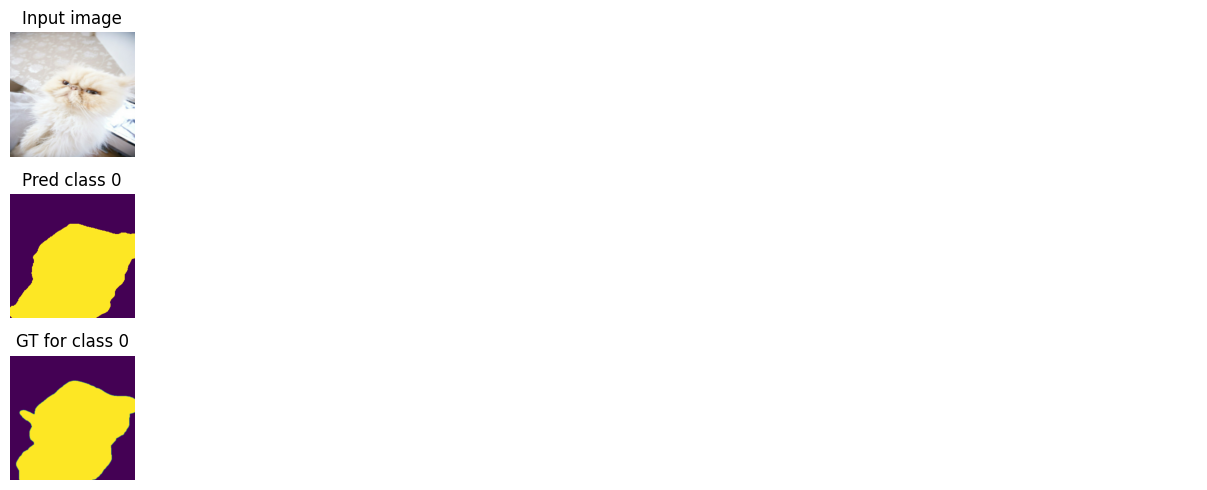

Train loss: 0.11941 | Time: 5m 55s | Val loss: 0.14013
Train_DICE_avg: 0.93395 | Train_Jaccard_avg: 0.88078 | Train_Sensitivity_avg: 0.96763 | Train_Specificity_avg: 0.92970 
Class 0 - Train_DICE: 0.93395 | Train_Jaccard: 0.88078 | Train_Sensitivity: 0.96763 | Train_Specificity: 0.92970 
Val_DICE_avg: 0.90982 | Val_Jaccard_avg: 0.84648 | Val_Sensitivity_avg: 0.97639 | Val_Specificity_avg: 0.90835 
Class 0 - Val_DICE: 0.90982 | Val_Jaccard: 0.84648 | Val_Sensitivity: 0.97639 | Val_Specificity: 0.90835 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11509 | Time: 6m 17s | Val loss: 0.13140
Train_DICE_avg: 0.93540 | Train_Jaccard_avg: 0.88324 | Train_Sensitivity_avg: 0.96768 | Train_Specificity_avg: 0.93277 
Class 0 - Train_DICE: 0.93540 | Train_Jaccard: 0.88324 | Train_Sensitivity: 0.96768 | Train_Specificity: 0.93277 
Val_DICE_avg: 0.91560 | Val_Jaccard_avg: 0.85413 | Val_Sensitivity_avg: 0.97703 | Val_Specificity_avg: 0.91361 
Class 0 - Val_DICE: 0.91560 | Val_Jaccard: 0.85413 | Val_Sensitivity: 0.97703 | Val_Specificity: 0.91361 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11382 | Time: 6m 39s | Val loss: 0.13916
Train_DICE_avg: 0.93568 | Train_Jaccard_avg: 0.88354 | Train_Sensitivity_avg: 0.96820 | Train_Specificity_avg: 0.93217 
Class 0 - Train_DICE: 0.93568 | Train_Jaccard: 0.88354 | Train_Sensitivity: 0.96820 | Train_Specificity: 0.93217 
Val_DICE_avg: 0.90616 | Val_Jaccard_avg: 0.84071 | Val_Sensitivity_avg: 0.97484 | Val_Specificity_avg: 0.90361 
Class 0 - Val_DICE: 0.90616 | Val_Jaccard: 0.84071 | Val_Sensitivity: 0.97484 | Val_Specificity: 0.90361 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10893 | Time: 7m 2s | Val loss: 0.13040
Train_DICE_avg: 0.93844 | Train_Jaccard_avg: 0.88807 | Train_Sensitivity_avg: 0.96914 | Train_Specificity_avg: 0.93393 
Class 0 - Train_DICE: 0.93844 | Train_Jaccard: 0.88807 | Train_Sensitivity: 0.96914 | Train_Specificity: 0.93393 
Val_DICE_avg: 0.90938 | Val_Jaccard_avg: 0.84430 | Val_Sensitivity_avg: 0.98017 | Val_Specificity_avg: 0.90693 
Class 0 - Val_DICE: 0.90938 | Val_Jaccard: 0.84430 | Val_Sensitivity: 0.98017 | Val_Specificity: 0.90693 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10601 | Time: 7m 24s | Val loss: 0.12385
Train_DICE_avg: 0.93912 | Train_Jaccard_avg: 0.88955 | Train_Sensitivity_avg: 0.96872 | Train_Specificity_avg: 0.93555 
Class 0 - Train_DICE: 0.93912 | Train_Jaccard: 0.88955 | Train_Sensitivity: 0.96872 | Train_Specificity: 0.93555 
Val_DICE_avg: 0.92570 | Val_Jaccard_avg: 0.86918 | Val_Sensitivity_avg: 0.97335 | Val_Specificity_avg: 0.92507 
Class 0 - Val_DICE: 0.92570 | Val_Jaccard: 0.86918 | Val_Sensitivity: 0.97335 | Val_Specificity: 0.92507 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

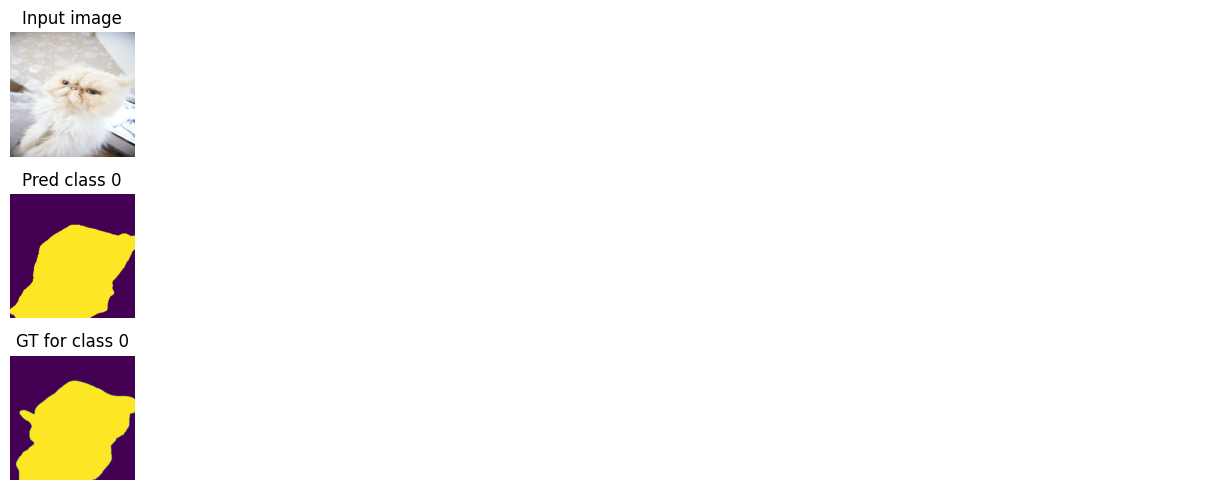

Train loss: 0.10964 | Time: 7m 47s | Val loss: 0.13208
Train_DICE_avg: 0.93503 | Train_Jaccard_avg: 0.88238 | Train_Sensitivity_avg: 0.96816 | Train_Specificity_avg: 0.93032 
Class 0 - Train_DICE: 0.93503 | Train_Jaccard: 0.88238 | Train_Sensitivity: 0.96816 | Train_Specificity: 0.93032 
Val_DICE_avg: 0.91201 | Val_Jaccard_avg: 0.84799 | Val_Sensitivity_avg: 0.97878 | Val_Specificity_avg: 0.90550 
Class 0 - Val_DICE: 0.91201 | Val_Jaccard: 0.84799 | Val_Sensitivity: 0.97878 | Val_Specificity: 0.90550 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10330 | Time: 8m 9s | Val loss: 0.11645
Train_DICE_avg: 0.94069 | Train_Jaccard_avg: 0.89188 | Train_Sensitivity_avg: 0.97015 | Train_Specificity_avg: 0.93644 
Class 0 - Train_DICE: 0.94069 | Train_Jaccard: 0.89188 | Train_Sensitivity: 0.97015 | Train_Specificity: 0.93644 
Val_DICE_avg: 0.92669 | Val_Jaccard_avg: 0.87021 | Val_Sensitivity_avg: 0.97329 | Val_Specificity_avg: 0.92496 
Class 0 - Val_DICE: 0.92669 | Val_Jaccard: 0.87021 | Val_Sensitivity: 0.97329 | Val_Specificity: 0.92496 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09880 | Time: 8m 32s | Val loss: 0.12616
Train_DICE_avg: 0.94166 | Train_Jaccard_avg: 0.89383 | Train_Sensitivity_avg: 0.96993 | Train_Specificity_avg: 0.93915 
Class 0 - Train_DICE: 0.94166 | Train_Jaccard: 0.89383 | Train_Sensitivity: 0.96993 | Train_Specificity: 0.93915 
Val_DICE_avg: 0.91556 | Val_Jaccard_avg: 0.85500 | Val_Sensitivity_avg: 0.97544 | Val_Specificity_avg: 0.91568 
Class 0 - Val_DICE: 0.91556 | Val_Jaccard: 0.85500 | Val_Sensitivity: 0.97544 | Val_Specificity: 0.91568 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09381 | Time: 8m 54s | Val loss: 0.12429
Train_DICE_avg: 0.94439 | Train_Jaccard_avg: 0.89848 | Train_Sensitivity_avg: 0.97113 | Train_Specificity_avg: 0.94129 
Class 0 - Train_DICE: 0.94439 | Train_Jaccard: 0.89848 | Train_Sensitivity: 0.97113 | Train_Specificity: 0.94129 
Val_DICE_avg: 0.92370 | Val_Jaccard_avg: 0.86657 | Val_Sensitivity_avg: 0.97212 | Val_Specificity_avg: 0.92291 
Class 0 - Val_DICE: 0.92370 | Val_Jaccard: 0.86657 | Val_Sensitivity: 0.97212 | Val_Specificity: 0.92291 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09328 | Time: 9m 16s | Val loss: 0.12386
Train_DICE_avg: 0.94315 | Train_Jaccard_avg: 0.89681 | Train_Sensitivity_avg: 0.97168 | Train_Specificity_avg: 0.93978 
Class 0 - Train_DICE: 0.94315 | Train_Jaccard: 0.89681 | Train_Sensitivity: 0.97168 | Train_Specificity: 0.93978 
Val_DICE_avg: 0.91733 | Val_Jaccard_avg: 0.85725 | Val_Sensitivity_avg: 0.97497 | Val_Specificity_avg: 0.91890 
Class 0 - Val_DICE: 0.91733 | Val_Jaccard: 0.85725 | Val_Sensitivity: 0.97497 | Val_Specificity: 0.91890 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

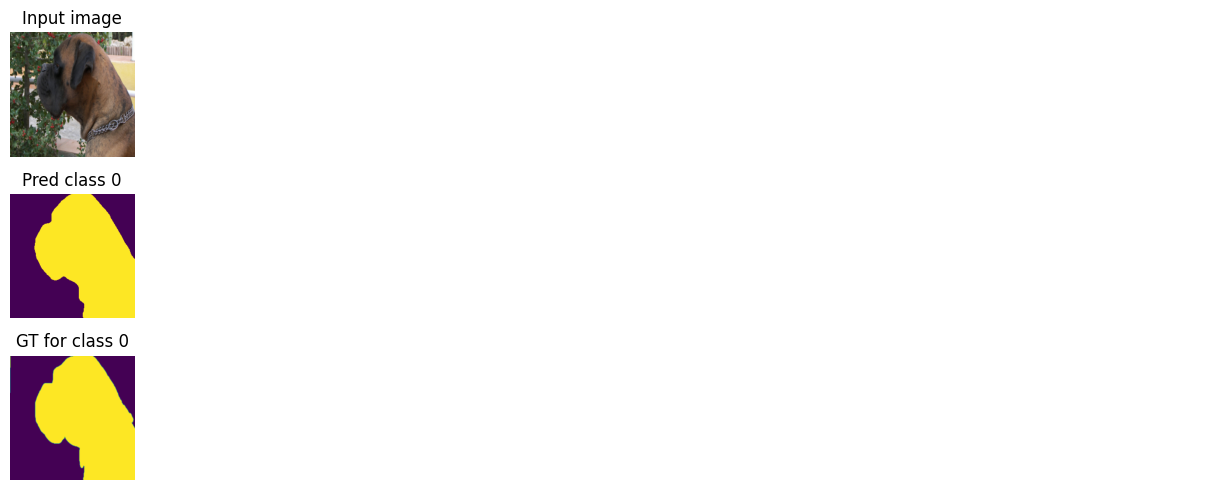

Train loss: 0.09113 | Time: 9m 39s | Val loss: 0.11720
Train_DICE_avg: 0.94458 | Train_Jaccard_avg: 0.89869 | Train_Sensitivity_avg: 0.97209 | Train_Specificity_avg: 0.94200 
Class 0 - Train_DICE: 0.94458 | Train_Jaccard: 0.89869 | Train_Sensitivity: 0.97209 | Train_Specificity: 0.94200 
Val_DICE_avg: 0.92710 | Val_Jaccard_avg: 0.87177 | Val_Sensitivity_avg: 0.97507 | Val_Specificity_avg: 0.92554 
Class 0 - Val_DICE: 0.92710 | Val_Jaccard: 0.87177 | Val_Sensitivity: 0.97507 | Val_Specificity: 0.92554 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08965 | Time: 10m 2s | Val loss: 0.11519
Train_DICE_avg: 0.94508 | Train_Jaccard_avg: 0.89953 | Train_Sensitivity_avg: 0.97220 | Train_Specificity_avg: 0.94216 
Class 0 - Train_DICE: 0.94508 | Train_Jaccard: 0.89953 | Train_Sensitivity: 0.97220 | Train_Specificity: 0.94216 
Val_DICE_avg: 0.93194 | Val_Jaccard_avg: 0.87931 | Val_Sensitivity_avg: 0.96857 | Val_Specificity_avg: 0.93296 
Class 0 - Val_DICE: 0.93194 | Val_Jaccard: 0.87931 | Val_Sensitivity: 0.96857 | Val_Specificity: 0.93296 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08715 | Time: 10m 24s | Val loss: 0.12226
Train_DICE_avg: 0.94647 | Train_Jaccard_avg: 0.90200 | Train_Sensitivity_avg: 0.97252 | Train_Specificity_avg: 0.94204 
Class 0 - Train_DICE: 0.94647 | Train_Jaccard: 0.90200 | Train_Sensitivity: 0.97252 | Train_Specificity: 0.94204 
Val_DICE_avg: 0.92368 | Val_Jaccard_avg: 0.86650 | Val_Sensitivity_avg: 0.97292 | Val_Specificity_avg: 0.92362 
Class 0 - Val_DICE: 0.92368 | Val_Jaccard: 0.86650 | Val_Sensitivity: 0.97292 | Val_Specificity: 0.92362 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08539 | Time: 10m 47s | Val loss: 0.11362
Train_DICE_avg: 0.94695 | Train_Jaccard_avg: 0.90278 | Train_Sensitivity_avg: 0.97365 | Train_Specificity_avg: 0.94346 
Class 0 - Train_DICE: 0.94695 | Train_Jaccard: 0.90278 | Train_Sensitivity: 0.97365 | Train_Specificity: 0.94346 
Val_DICE_avg: 0.93317 | Val_Jaccard_avg: 0.88183 | Val_Sensitivity_avg: 0.96771 | Val_Specificity_avg: 0.93196 
Class 0 - Val_DICE: 0.93317 | Val_Jaccard: 0.88183 | Val_Sensitivity: 0.96771 | Val_Specificity: 0.93196 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08372 | Time: 11m 9s | Val loss: 0.11837
Train_DICE_avg: 0.94726 | Train_Jaccard_avg: 0.90338 | Train_Sensitivity_avg: 0.97260 | Train_Specificity_avg: 0.94545 
Class 0 - Train_DICE: 0.94726 | Train_Jaccard: 0.90338 | Train_Sensitivity: 0.97260 | Train_Specificity: 0.94545 
Val_DICE_avg: 0.93225 | Val_Jaccard_avg: 0.88038 | Val_Sensitivity_avg: 0.96744 | Val_Specificity_avg: 0.93477 
Class 0 - Val_DICE: 0.93225 | Val_Jaccard: 0.88038 | Val_Sensitivity: 0.96744 | Val_Specificity: 0.93477 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

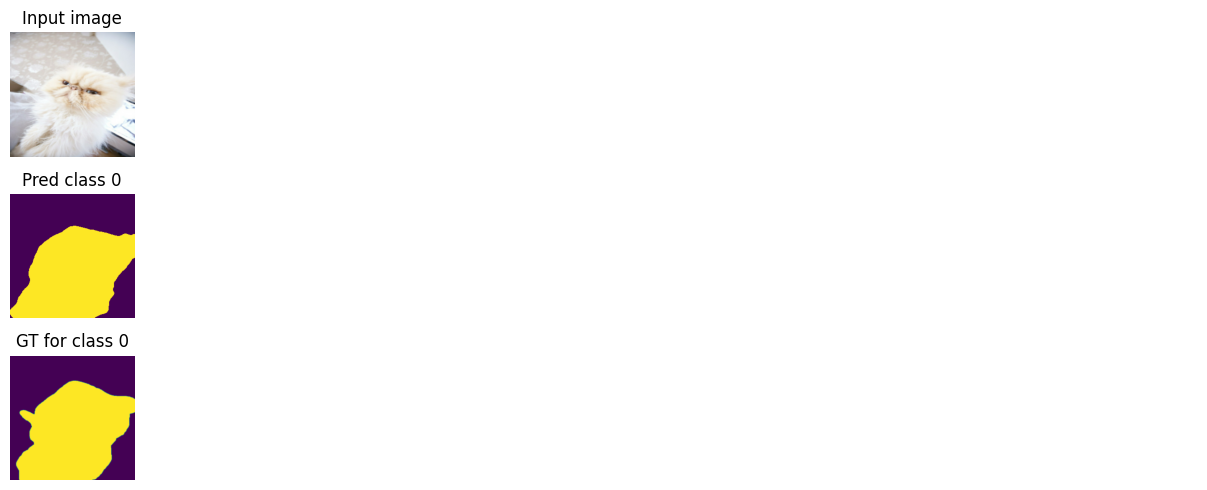

Train loss: 0.08706 | Time: 11m 32s | Val loss: 0.12077
Train_DICE_avg: 0.94493 | Train_Jaccard_avg: 0.89965 | Train_Sensitivity_avg: 0.97267 | Train_Specificity_avg: 0.94306 
Class 0 - Train_DICE: 0.94493 | Train_Jaccard: 0.89965 | Train_Sensitivity: 0.97267 | Train_Specificity: 0.94306 
Val_DICE_avg: 0.92468 | Val_Jaccard_avg: 0.86794 | Val_Sensitivity_avg: 0.97275 | Val_Specificity_avg: 0.92479 
Class 0 - Val_DICE: 0.92468 | Val_Jaccard: 0.86794 | Val_Sensitivity: 0.97275 | Val_Specificity: 0.92479 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08401 | Time: 11m 55s | Val loss: 0.11809
Train_DICE_avg: 0.94695 | Train_Jaccard_avg: 0.90296 | Train_Sensitivity_avg: 0.97246 | Train_Specificity_avg: 0.94418 
Class 0 - Train_DICE: 0.94695 | Train_Jaccard: 0.90296 | Train_Sensitivity: 0.97246 | Train_Specificity: 0.94418 
Val_DICE_avg: 0.92698 | Val_Jaccard_avg: 0.87132 | Val_Sensitivity_avg: 0.97514 | Val_Specificity_avg: 0.92638 
Class 0 - Val_DICE: 0.92698 | Val_Jaccard: 0.87132 | Val_Sensitivity: 0.97514 | Val_Specificity: 0.92638 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08124 | Time: 12m 17s | Val loss: 0.12066
Train_DICE_avg: 0.94825 | Train_Jaccard_avg: 0.90526 | Train_Sensitivity_avg: 0.97383 | Train_Specificity_avg: 0.94646 
Class 0 - Train_DICE: 0.94825 | Train_Jaccard: 0.90526 | Train_Sensitivity: 0.97383 | Train_Specificity: 0.94646 
Val_DICE_avg: 0.92653 | Val_Jaccard_avg: 0.87129 | Val_Sensitivity_avg: 0.97266 | Val_Specificity_avg: 0.92613 
Class 0 - Val_DICE: 0.92653 | Val_Jaccard: 0.87129 | Val_Sensitivity: 0.97266 | Val_Specificity: 0.92613 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07859 | Time: 12m 39s | Val loss: 0.11396
Train_DICE_avg: 0.94955 | Train_Jaccard_avg: 0.90745 | Train_Sensitivity_avg: 0.97408 | Train_Specificity_avg: 0.94825 
Class 0 - Train_DICE: 0.94955 | Train_Jaccard: 0.90745 | Train_Sensitivity: 0.97408 | Train_Specificity: 0.94825 
Val_DICE_avg: 0.93198 | Val_Jaccard_avg: 0.87972 | Val_Sensitivity_avg: 0.96998 | Val_Specificity_avg: 0.93532 
Class 0 - Val_DICE: 0.93198 | Val_Jaccard: 0.87972 | Val_Sensitivity: 0.96998 | Val_Specificity: 0.93532 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07561 | Time: 13m 2s | Val loss: 0.11208
Train_DICE_avg: 0.95192 | Train_Jaccard_avg: 0.91088 | Train_Sensitivity_avg: 0.97564 | Train_Specificity_avg: 0.95013 
Class 0 - Train_DICE: 0.95192 | Train_Jaccard: 0.91088 | Train_Sensitivity: 0.97564 | Train_Specificity: 0.95013 
Val_DICE_avg: 0.93411 | Val_Jaccard_avg: 0.88288 | Val_Sensitivity_avg: 0.96976 | Val_Specificity_avg: 0.93562 
Class 0 - Val_DICE: 0.93411 | Val_Jaccard: 0.88288 | Val_Sensitivity: 0.96976 | Val_Specificity: 0.93562 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

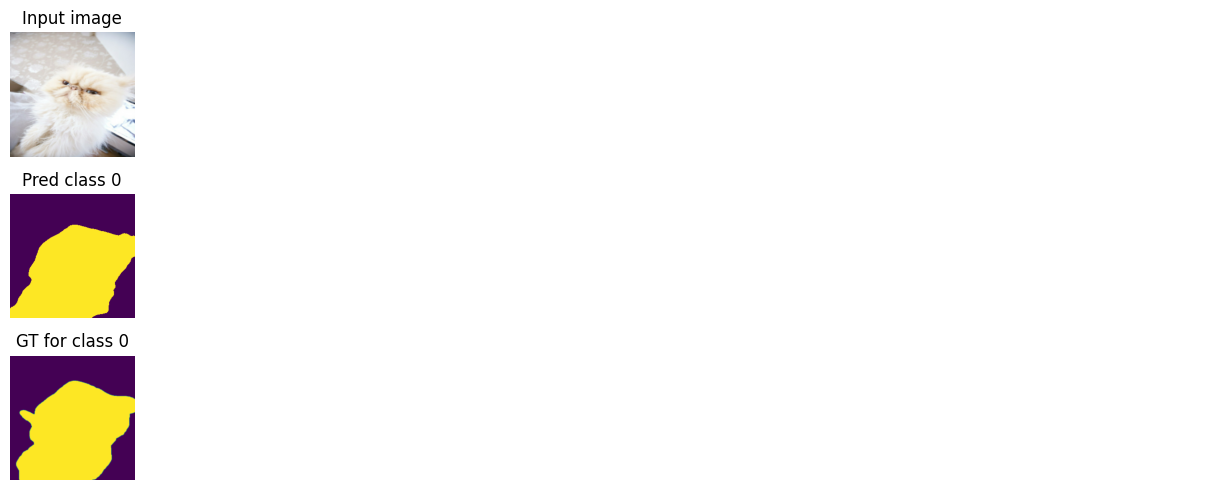

Train loss: 0.07273 | Time: 13m 25s | Val loss: 0.11479
Train_DICE_avg: 0.95238 | Train_Jaccard_avg: 0.91242 | Train_Sensitivity_avg: 0.97610 | Train_Specificity_avg: 0.95060 
Class 0 - Train_DICE: 0.95238 | Train_Jaccard: 0.91242 | Train_Sensitivity: 0.97610 | Train_Specificity: 0.95060 
Val_DICE_avg: 0.93081 | Val_Jaccard_avg: 0.87725 | Val_Sensitivity_avg: 0.97209 | Val_Specificity_avg: 0.92958 
Class 0 - Val_DICE: 0.93081 | Val_Jaccard: 0.87725 | Val_Sensitivity: 0.97209 | Val_Specificity: 0.92958 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07249 | Time: 13m 47s | Val loss: 0.11881
Train_DICE_avg: 0.95388 | Train_Jaccard_avg: 0.91430 | Train_Sensitivity_avg: 0.97727 | Train_Specificity_avg: 0.95077 
Class 0 - Train_DICE: 0.95388 | Train_Jaccard: 0.91430 | Train_Sensitivity: 0.97727 | Train_Specificity: 0.95077 
Val_DICE_avg: 0.92655 | Val_Jaccard_avg: 0.87052 | Val_Sensitivity_avg: 0.97299 | Val_Specificity_avg: 0.92677 
Class 0 - Val_DICE: 0.92655 | Val_Jaccard: 0.87052 | Val_Sensitivity: 0.97299 | Val_Specificity: 0.92677 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07103 | Time: 14m 10s | Val loss: 0.11363
Train_DICE_avg: 0.95505 | Train_Jaccard_avg: 0.91578 | Train_Sensitivity_avg: 0.97776 | Train_Specificity_avg: 0.95169 
Class 0 - Train_DICE: 0.95505 | Train_Jaccard: 0.91578 | Train_Sensitivity: 0.97776 | Train_Specificity: 0.95169 
Val_DICE_avg: 0.93397 | Val_Jaccard_avg: 0.88272 | Val_Sensitivity_avg: 0.96954 | Val_Specificity_avg: 0.93583 
Class 0 - Val_DICE: 0.93397 | Val_Jaccard: 0.88272 | Val_Sensitivity: 0.96954 | Val_Specificity: 0.93583 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07144 | Time: 14m 33s | Val loss: 0.11522
Train_DICE_avg: 0.95415 | Train_Jaccard_avg: 0.91477 | Train_Sensitivity_avg: 0.97697 | Train_Specificity_avg: 0.95094 
Class 0 - Train_DICE: 0.95415 | Train_Jaccard: 0.91477 | Train_Sensitivity: 0.97697 | Train_Specificity: 0.95094 
Val_DICE_avg: 0.92876 | Val_Jaccard_avg: 0.87360 | Val_Sensitivity_avg: 0.97476 | Val_Specificity_avg: 0.92736 
Class 0 - Val_DICE: 0.92876 | Val_Jaccard: 0.87360 | Val_Sensitivity: 0.97476 | Val_Specificity: 0.92736 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06917 | Time: 14m 55s | Val loss: 0.11240
Train_DICE_avg: 0.95428 | Train_Jaccard_avg: 0.91586 | Train_Sensitivity_avg: 0.97740 | Train_Specificity_avg: 0.95252 
Class 0 - Train_DICE: 0.95428 | Train_Jaccard: 0.91586 | Train_Sensitivity: 0.97740 | Train_Specificity: 0.95252 
Val_DICE_avg: 0.93447 | Val_Jaccard_avg: 0.88326 | Val_Sensitivity_avg: 0.97032 | Val_Specificity_avg: 0.93482 
Class 0 - Val_DICE: 0.93447 | Val_Jaccard: 0.88326 | Val_Sensitivity: 0.97032 | Val_Specificity: 0.93482 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

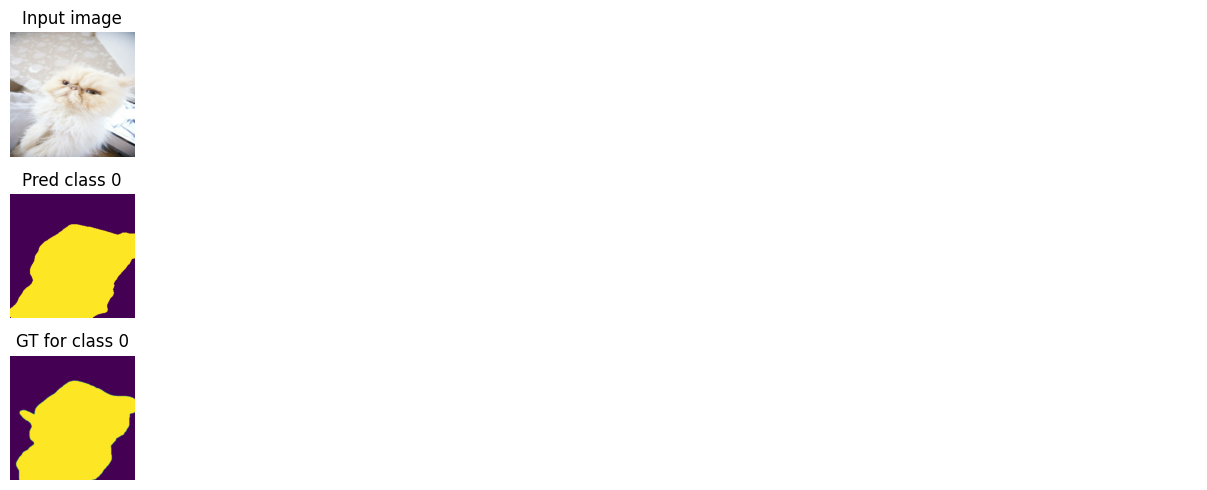

Train loss: 0.06820 | Time: 15m 18s | Val loss: 0.11572
Train_DICE_avg: 0.95484 | Train_Jaccard_avg: 0.91691 | Train_Sensitivity_avg: 0.97634 | Train_Specificity_avg: 0.95464 
Class 0 - Train_DICE: 0.95484 | Train_Jaccard: 0.91691 | Train_Sensitivity: 0.97634 | Train_Specificity: 0.95464 
Val_DICE_avg: 0.93632 | Val_Jaccard_avg: 0.88601 | Val_Sensitivity_avg: 0.96801 | Val_Specificity_avg: 0.93665 
Class 0 - Val_DICE: 0.93632 | Val_Jaccard: 0.88601 | Val_Sensitivity: 0.96801 | Val_Specificity: 0.93665 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06680 | Time: 15m 41s | Val loss: 0.11676
Train_DICE_avg: 0.95574 | Train_Jaccard_avg: 0.91774 | Train_Sensitivity_avg: 0.97818 | Train_Specificity_avg: 0.95450 
Class 0 - Train_DICE: 0.95574 | Train_Jaccard: 0.91774 | Train_Sensitivity: 0.97818 | Train_Specificity: 0.95450 
Val_DICE_avg: 0.93710 | Val_Jaccard_avg: 0.88756 | Val_Sensitivity_avg: 0.96490 | Val_Specificity_avg: 0.93901 
Class 0 - Val_DICE: 0.93710 | Val_Jaccard: 0.88756 | Val_Sensitivity: 0.96490 | Val_Specificity: 0.93901 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06549 | Time: 16m 3s | Val loss: 0.11557
Train_DICE_avg: 0.95872 | Train_Jaccard_avg: 0.92144 | Train_Sensitivity_avg: 0.98114 | Train_Specificity_avg: 0.95456 
Class 0 - Train_DICE: 0.95872 | Train_Jaccard: 0.92144 | Train_Sensitivity: 0.98114 | Train_Specificity: 0.95456 
Val_DICE_avg: 0.93670 | Val_Jaccard_avg: 0.88692 | Val_Sensitivity_avg: 0.96717 | Val_Specificity_avg: 0.93851 
Class 0 - Val_DICE: 0.93670 | Val_Jaccard: 0.88692 | Val_Sensitivity: 0.96717 | Val_Specificity: 0.93851 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06484 | Time: 16m 26s | Val loss: 0.11615
Train_DICE_avg: 0.95656 | Train_Jaccard_avg: 0.91983 | Train_Sensitivity_avg: 0.97780 | Train_Specificity_avg: 0.95571 
Class 0 - Train_DICE: 0.95656 | Train_Jaccard: 0.91983 | Train_Sensitivity: 0.97780 | Train_Specificity: 0.95571 
Val_DICE_avg: 0.93854 | Val_Jaccard_avg: 0.89028 | Val_Sensitivity_avg: 0.96592 | Val_Specificity_avg: 0.94110 
Class 0 - Val_DICE: 0.93854 | Val_Jaccard: 0.89028 | Val_Sensitivity: 0.96592 | Val_Specificity: 0.94110 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06427 | Time: 16m 49s | Val loss: 0.11748
Train_DICE_avg: 0.95741 | Train_Jaccard_avg: 0.92073 | Train_Sensitivity_avg: 0.97935 | Train_Specificity_avg: 0.95599 
Class 0 - Train_DICE: 0.95741 | Train_Jaccard: 0.92073 | Train_Sensitivity: 0.97935 | Train_Specificity: 0.95599 
Val_DICE_avg: 0.93909 | Val_Jaccard_avg: 0.89100 | Val_Sensitivity_avg: 0.96143 | Val_Specificity_avg: 0.94322 
Class 0 - Val_DICE: 0.93909 | Val_Jaccard: 0.89100 | Val_Sensitivity: 0.96143 | Val_Specificity: 0.94322 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

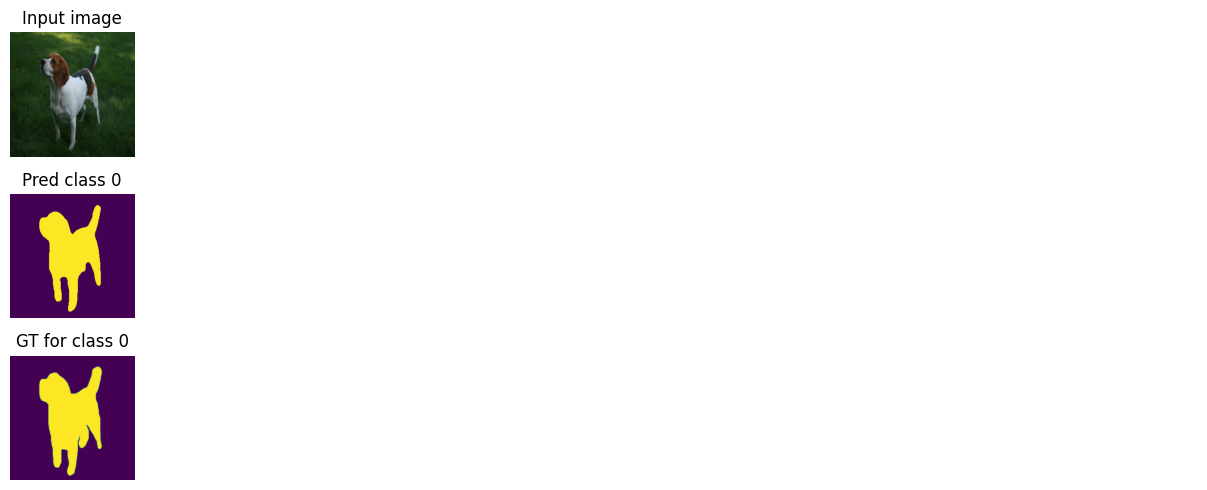

Train loss: 0.06377 | Time: 17m 12s | Val loss: 0.12032
Train_DICE_avg: 0.95818 | Train_Jaccard_avg: 0.92200 | Train_Sensitivity_avg: 0.97900 | Train_Specificity_avg: 0.95607 
Class 0 - Train_DICE: 0.95818 | Train_Jaccard: 0.92200 | Train_Sensitivity: 0.97900 | Train_Specificity: 0.95607 
Val_DICE_avg: 0.94033 | Val_Jaccard_avg: 0.89313 | Val_Sensitivity_avg: 0.96157 | Val_Specificity_avg: 0.94530 
Class 0 - Val_DICE: 0.94033 | Val_Jaccard: 0.89313 | Val_Sensitivity: 0.96157 | Val_Specificity: 0.94530 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06449 | Time: 17m 35s | Val loss: 0.11778
Train_DICE_avg: 0.95695 | Train_Jaccard_avg: 0.91992 | Train_Sensitivity_avg: 0.97869 | Train_Specificity_avg: 0.95515 
Class 0 - Train_DICE: 0.95695 | Train_Jaccard: 0.91992 | Train_Sensitivity: 0.97869 | Train_Specificity: 0.95515 
Val_DICE_avg: 0.93934 | Val_Jaccard_avg: 0.89144 | Val_Sensitivity_avg: 0.96199 | Val_Specificity_avg: 0.94533 
Class 0 - Val_DICE: 0.93934 | Val_Jaccard: 0.89144 | Val_Sensitivity: 0.96199 | Val_Specificity: 0.94533 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06327 | Time: 17m 57s | Val loss: 0.12465
Train_DICE_avg: 0.95846 | Train_Jaccard_avg: 0.92271 | Train_Sensitivity_avg: 0.98006 | Train_Specificity_avg: 0.95720 
Class 0 - Train_DICE: 0.95846 | Train_Jaccard: 0.92271 | Train_Sensitivity: 0.98006 | Train_Specificity: 0.95720 
Val_DICE_avg: 0.93796 | Val_Jaccard_avg: 0.88935 | Val_Sensitivity_avg: 0.95852 | Val_Specificity_avg: 0.94443 
Class 0 - Val_DICE: 0.93796 | Val_Jaccard: 0.88935 | Val_Sensitivity: 0.95852 | Val_Specificity: 0.94443 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06310 | Time: 18m 20s | Val loss: 0.12392
Train_DICE_avg: 0.95834 | Train_Jaccard_avg: 0.92230 | Train_Sensitivity_avg: 0.97962 | Train_Specificity_avg: 0.95682 
Class 0 - Train_DICE: 0.95834 | Train_Jaccard: 0.92230 | Train_Sensitivity: 0.97962 | Train_Specificity: 0.95682 
Val_DICE_avg: 0.94055 | Val_Jaccard_avg: 0.89365 | Val_Sensitivity_avg: 0.95462 | Val_Specificity_avg: 0.95002 
Class 0 - Val_DICE: 0.94055 | Val_Jaccard: 0.89365 | Val_Sensitivity: 0.95462 | Val_Specificity: 0.95002 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06191 | Time: 18m 42s | Val loss: 0.11695
Train_DICE_avg: 0.95902 | Train_Jaccard_avg: 0.92354 | Train_Sensitivity_avg: 0.98001 | Train_Specificity_avg: 0.95667 
Class 0 - Train_DICE: 0.95902 | Train_Jaccard: 0.92354 | Train_Sensitivity: 0.98001 | Train_Specificity: 0.95667 
Val_DICE_avg: 0.93892 | Val_Jaccard_avg: 0.89096 | Val_Sensitivity_avg: 0.96345 | Val_Specificity_avg: 0.94447 
Class 0 - Val_DICE: 0.93892 | Val_Jaccard: 0.89096 | Val_Sensitivity: 0.96345 | Val_Specificity: 0.94447 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

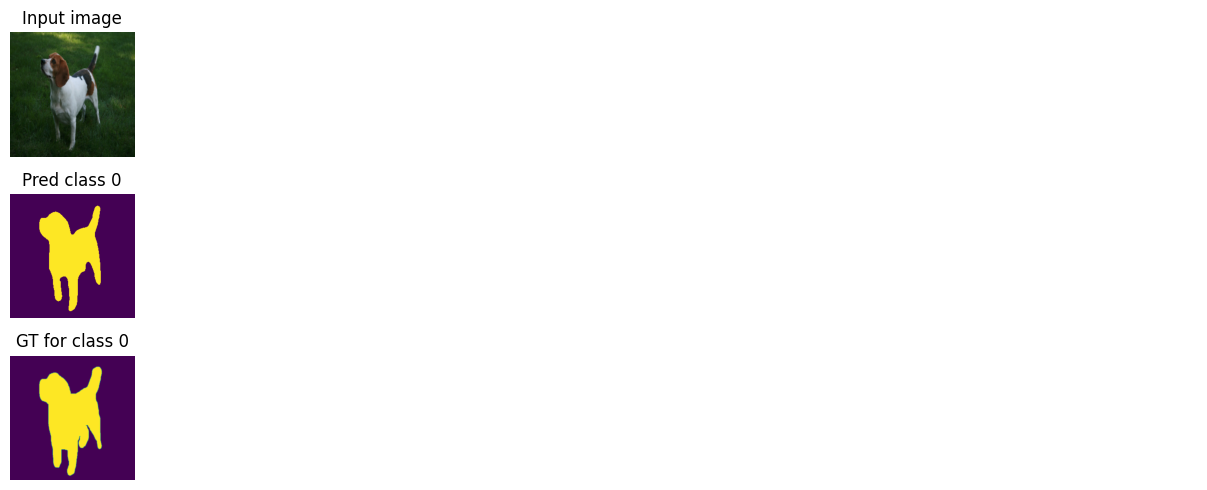

Train loss: 0.06043 | Time: 19m 5s | Val loss: 0.12004
Train_DICE_avg: 0.95838 | Train_Jaccard_avg: 0.92317 | Train_Sensitivity_avg: 0.97935 | Train_Specificity_avg: 0.95816 
Class 0 - Train_DICE: 0.95838 | Train_Jaccard: 0.92317 | Train_Sensitivity: 0.97935 | Train_Specificity: 0.95816 
Val_DICE_avg: 0.94000 | Val_Jaccard_avg: 0.89275 | Val_Sensitivity_avg: 0.96067 | Val_Specificity_avg: 0.94736 
Class 0 - Val_DICE: 0.94000 | Val_Jaccard: 0.89275 | Val_Sensitivity: 0.96067 | Val_Specificity: 0.94736 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06013 | Time: 19m 28s | Val loss: 0.11857
Train_DICE_avg: 0.96043 | Train_Jaccard_avg: 0.92535 | Train_Sensitivity_avg: 0.98079 | Train_Specificity_avg: 0.95858 
Class 0 - Train_DICE: 0.96043 | Train_Jaccard: 0.92535 | Train_Sensitivity: 0.98079 | Train_Specificity: 0.95858 
Val_DICE_avg: 0.93975 | Val_Jaccard_avg: 0.89211 | Val_Sensitivity_avg: 0.96109 | Val_Specificity_avg: 0.94552 
Class 0 - Val_DICE: 0.93975 | Val_Jaccard: 0.89211 | Val_Sensitivity: 0.96109 | Val_Specificity: 0.94552 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05943 | Time: 19m 50s | Val loss: 0.11872
Train_DICE_avg: 0.96029 | Train_Jaccard_avg: 0.92587 | Train_Sensitivity_avg: 0.98058 | Train_Specificity_avg: 0.95897 
Class 0 - Train_DICE: 0.96029 | Train_Jaccard: 0.92587 | Train_Sensitivity: 0.98058 | Train_Specificity: 0.95897 
Val_DICE_avg: 0.93997 | Val_Jaccard_avg: 0.89245 | Val_Sensitivity_avg: 0.96377 | Val_Specificity_avg: 0.94450 
Class 0 - Val_DICE: 0.93997 | Val_Jaccard: 0.89245 | Val_Sensitivity: 0.96377 | Val_Specificity: 0.94450 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05895 | Time: 20m 13s | Val loss: 0.12061
Train_DICE_avg: 0.96020 | Train_Jaccard_avg: 0.92576 | Train_Sensitivity_avg: 0.98102 | Train_Specificity_avg: 0.95821 
Class 0 - Train_DICE: 0.96020 | Train_Jaccard: 0.92576 | Train_Sensitivity: 0.98102 | Train_Specificity: 0.95821 
Val_DICE_avg: 0.93982 | Val_Jaccard_avg: 0.89218 | Val_Sensitivity_avg: 0.96275 | Val_Specificity_avg: 0.94540 
Class 0 - Val_DICE: 0.93982 | Val_Jaccard: 0.89218 | Val_Sensitivity: 0.96275 | Val_Specificity: 0.94540 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06017 | Time: 20m 35s | Val loss: 0.11637
Train_DICE_avg: 0.96031 | Train_Jaccard_avg: 0.92519 | Train_Sensitivity_avg: 0.98146 | Train_Specificity_avg: 0.95820 
Class 0 - Train_DICE: 0.96031 | Train_Jaccard: 0.92519 | Train_Sensitivity: 0.98146 | Train_Specificity: 0.95820 
Val_DICE_avg: 0.93894 | Val_Jaccard_avg: 0.89062 | Val_Sensitivity_avg: 0.96616 | Val_Specificity_avg: 0.94163 
Class 0 - Val_DICE: 0.93894 | Val_Jaccard: 0.89062 | Val_Sensitivity: 0.96616 | Val_Specificity: 0.94163 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

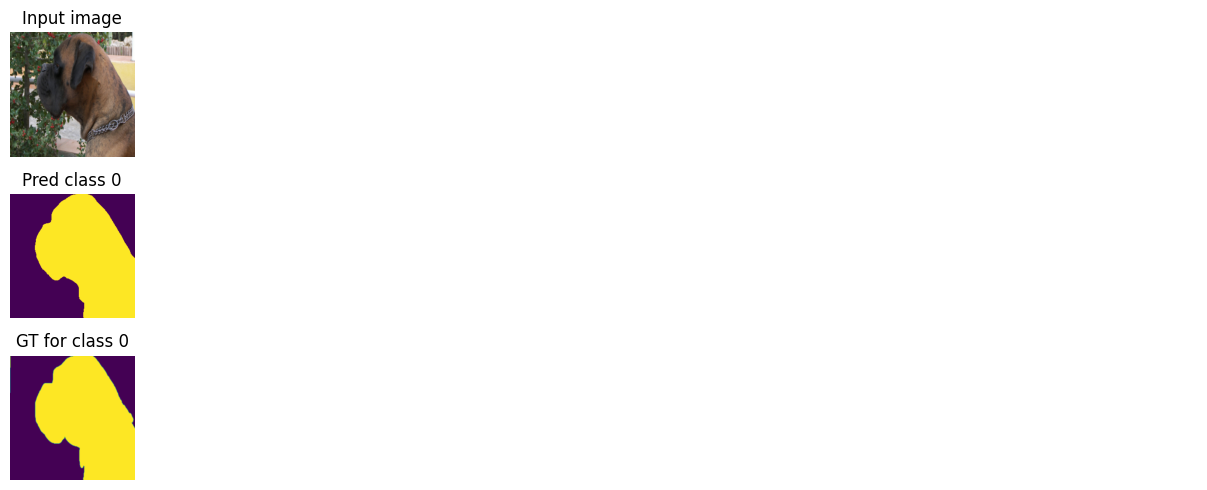

Train loss: 0.05781 | Time: 20m 58s | Val loss: 0.11853
Train_DICE_avg: 0.95974 | Train_Jaccard_avg: 0.92567 | Train_Sensitivity_avg: 0.97979 | Train_Specificity_avg: 0.96011 
Class 0 - Train_DICE: 0.95974 | Train_Jaccard: 0.92567 | Train_Sensitivity: 0.97979 | Train_Specificity: 0.96011 
Val_DICE_avg: 0.93837 | Val_Jaccard_avg: 0.88984 | Val_Sensitivity_avg: 0.96495 | Val_Specificity_avg: 0.94266 
Class 0 - Val_DICE: 0.93837 | Val_Jaccard: 0.88984 | Val_Sensitivity: 0.96495 | Val_Specificity: 0.94266 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05790 | Time: 21m 20s | Val loss: 0.11811
Train_DICE_avg: 0.96173 | Train_Jaccard_avg: 0.92764 | Train_Sensitivity_avg: 0.98231 | Train_Specificity_avg: 0.95861 
Class 0 - Train_DICE: 0.96173 | Train_Jaccard: 0.92764 | Train_Sensitivity: 0.98231 | Train_Specificity: 0.95861 
Val_DICE_avg: 0.93888 | Val_Jaccard_avg: 0.89063 | Val_Sensitivity_avg: 0.96402 | Val_Specificity_avg: 0.94376 
Class 0 - Val_DICE: 0.93888 | Val_Jaccard: 0.89063 | Val_Sensitivity: 0.96402 | Val_Specificity: 0.94376 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05765 | Time: 21m 43s | Val loss: 0.12040
Train_DICE_avg: 0.96189 | Train_Jaccard_avg: 0.92811 | Train_Sensitivity_avg: 0.98165 | Train_Specificity_avg: 0.96067 
Class 0 - Train_DICE: 0.96189 | Train_Jaccard: 0.92811 | Train_Sensitivity: 0.98165 | Train_Specificity: 0.96067 
Val_DICE_avg: 0.93759 | Val_Jaccard_avg: 0.88846 | Val_Sensitivity_avg: 0.96432 | Val_Specificity_avg: 0.94191 
Class 0 - Val_DICE: 0.93759 | Val_Jaccard: 0.88846 | Val_Sensitivity: 0.96432 | Val_Specificity: 0.94191 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05731 | Time: 22m 6s | Val loss: 0.11962
Train_DICE_avg: 0.96280 | Train_Jaccard_avg: 0.92885 | Train_Sensitivity_avg: 0.98317 | Train_Specificity_avg: 0.96057 
Class 0 - Train_DICE: 0.96280 | Train_Jaccard: 0.92885 | Train_Sensitivity: 0.98317 | Train_Specificity: 0.96057 
Val_DICE_avg: 0.93756 | Val_Jaccard_avg: 0.88840 | Val_Sensitivity_avg: 0.96494 | Val_Specificity_avg: 0.94186 
Class 0 - Val_DICE: 0.93756 | Val_Jaccard: 0.88840 | Val_Sensitivity: 0.96494 | Val_Specificity: 0.94186 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05695 | Time: 22m 28s | Val loss: 0.12034
Train_DICE_avg: 0.96282 | Train_Jaccard_avg: 0.92890 | Train_Sensitivity_avg: 0.98366 | Train_Specificity_avg: 0.95860 
Class 0 - Train_DICE: 0.96282 | Train_Jaccard: 0.92890 | Train_Sensitivity: 0.98366 | Train_Specificity: 0.95860 
Val_DICE_avg: 0.93855 | Val_Jaccard_avg: 0.89018 | Val_Sensitivity_avg: 0.96347 | Val_Specificity_avg: 0.94323 
Class 0 - Val_DICE: 0.93855 | Val_Jaccard: 0.89018 | Val_Sensitivity: 0.96347 | Val_Specificity: 0.94323 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

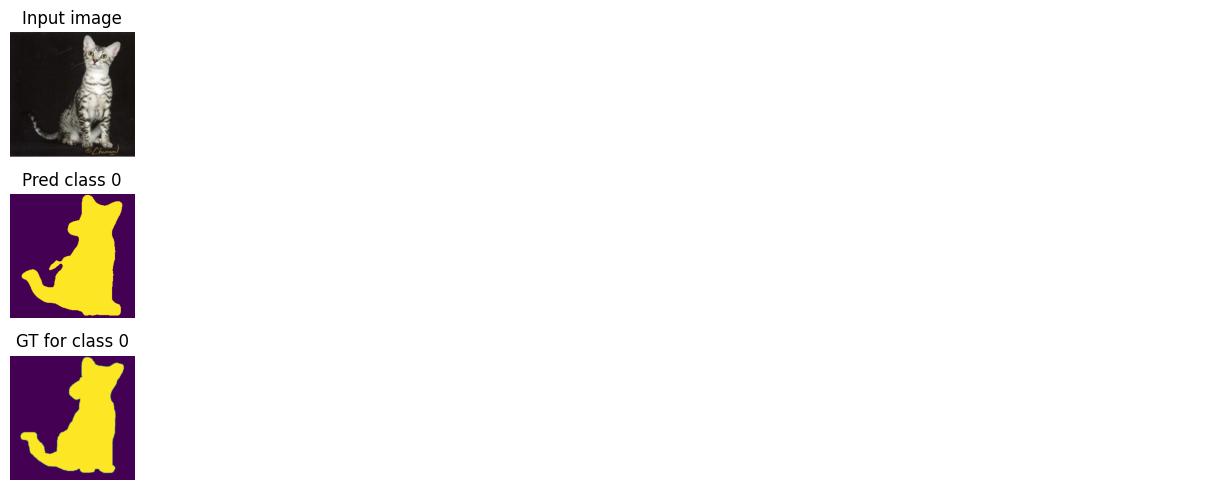

Train loss: 0.05731 | Time: 22m 51s | Val loss: 0.12107
Train_DICE_avg: 0.96207 | Train_Jaccard_avg: 0.92835 | Train_Sensitivity_avg: 0.98198 | Train_Specificity_avg: 0.96025 
Class 0 - Train_DICE: 0.96207 | Train_Jaccard: 0.92835 | Train_Sensitivity: 0.98198 | Train_Specificity: 0.96025 
Val_DICE_avg: 0.93777 | Val_Jaccard_avg: 0.88875 | Val_Sensitivity_avg: 0.96526 | Val_Specificity_avg: 0.94184 
Class 0 - Val_DICE: 0.93777 | Val_Jaccard: 0.88875 | Val_Sensitivity: 0.96526 | Val_Specificity: 0.94184 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]



Global Performance Metrics:
Loss mean: 0.10838, std: 0.01682
Dice Coefficient mean: 0.94587, std: 0.04357
Jaccard Index mean: 0.90021, std: 0.07066
Sensitivity mean: 0.96514, std: 0.03874
Specificity mean: 0.95190, std: 0.04883

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.94587, std: 0.04357
Jaccard mean: 0.90021, std: 0.07066
Sensitivity mean: 0.96514, std: 0.03874
Specificity mean: 0.95190, std: 0.04883


### Focal Loss

In [16]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","OxfordIIITPet-UNet-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.63 GB
GPU Memory - Reserved: 1.29 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

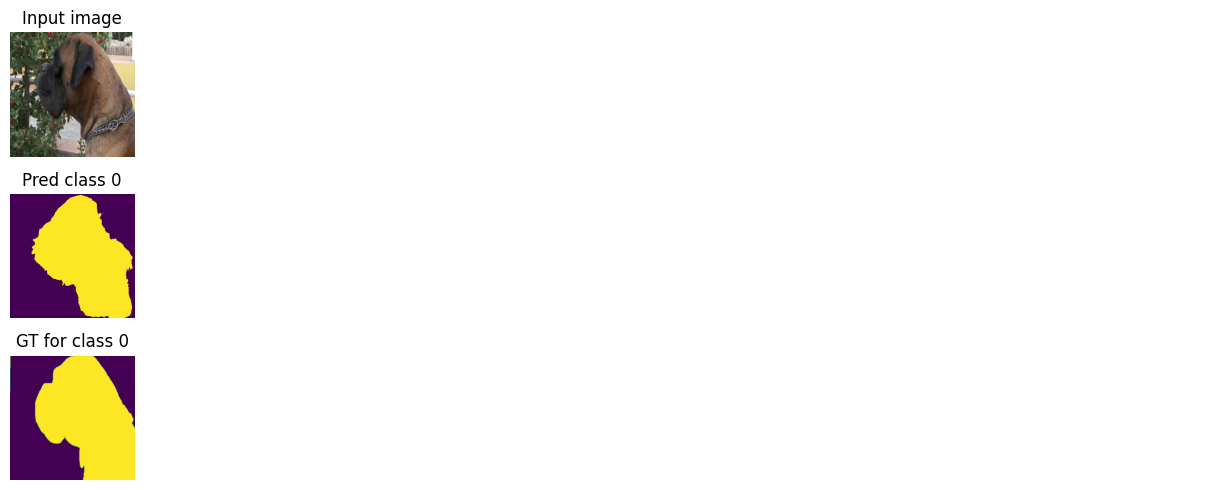

Train loss: 0.04276 | Time: 0m 22s | Val loss: 0.03851
Train_DICE_avg: 0.69332 | Train_Jaccard_avg: 0.57988 | Train_Sensitivity_avg: 0.87455 | Train_Specificity_avg: 0.79342 
Class 0 - Train_DICE: 0.69332 | Train_Jaccard: 0.57988 | Train_Sensitivity: 0.87455 | Train_Specificity: 0.79342 
Val_DICE_avg: 0.69030 | Val_Jaccard_avg: 0.54414 | Val_Sensitivity_avg: 0.97541 | Val_Specificity_avg: 0.74278 
Class 0 - Val_DICE: 0.69030 | Val_Jaccard: 0.54414 | Val_Sensitivity: 0.97541 | Val_Specificity: 0.74278 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02334 | Time: 0m 44s | Val loss: 0.02176
Train_DICE_avg: 0.88316 | Train_Jaccard_avg: 0.79876 | Train_Sensitivity_avg: 0.91050 | Train_Specificity_avg: 0.90070 
Class 0 - Train_DICE: 0.88316 | Train_Jaccard: 0.79876 | Train_Sensitivity: 0.91050 | Train_Specificity: 0.90070 
Val_DICE_avg: 0.86662 | Val_Jaccard_avg: 0.77542 | Val_Sensitivity_avg: 0.96525 | Val_Specificity_avg: 0.86596 
Class 0 - Val_DICE: 0.86662 | Val_Jaccard: 0.77542 | Val_Sensitivity: 0.96525 | Val_Specificity: 0.86596 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02014 | Time: 1m 6s | Val loss: 0.01984
Train_DICE_avg: 0.89980 | Train_Jaccard_avg: 0.82512 | Train_Sensitivity_avg: 0.92472 | Train_Specificity_avg: 0.91303 
Class 0 - Train_DICE: 0.89980 | Train_Jaccard: 0.82512 | Train_Sensitivity: 0.92472 | Train_Specificity: 0.91303 
Val_DICE_avg: 0.88130 | Val_Jaccard_avg: 0.79887 | Val_Sensitivity_avg: 0.96961 | Val_Specificity_avg: 0.88247 
Class 0 - Val_DICE: 0.88130 | Val_Jaccard: 0.79887 | Val_Sensitivity: 0.96961 | Val_Specificity: 0.88247 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01836 | Time: 1m 28s | Val loss: 0.01700
Train_DICE_avg: 0.91072 | Train_Jaccard_avg: 0.84216 | Train_Sensitivity_avg: 0.93172 | Train_Specificity_avg: 0.92028 
Class 0 - Train_DICE: 0.91072 | Train_Jaccard: 0.84216 | Train_Sensitivity: 0.93172 | Train_Specificity: 0.92028 
Val_DICE_avg: 0.90234 | Val_Jaccard_avg: 0.83156 | Val_Sensitivity_avg: 0.96302 | Val_Specificity_avg: 0.90683 
Class 0 - Val_DICE: 0.90234 | Val_Jaccard: 0.83156 | Val_Sensitivity: 0.96302 | Val_Specificity: 0.90683 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01678 | Time: 1m 50s | Val loss: 0.01648
Train_DICE_avg: 0.91709 | Train_Jaccard_avg: 0.85295 | Train_Sensitivity_avg: 0.93607 | Train_Specificity_avg: 0.92668 
Class 0 - Train_DICE: 0.91709 | Train_Jaccard: 0.85295 | Train_Sensitivity: 0.93607 | Train_Specificity: 0.92668 
Val_DICE_avg: 0.90836 | Val_Jaccard_avg: 0.84232 | Val_Sensitivity_avg: 0.96402 | Val_Specificity_avg: 0.91457 
Class 0 - Val_DICE: 0.90836 | Val_Jaccard: 0.84232 | Val_Sensitivity: 0.96402 | Val_Specificity: 0.91457 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

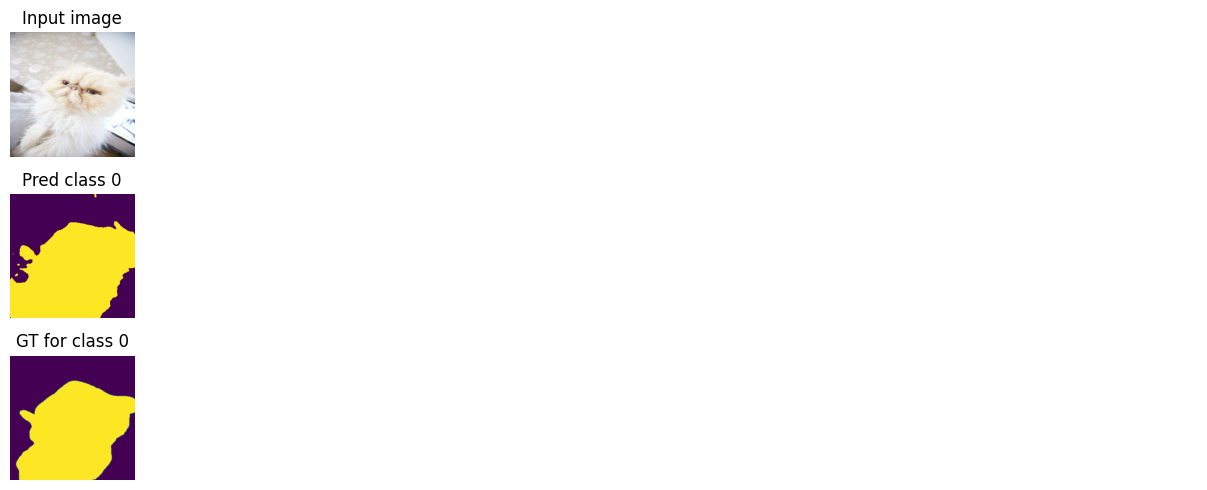

Train loss: 0.01629 | Time: 2m 12s | Val loss: 0.01684
Train_DICE_avg: 0.91903 | Train_Jaccard_avg: 0.85651 | Train_Sensitivity_avg: 0.94124 | Train_Specificity_avg: 0.92604 
Class 0 - Train_DICE: 0.91903 | Train_Jaccard: 0.85651 | Train_Sensitivity: 0.94124 | Train_Specificity: 0.92604 
Val_DICE_avg: 0.90586 | Val_Jaccard_avg: 0.83795 | Val_Sensitivity_avg: 0.96591 | Val_Specificity_avg: 0.91047 
Class 0 - Val_DICE: 0.90586 | Val_Jaccard: 0.83795 | Val_Sensitivity: 0.96591 | Val_Specificity: 0.91047 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01514 | Time: 2m 34s | Val loss: 0.01580
Train_DICE_avg: 0.92476 | Train_Jaccard_avg: 0.86539 | Train_Sensitivity_avg: 0.94309 | Train_Specificity_avg: 0.93132 
Class 0 - Train_DICE: 0.92476 | Train_Jaccard: 0.86539 | Train_Sensitivity: 0.94309 | Train_Specificity: 0.93132 
Val_DICE_avg: 0.91172 | Val_Jaccard_avg: 0.84764 | Val_Sensitivity_avg: 0.96501 | Val_Specificity_avg: 0.91757 
Class 0 - Val_DICE: 0.91172 | Val_Jaccard: 0.84764 | Val_Sensitivity: 0.96501 | Val_Specificity: 0.91757 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01471 | Time: 2m 56s | Val loss: 0.01564
Train_DICE_avg: 0.92654 | Train_Jaccard_avg: 0.86835 | Train_Sensitivity_avg: 0.94637 | Train_Specificity_avg: 0.93102 
Class 0 - Train_DICE: 0.92654 | Train_Jaccard: 0.86835 | Train_Sensitivity: 0.94637 | Train_Specificity: 0.93102 
Val_DICE_avg: 0.91471 | Val_Jaccard_avg: 0.85166 | Val_Sensitivity_avg: 0.96796 | Val_Specificity_avg: 0.91762 
Class 0 - Val_DICE: 0.91471 | Val_Jaccard: 0.85166 | Val_Sensitivity: 0.96796 | Val_Specificity: 0.91762 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01448 | Time: 3m 18s | Val loss: 0.01581
Train_DICE_avg: 0.92870 | Train_Jaccard_avg: 0.87193 | Train_Sensitivity_avg: 0.94835 | Train_Specificity_avg: 0.93326 
Class 0 - Train_DICE: 0.92870 | Train_Jaccard: 0.87193 | Train_Sensitivity: 0.94835 | Train_Specificity: 0.93326 
Val_DICE_avg: 0.91111 | Val_Jaccard_avg: 0.84663 | Val_Sensitivity_avg: 0.96774 | Val_Specificity_avg: 0.91703 
Class 0 - Val_DICE: 0.91111 | Val_Jaccard: 0.84663 | Val_Sensitivity: 0.96774 | Val_Specificity: 0.91703 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01367 | Time: 3m 40s | Val loss: 0.01424
Train_DICE_avg: 0.93110 | Train_Jaccard_avg: 0.87595 | Train_Sensitivity_avg: 0.94973 | Train_Specificity_avg: 0.93503 
Class 0 - Train_DICE: 0.93110 | Train_Jaccard: 0.87595 | Train_Sensitivity: 0.94973 | Train_Specificity: 0.93503 
Val_DICE_avg: 0.92437 | Val_Jaccard_avg: 0.86709 | Val_Sensitivity_avg: 0.96180 | Val_Specificity_avg: 0.93193 
Class 0 - Val_DICE: 0.92437 | Val_Jaccard: 0.86709 | Val_Sensitivity: 0.96180 | Val_Specificity: 0.93193 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

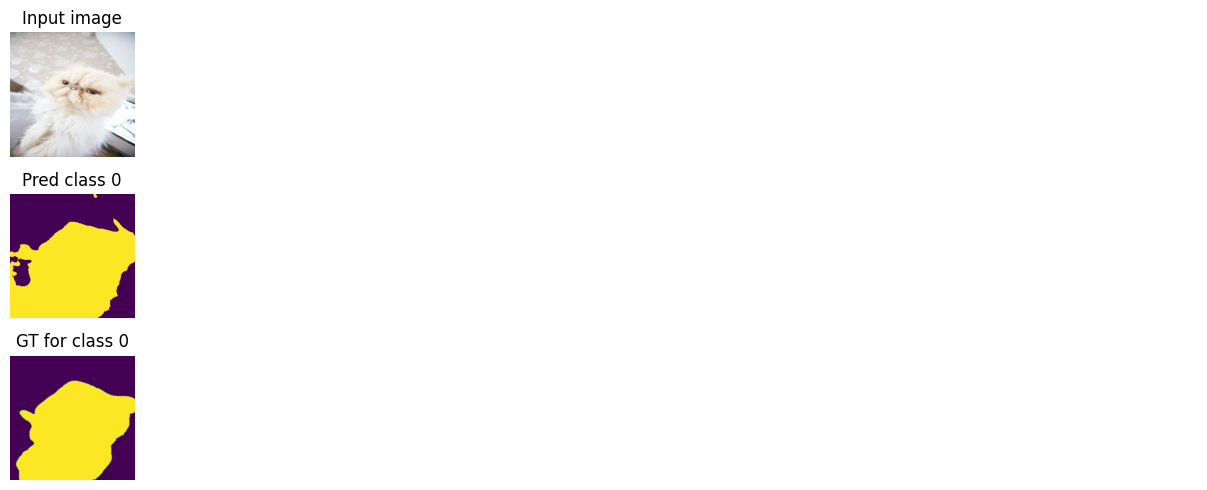

Train loss: 0.01485 | Time: 4m 3s | Val loss: 0.01578
Train_DICE_avg: 0.92497 | Train_Jaccard_avg: 0.86603 | Train_Sensitivity_avg: 0.94817 | Train_Specificity_avg: 0.93004 
Class 0 - Train_DICE: 0.92497 | Train_Jaccard: 0.86603 | Train_Sensitivity: 0.94817 | Train_Specificity: 0.93004 
Val_DICE_avg: 0.91174 | Val_Jaccard_avg: 0.84568 | Val_Sensitivity_avg: 0.97042 | Val_Specificity_avg: 0.91189 
Class 0 - Val_DICE: 0.91174 | Val_Jaccard: 0.84568 | Val_Sensitivity: 0.97042 | Val_Specificity: 0.91189 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01383 | Time: 4m 25s | Val loss: 0.01512
Train_DICE_avg: 0.93017 | Train_Jaccard_avg: 0.87490 | Train_Sensitivity_avg: 0.94851 | Train_Specificity_avg: 0.93572 
Class 0 - Train_DICE: 0.93017 | Train_Jaccard: 0.87490 | Train_Sensitivity: 0.94851 | Train_Specificity: 0.93572 
Val_DICE_avg: 0.91836 | Val_Jaccard_avg: 0.85815 | Val_Sensitivity_avg: 0.97131 | Val_Specificity_avg: 0.91949 
Class 0 - Val_DICE: 0.91836 | Val_Jaccard: 0.85815 | Val_Sensitivity: 0.97131 | Val_Specificity: 0.91949 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01280 | Time: 4m 47s | Val loss: 0.01474
Train_DICE_avg: 0.93553 | Train_Jaccard_avg: 0.88339 | Train_Sensitivity_avg: 0.95352 | Train_Specificity_avg: 0.94020 
Class 0 - Train_DICE: 0.93553 | Train_Jaccard: 0.88339 | Train_Sensitivity: 0.95352 | Train_Specificity: 0.94020 
Val_DICE_avg: 0.92232 | Val_Jaccard_avg: 0.86379 | Val_Sensitivity_avg: 0.96799 | Val_Specificity_avg: 0.92338 
Class 0 - Val_DICE: 0.92232 | Val_Jaccard: 0.86379 | Val_Sensitivity: 0.96799 | Val_Specificity: 0.92338 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01280 | Time: 5m 10s | Val loss: 0.01475
Train_DICE_avg: 0.93422 | Train_Jaccard_avg: 0.88118 | Train_Sensitivity_avg: 0.95293 | Train_Specificity_avg: 0.93873 
Class 0 - Train_DICE: 0.93422 | Train_Jaccard: 0.88118 | Train_Sensitivity: 0.95293 | Train_Specificity: 0.93873 
Val_DICE_avg: 0.92136 | Val_Jaccard_avg: 0.86300 | Val_Sensitivity_avg: 0.96716 | Val_Specificity_avg: 0.92340 
Class 0 - Val_DICE: 0.92136 | Val_Jaccard: 0.86300 | Val_Sensitivity: 0.96716 | Val_Specificity: 0.92340 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01232 | Time: 5m 32s | Val loss: 0.01613
Train_DICE_avg: 0.93608 | Train_Jaccard_avg: 0.88437 | Train_Sensitivity_avg: 0.95539 | Train_Specificity_avg: 0.93946 
Class 0 - Train_DICE: 0.93608 | Train_Jaccard: 0.88437 | Train_Sensitivity: 0.95539 | Train_Specificity: 0.93946 
Val_DICE_avg: 0.91526 | Val_Jaccard_avg: 0.85277 | Val_Sensitivity_avg: 0.97170 | Val_Specificity_avg: 0.91601 
Class 0 - Val_DICE: 0.91526 | Val_Jaccard: 0.85277 | Val_Sensitivity: 0.97170 | Val_Specificity: 0.91601 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

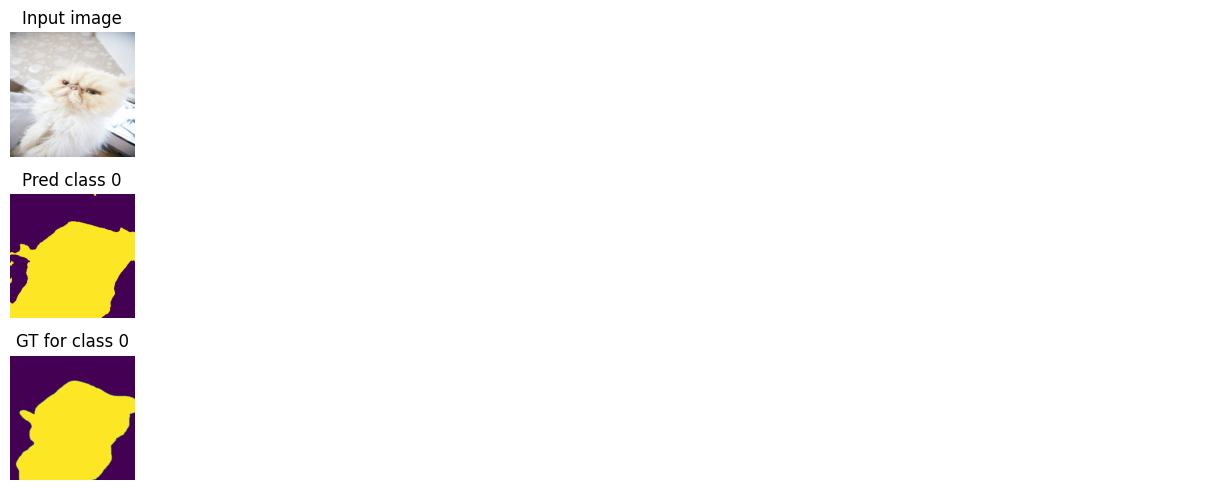

Train loss: 0.01214 | Time: 5m 55s | Val loss: 0.01359
Train_DICE_avg: 0.93727 | Train_Jaccard_avg: 0.88645 | Train_Sensitivity_avg: 0.95619 | Train_Specificity_avg: 0.94033 
Class 0 - Train_DICE: 0.93727 | Train_Jaccard: 0.88645 | Train_Sensitivity: 0.95619 | Train_Specificity: 0.94033 
Val_DICE_avg: 0.92884 | Val_Jaccard_avg: 0.87377 | Val_Sensitivity_avg: 0.96467 | Val_Specificity_avg: 0.93119 
Class 0 - Val_DICE: 0.92884 | Val_Jaccard: 0.87377 | Val_Sensitivity: 0.96467 | Val_Specificity: 0.93119 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01130 | Time: 6m 17s | Val loss: 0.01404
Train_DICE_avg: 0.93983 | Train_Jaccard_avg: 0.89055 | Train_Sensitivity_avg: 0.95639 | Train_Specificity_avg: 0.94372 
Class 0 - Train_DICE: 0.93983 | Train_Jaccard: 0.89055 | Train_Sensitivity: 0.95639 | Train_Specificity: 0.94372 
Val_DICE_avg: 0.92662 | Val_Jaccard_avg: 0.87171 | Val_Sensitivity_avg: 0.96624 | Val_Specificity_avg: 0.93237 
Class 0 - Val_DICE: 0.92662 | Val_Jaccard: 0.87171 | Val_Sensitivity: 0.96624 | Val_Specificity: 0.93237 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01188 | Time: 6m 40s | Val loss: 0.01388
Train_DICE_avg: 0.93819 | Train_Jaccard_avg: 0.88814 | Train_Sensitivity_avg: 0.95652 | Train_Specificity_avg: 0.94185 
Class 0 - Train_DICE: 0.93819 | Train_Jaccard: 0.88814 | Train_Sensitivity: 0.95652 | Train_Specificity: 0.94185 
Val_DICE_avg: 0.93144 | Val_Jaccard_avg: 0.87858 | Val_Sensitivity_avg: 0.95718 | Val_Specificity_avg: 0.93925 
Class 0 - Val_DICE: 0.93144 | Val_Jaccard: 0.87858 | Val_Sensitivity: 0.95718 | Val_Specificity: 0.93925 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01125 | Time: 7m 2s | Val loss: 0.01475
Train_DICE_avg: 0.94029 | Train_Jaccard_avg: 0.89152 | Train_Sensitivity_avg: 0.95804 | Train_Specificity_avg: 0.94312 
Class 0 - Train_DICE: 0.94029 | Train_Jaccard: 0.89152 | Train_Sensitivity: 0.95804 | Train_Specificity: 0.94312 
Val_DICE_avg: 0.92339 | Val_Jaccard_avg: 0.86673 | Val_Sensitivity_avg: 0.96402 | Val_Specificity_avg: 0.92646 
Class 0 - Val_DICE: 0.92339 | Val_Jaccard: 0.86673 | Val_Sensitivity: 0.96402 | Val_Specificity: 0.92646 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01112 | Time: 7m 24s | Val loss: 0.01396
Train_DICE_avg: 0.94170 | Train_Jaccard_avg: 0.89383 | Train_Sensitivity_avg: 0.95820 | Train_Specificity_avg: 0.94529 
Class 0 - Train_DICE: 0.94170 | Train_Jaccard: 0.89383 | Train_Sensitivity: 0.95820 | Train_Specificity: 0.94529 
Val_DICE_avg: 0.92664 | Val_Jaccard_avg: 0.87096 | Val_Sensitivity_avg: 0.96482 | Val_Specificity_avg: 0.93108 
Class 0 - Val_DICE: 0.92664 | Val_Jaccard: 0.87096 | Val_Sensitivity: 0.96482 | Val_Specificity: 0.93108 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

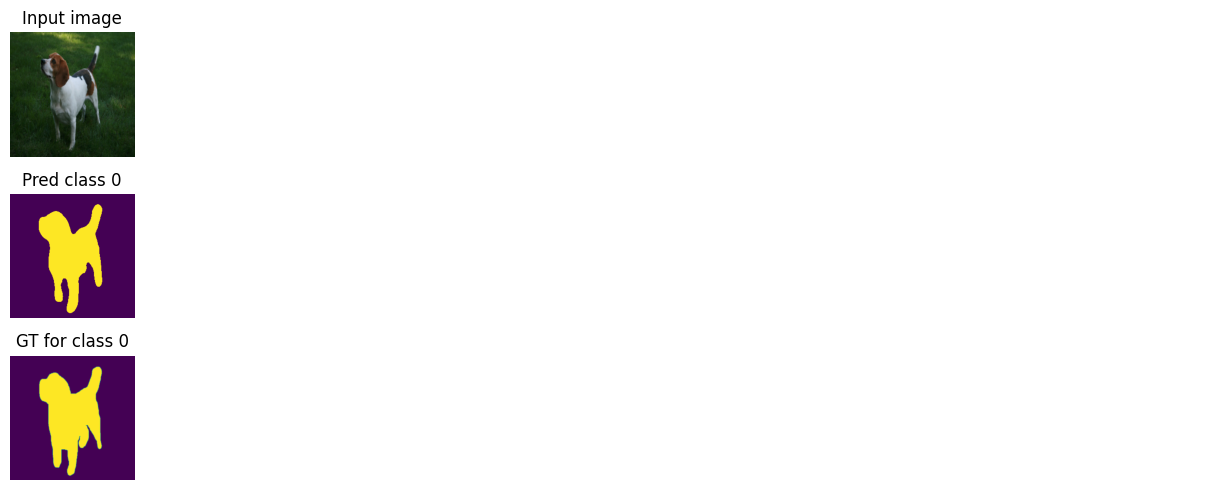

Train loss: 0.01197 | Time: 7m 47s | Val loss: 0.01511
Train_DICE_avg: 0.93780 | Train_Jaccard_avg: 0.88761 | Train_Sensitivity_avg: 0.95693 | Train_Specificity_avg: 0.94087 
Class 0 - Train_DICE: 0.93780 | Train_Jaccard: 0.88761 | Train_Sensitivity: 0.95693 | Train_Specificity: 0.94087 
Val_DICE_avg: 0.92662 | Val_Jaccard_avg: 0.87220 | Val_Sensitivity_avg: 0.96433 | Val_Specificity_avg: 0.93192 
Class 0 - Val_DICE: 0.92662 | Val_Jaccard: 0.87220 | Val_Sensitivity: 0.96433 | Val_Specificity: 0.93192 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01067 | Time: 8m 10s | Val loss: 0.01452
Train_DICE_avg: 0.94294 | Train_Jaccard_avg: 0.89605 | Train_Sensitivity_avg: 0.95955 | Train_Specificity_avg: 0.94521 
Class 0 - Train_DICE: 0.94294 | Train_Jaccard: 0.89605 | Train_Sensitivity: 0.95955 | Train_Specificity: 0.94521 
Val_DICE_avg: 0.92551 | Val_Jaccard_avg: 0.86852 | Val_Sensitivity_avg: 0.96921 | Val_Specificity_avg: 0.92666 
Class 0 - Val_DICE: 0.92551 | Val_Jaccard: 0.86852 | Val_Sensitivity: 0.96921 | Val_Specificity: 0.92666 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01068 | Time: 8m 32s | Val loss: 0.01592
Train_DICE_avg: 0.94378 | Train_Jaccard_avg: 0.89759 | Train_Sensitivity_avg: 0.95965 | Train_Specificity_avg: 0.94837 
Class 0 - Train_DICE: 0.94378 | Train_Jaccard: 0.89759 | Train_Sensitivity: 0.95965 | Train_Specificity: 0.94837 
Val_DICE_avg: 0.92588 | Val_Jaccard_avg: 0.87036 | Val_Sensitivity_avg: 0.96808 | Val_Specificity_avg: 0.92995 
Class 0 - Val_DICE: 0.92588 | Val_Jaccard: 0.87036 | Val_Sensitivity: 0.96808 | Val_Specificity: 0.92995 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01034 | Time: 8m 54s | Val loss: 0.01297
Train_DICE_avg: 0.94462 | Train_Jaccard_avg: 0.89898 | Train_Sensitivity_avg: 0.96163 | Train_Specificity_avg: 0.94773 
Class 0 - Train_DICE: 0.94462 | Train_Jaccard: 0.89898 | Train_Sensitivity: 0.96163 | Train_Specificity: 0.94773 
Val_DICE_avg: 0.93513 | Val_Jaccard_avg: 0.88529 | Val_Sensitivity_avg: 0.95534 | Val_Specificity_avg: 0.94513 
Class 0 - Val_DICE: 0.93513 | Val_Jaccard: 0.88529 | Val_Sensitivity: 0.95534 | Val_Specificity: 0.94513 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00988 | Time: 9m 17s | Val loss: 0.01725
Train_DICE_avg: 0.94546 | Train_Jaccard_avg: 0.90068 | Train_Sensitivity_avg: 0.96150 | Train_Specificity_avg: 0.94915 
Class 0 - Train_DICE: 0.94546 | Train_Jaccard: 0.90068 | Train_Sensitivity: 0.96150 | Train_Specificity: 0.94915 
Val_DICE_avg: 0.91720 | Val_Jaccard_avg: 0.85652 | Val_Sensitivity_avg: 0.97667 | Val_Specificity_avg: 0.91590 
Class 0 - Val_DICE: 0.91720 | Val_Jaccard: 0.85652 | Val_Sensitivity: 0.97667 | Val_Specificity: 0.91590 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

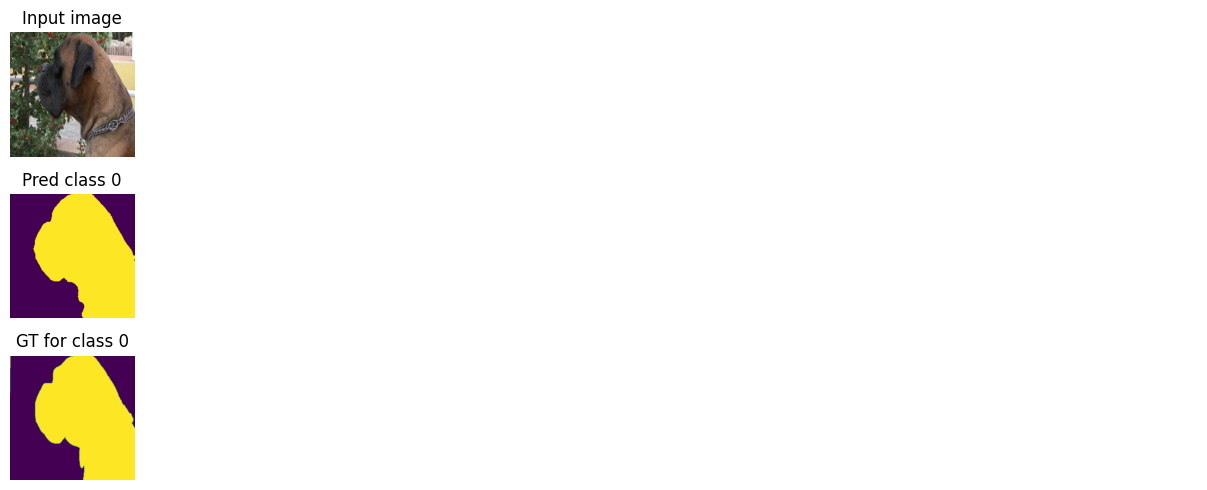

Train loss: 0.00976 | Time: 9m 39s | Val loss: 0.01336
Train_DICE_avg: 0.94643 | Train_Jaccard_avg: 0.90217 | Train_Sensitivity_avg: 0.96243 | Train_Specificity_avg: 0.95046 
Class 0 - Train_DICE: 0.94643 | Train_Jaccard: 0.90217 | Train_Sensitivity: 0.96243 | Train_Specificity: 0.95046 
Val_DICE_avg: 0.93007 | Val_Jaccard_avg: 0.87759 | Val_Sensitivity_avg: 0.96089 | Val_Specificity_avg: 0.93729 
Class 0 - Val_DICE: 0.93007 | Val_Jaccard: 0.87759 | Val_Sensitivity: 0.96089 | Val_Specificity: 0.93729 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00995 | Time: 10m 2s | Val loss: 0.01497
Train_DICE_avg: 0.94537 | Train_Jaccard_avg: 0.90042 | Train_Sensitivity_avg: 0.96257 | Train_Specificity_avg: 0.94809 
Class 0 - Train_DICE: 0.94537 | Train_Jaccard: 0.90042 | Train_Sensitivity: 0.96257 | Train_Specificity: 0.94809 
Val_DICE_avg: 0.92951 | Val_Jaccard_avg: 0.87521 | Val_Sensitivity_avg: 0.96967 | Val_Specificity_avg: 0.93054 
Class 0 - Val_DICE: 0.92951 | Val_Jaccard: 0.87521 | Val_Sensitivity: 0.96967 | Val_Specificity: 0.93054 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00967 | Time: 10m 24s | Val loss: 0.01476
Train_DICE_avg: 0.94793 | Train_Jaccard_avg: 0.90396 | Train_Sensitivity_avg: 0.96494 | Train_Specificity_avg: 0.94985 
Class 0 - Train_DICE: 0.94793 | Train_Jaccard: 0.90396 | Train_Sensitivity: 0.96494 | Train_Specificity: 0.94985 
Val_DICE_avg: 0.93010 | Val_Jaccard_avg: 0.87718 | Val_Sensitivity_avg: 0.97090 | Val_Specificity_avg: 0.93184 
Class 0 - Val_DICE: 0.93010 | Val_Jaccard: 0.87718 | Val_Sensitivity: 0.97090 | Val_Specificity: 0.93184 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00957 | Time: 10m 47s | Val loss: 0.01329
Train_DICE_avg: 0.94754 | Train_Jaccard_avg: 0.90402 | Train_Sensitivity_avg: 0.96315 | Train_Specificity_avg: 0.95053 
Class 0 - Train_DICE: 0.94754 | Train_Jaccard: 0.90402 | Train_Sensitivity: 0.96315 | Train_Specificity: 0.95053 
Val_DICE_avg: 0.93620 | Val_Jaccard_avg: 0.88640 | Val_Sensitivity_avg: 0.96249 | Val_Specificity_avg: 0.94065 
Class 0 - Val_DICE: 0.93620 | Val_Jaccard: 0.88640 | Val_Sensitivity: 0.96249 | Val_Specificity: 0.94065 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00949 | Time: 11m 9s | Val loss: 0.01315
Train_DICE_avg: 0.94741 | Train_Jaccard_avg: 0.90381 | Train_Sensitivity_avg: 0.96368 | Train_Specificity_avg: 0.95097 
Class 0 - Train_DICE: 0.94741 | Train_Jaccard: 0.90381 | Train_Sensitivity: 0.96368 | Train_Specificity: 0.95097 
Val_DICE_avg: 0.93697 | Val_Jaccard_avg: 0.88758 | Val_Sensitivity_avg: 0.96200 | Val_Specificity_avg: 0.94336 
Class 0 - Val_DICE: 0.93697 | Val_Jaccard: 0.88758 | Val_Sensitivity: 0.96200 | Val_Specificity: 0.94336 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

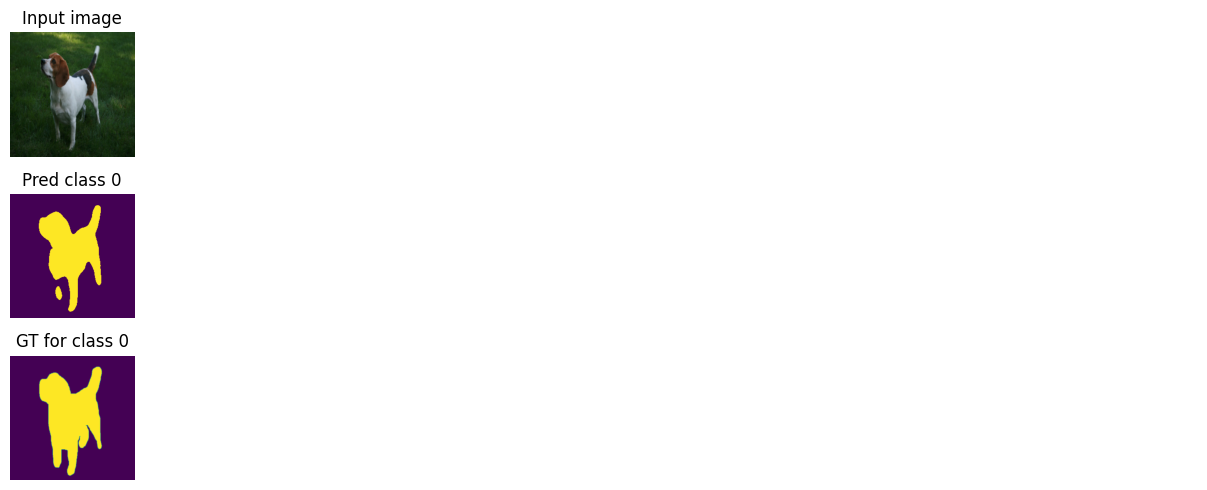

Train loss: 0.00963 | Time: 11m 32s | Val loss: 0.01726
Train_DICE_avg: 0.94730 | Train_Jaccard_avg: 0.90352 | Train_Sensitivity_avg: 0.96371 | Train_Specificity_avg: 0.95003 
Class 0 - Train_DICE: 0.94730 | Train_Jaccard: 0.90352 | Train_Sensitivity: 0.96371 | Train_Specificity: 0.95003 
Val_DICE_avg: 0.92050 | Val_Jaccard_avg: 0.86228 | Val_Sensitivity_avg: 0.97496 | Val_Specificity_avg: 0.92516 
Class 0 - Val_DICE: 0.92050 | Val_Jaccard: 0.86228 | Val_Sensitivity: 0.97496 | Val_Specificity: 0.92516 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00915 | Time: 11m 54s | Val loss: 0.01429
Train_DICE_avg: 0.94960 | Train_Jaccard_avg: 0.90751 | Train_Sensitivity_avg: 0.96563 | Train_Specificity_avg: 0.95305 
Class 0 - Train_DICE: 0.94960 | Train_Jaccard: 0.90751 | Train_Sensitivity: 0.96563 | Train_Specificity: 0.95305 
Val_DICE_avg: 0.93380 | Val_Jaccard_avg: 0.88204 | Val_Sensitivity_avg: 0.96479 | Val_Specificity_avg: 0.93679 
Class 0 - Val_DICE: 0.93380 | Val_Jaccard: 0.88204 | Val_Sensitivity: 0.96479 | Val_Specificity: 0.93679 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00863 | Time: 12m 17s | Val loss: 0.01404
Train_DICE_avg: 0.95099 | Train_Jaccard_avg: 0.91009 | Train_Sensitivity_avg: 0.96602 | Train_Specificity_avg: 0.95504 
Class 0 - Train_DICE: 0.95099 | Train_Jaccard: 0.91009 | Train_Sensitivity: 0.96602 | Train_Specificity: 0.95504 
Val_DICE_avg: 0.93134 | Val_Jaccard_avg: 0.87784 | Val_Sensitivity_avg: 0.96907 | Val_Specificity_avg: 0.93416 
Class 0 - Val_DICE: 0.93134 | Val_Jaccard: 0.87784 | Val_Sensitivity: 0.96907 | Val_Specificity: 0.93416 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00860 | Time: 12m 39s | Val loss: 0.01368
Train_DICE_avg: 0.95214 | Train_Jaccard_avg: 0.91202 | Train_Sensitivity_avg: 0.96639 | Train_Specificity_avg: 0.95531 
Class 0 - Train_DICE: 0.95214 | Train_Jaccard: 0.91202 | Train_Sensitivity: 0.96639 | Train_Specificity: 0.95531 
Val_DICE_avg: 0.93506 | Val_Jaccard_avg: 0.88517 | Val_Sensitivity_avg: 0.96701 | Val_Specificity_avg: 0.94084 
Class 0 - Val_DICE: 0.93506 | Val_Jaccard: 0.88517 | Val_Sensitivity: 0.96701 | Val_Specificity: 0.94084 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00840 | Time: 13m 2s | Val loss: 0.01358
Train_DICE_avg: 0.95273 | Train_Jaccard_avg: 0.91313 | Train_Sensitivity_avg: 0.96779 | Train_Specificity_avg: 0.95581 
Class 0 - Train_DICE: 0.95273 | Train_Jaccard: 0.91313 | Train_Sensitivity: 0.96779 | Train_Specificity: 0.95581 
Val_DICE_avg: 0.93750 | Val_Jaccard_avg: 0.88822 | Val_Sensitivity_avg: 0.96415 | Val_Specificity_avg: 0.94292 
Class 0 - Val_DICE: 0.93750 | Val_Jaccard: 0.88822 | Val_Sensitivity: 0.96415 | Val_Specificity: 0.94292 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

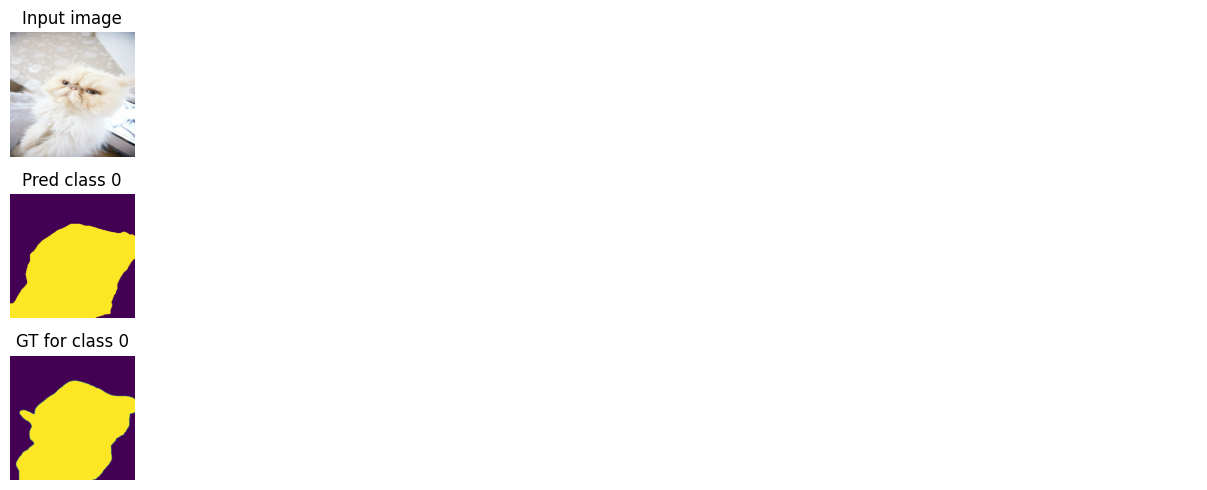

Train loss: 0.00826 | Time: 13m 25s | Val loss: 0.01377
Train_DICE_avg: 0.95383 | Train_Jaccard_avg: 0.91442 | Train_Sensitivity_avg: 0.96836 | Train_Specificity_avg: 0.95669 
Class 0 - Train_DICE: 0.95383 | Train_Jaccard: 0.91442 | Train_Sensitivity: 0.96836 | Train_Specificity: 0.95669 
Val_DICE_avg: 0.93504 | Val_Jaccard_avg: 0.88386 | Val_Sensitivity_avg: 0.96837 | Val_Specificity_avg: 0.93861 
Class 0 - Val_DICE: 0.93504 | Val_Jaccard: 0.88386 | Val_Sensitivity: 0.96837 | Val_Specificity: 0.93861 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00826 | Time: 13m 47s | Val loss: 0.01397
Train_DICE_avg: 0.95337 | Train_Jaccard_avg: 0.91421 | Train_Sensitivity_avg: 0.96767 | Train_Specificity_avg: 0.95635 
Class 0 - Train_DICE: 0.95337 | Train_Jaccard: 0.91421 | Train_Sensitivity: 0.96767 | Train_Specificity: 0.95635 
Val_DICE_avg: 0.93717 | Val_Jaccard_avg: 0.88752 | Val_Sensitivity_avg: 0.96198 | Val_Specificity_avg: 0.94269 
Class 0 - Val_DICE: 0.93717 | Val_Jaccard: 0.88752 | Val_Sensitivity: 0.96198 | Val_Specificity: 0.94269 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00789 | Time: 14m 10s | Val loss: 0.01442
Train_DICE_avg: 0.95549 | Train_Jaccard_avg: 0.91796 | Train_Sensitivity_avg: 0.96964 | Train_Specificity_avg: 0.95948 
Class 0 - Train_DICE: 0.95549 | Train_Jaccard: 0.91796 | Train_Sensitivity: 0.96964 | Train_Specificity: 0.95948 
Val_DICE_avg: 0.92939 | Val_Jaccard_avg: 0.87475 | Val_Sensitivity_avg: 0.96939 | Val_Specificity_avg: 0.92916 
Class 0 - Val_DICE: 0.92939 | Val_Jaccard: 0.87475 | Val_Sensitivity: 0.96939 | Val_Specificity: 0.92916 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00765 | Time: 14m 32s | Val loss: 0.01334
Train_DICE_avg: 0.95571 | Train_Jaccard_avg: 0.91840 | Train_Sensitivity_avg: 0.96952 | Train_Specificity_avg: 0.95892 
Class 0 - Train_DICE: 0.95571 | Train_Jaccard: 0.91840 | Train_Sensitivity: 0.96952 | Train_Specificity: 0.95892 
Val_DICE_avg: 0.93469 | Val_Jaccard_avg: 0.88329 | Val_Sensitivity_avg: 0.96737 | Val_Specificity_avg: 0.93610 
Class 0 - Val_DICE: 0.93469 | Val_Jaccard: 0.88329 | Val_Sensitivity: 0.96737 | Val_Specificity: 0.93610 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00756 | Time: 14m 55s | Val loss: 0.01361
Train_DICE_avg: 0.95605 | Train_Jaccard_avg: 0.91899 | Train_Sensitivity_avg: 0.97063 | Train_Specificity_avg: 0.96038 
Class 0 - Train_DICE: 0.95605 | Train_Jaccard: 0.91899 | Train_Sensitivity: 0.97063 | Train_Specificity: 0.96038 
Val_DICE_avg: 0.93867 | Val_Jaccard_avg: 0.89013 | Val_Sensitivity_avg: 0.96431 | Val_Specificity_avg: 0.94291 
Class 0 - Val_DICE: 0.93867 | Val_Jaccard: 0.89013 | Val_Sensitivity: 0.96431 | Val_Specificity: 0.94291 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

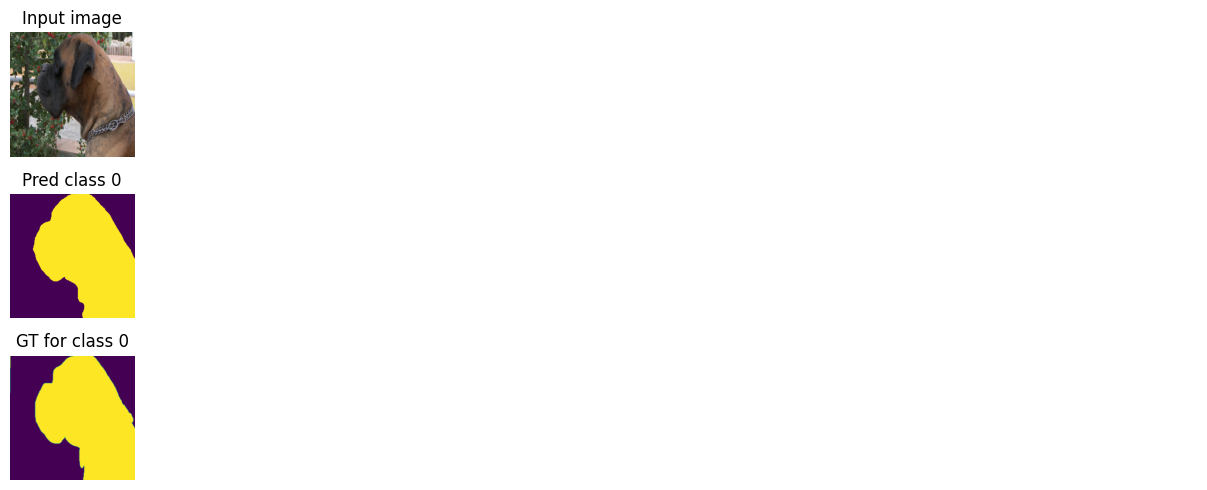

Train loss: 0.00746 | Time: 15m 18s | Val loss: 0.01417
Train_DICE_avg: 0.95784 | Train_Jaccard_avg: 0.92139 | Train_Sensitivity_avg: 0.97171 | Train_Specificity_avg: 0.96040 
Class 0 - Train_DICE: 0.95784 | Train_Jaccard: 0.92139 | Train_Sensitivity: 0.97171 | Train_Specificity: 0.96040 
Val_DICE_avg: 0.93423 | Val_Jaccard_avg: 0.88285 | Val_Sensitivity_avg: 0.96696 | Val_Specificity_avg: 0.93725 
Class 0 - Val_DICE: 0.93423 | Val_Jaccard: 0.88285 | Val_Sensitivity: 0.96696 | Val_Specificity: 0.93725 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00720 | Time: 15m 40s | Val loss: 0.01384
Train_DICE_avg: 0.95739 | Train_Jaccard_avg: 0.92138 | Train_Sensitivity_avg: 0.97147 | Train_Specificity_avg: 0.96168 
Class 0 - Train_DICE: 0.95739 | Train_Jaccard: 0.92138 | Train_Sensitivity: 0.97147 | Train_Specificity: 0.96168 
Val_DICE_avg: 0.93773 | Val_Jaccard_avg: 0.88863 | Val_Sensitivity_avg: 0.96605 | Val_Specificity_avg: 0.94042 
Class 0 - Val_DICE: 0.93773 | Val_Jaccard: 0.88863 | Val_Sensitivity: 0.96605 | Val_Specificity: 0.94042 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00744 | Time: 16m 2s | Val loss: 0.01357
Train_DICE_avg: 0.95679 | Train_Jaccard_avg: 0.92034 | Train_Sensitivity_avg: 0.97025 | Train_Specificity_avg: 0.95973 
Class 0 - Train_DICE: 0.95679 | Train_Jaccard: 0.92034 | Train_Sensitivity: 0.97025 | Train_Specificity: 0.95973 
Val_DICE_avg: 0.93978 | Val_Jaccard_avg: 0.89240 | Val_Sensitivity_avg: 0.96296 | Val_Specificity_avg: 0.94503 
Class 0 - Val_DICE: 0.93978 | Val_Jaccard: 0.89240 | Val_Sensitivity: 0.96296 | Val_Specificity: 0.94503 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00728 | Time: 16m 25s | Val loss: 0.01373
Train_DICE_avg: 0.95864 | Train_Jaccard_avg: 0.92299 | Train_Sensitivity_avg: 0.97200 | Train_Specificity_avg: 0.96143 
Class 0 - Train_DICE: 0.95864 | Train_Jaccard: 0.92299 | Train_Sensitivity: 0.97200 | Train_Specificity: 0.96143 
Val_DICE_avg: 0.93767 | Val_Jaccard_avg: 0.88836 | Val_Sensitivity_avg: 0.96497 | Val_Specificity_avg: 0.93914 
Class 0 - Val_DICE: 0.93767 | Val_Jaccard: 0.88836 | Val_Sensitivity: 0.96497 | Val_Specificity: 0.93914 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00707 | Time: 16m 47s | Val loss: 0.01385
Train_DICE_avg: 0.95955 | Train_Jaccard_avg: 0.92449 | Train_Sensitivity_avg: 0.97279 | Train_Specificity_avg: 0.96234 
Class 0 - Train_DICE: 0.95955 | Train_Jaccard: 0.92449 | Train_Sensitivity: 0.97279 | Train_Specificity: 0.96234 
Val_DICE_avg: 0.94023 | Val_Jaccard_avg: 0.89292 | Val_Sensitivity_avg: 0.96093 | Val_Specificity_avg: 0.94654 
Class 0 - Val_DICE: 0.94023 | Val_Jaccard: 0.89292 | Val_Sensitivity: 0.96093 | Val_Specificity: 0.94654 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

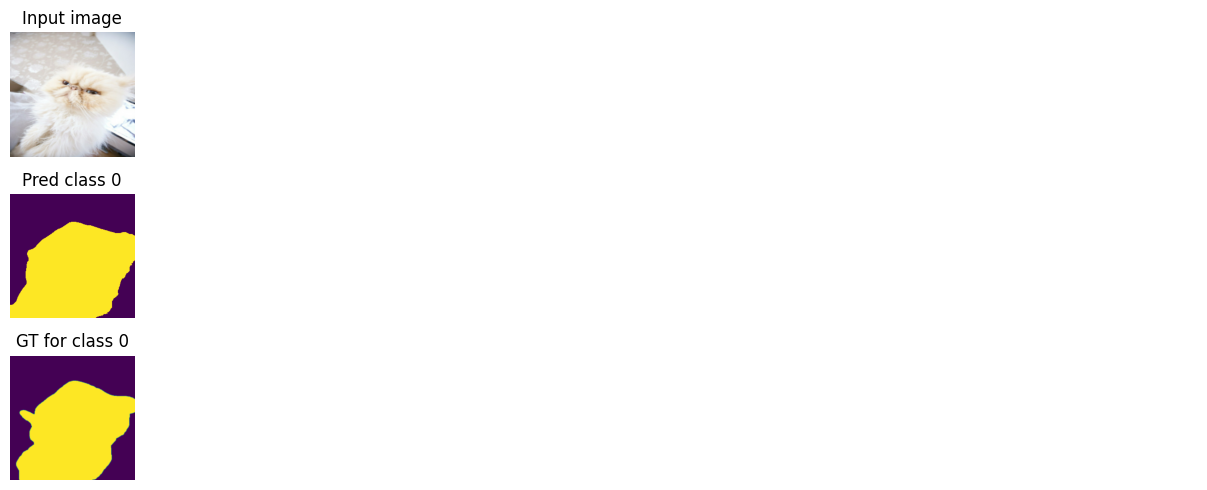

Train loss: 0.00709 | Time: 17m 10s | Val loss: 0.01393
Train_DICE_avg: 0.95805 | Train_Jaccard_avg: 0.92256 | Train_Sensitivity_avg: 0.97190 | Train_Specificity_avg: 0.96041 
Class 0 - Train_DICE: 0.95805 | Train_Jaccard: 0.92256 | Train_Sensitivity: 0.97190 | Train_Specificity: 0.96041 
Val_DICE_avg: 0.93957 | Val_Jaccard_avg: 0.89201 | Val_Sensitivity_avg: 0.96080 | Val_Specificity_avg: 0.94646 
Class 0 - Val_DICE: 0.93957 | Val_Jaccard: 0.89201 | Val_Sensitivity: 0.96080 | Val_Specificity: 0.94646 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00706 | Time: 17m 33s | Val loss: 0.01372
Train_DICE_avg: 0.95914 | Train_Jaccard_avg: 0.92385 | Train_Sensitivity_avg: 0.97233 | Train_Specificity_avg: 0.96217 
Class 0 - Train_DICE: 0.95914 | Train_Jaccard: 0.92385 | Train_Sensitivity: 0.97233 | Train_Specificity: 0.96217 
Val_DICE_avg: 0.94160 | Val_Jaccard_avg: 0.89547 | Val_Sensitivity_avg: 0.95779 | Val_Specificity_avg: 0.94898 
Class 0 - Val_DICE: 0.94160 | Val_Jaccard: 0.89547 | Val_Sensitivity: 0.95779 | Val_Specificity: 0.94898 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00701 | Time: 17m 56s | Val loss: 0.01407
Train_DICE_avg: 0.95968 | Train_Jaccard_avg: 0.92483 | Train_Sensitivity_avg: 0.97436 | Train_Specificity_avg: 0.96212 
Class 0 - Train_DICE: 0.95968 | Train_Jaccard: 0.92483 | Train_Sensitivity: 0.97436 | Train_Specificity: 0.96212 
Val_DICE_avg: 0.94126 | Val_Jaccard_avg: 0.89521 | Val_Sensitivity_avg: 0.95295 | Val_Specificity_avg: 0.95162 
Class 0 - Val_DICE: 0.94126 | Val_Jaccard: 0.89521 | Val_Sensitivity: 0.95295 | Val_Specificity: 0.95162 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00692 | Time: 18m 18s | Val loss: 0.01420
Train_DICE_avg: 0.96019 | Train_Jaccard_avg: 0.92576 | Train_Sensitivity_avg: 0.97441 | Train_Specificity_avg: 0.96216 
Class 0 - Train_DICE: 0.96019 | Train_Jaccard: 0.92576 | Train_Sensitivity: 0.97441 | Train_Specificity: 0.96216 
Val_DICE_avg: 0.94070 | Val_Jaccard_avg: 0.89402 | Val_Sensitivity_avg: 0.96027 | Val_Specificity_avg: 0.94642 
Class 0 - Val_DICE: 0.94070 | Val_Jaccard: 0.89402 | Val_Sensitivity: 0.96027 | Val_Specificity: 0.94642 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00688 | Time: 18m 40s | Val loss: 0.01420
Train_DICE_avg: 0.96005 | Train_Jaccard_avg: 0.92545 | Train_Sensitivity_avg: 0.97398 | Train_Specificity_avg: 0.96247 
Class 0 - Train_DICE: 0.96005 | Train_Jaccard: 0.92545 | Train_Sensitivity: 0.97398 | Train_Specificity: 0.96247 
Val_DICE_avg: 0.93948 | Val_Jaccard_avg: 0.89202 | Val_Sensitivity_avg: 0.96016 | Val_Specificity_avg: 0.94637 
Class 0 - Val_DICE: 0.93948 | Val_Jaccard: 0.89202 | Val_Sensitivity: 0.96016 | Val_Specificity: 0.94637 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

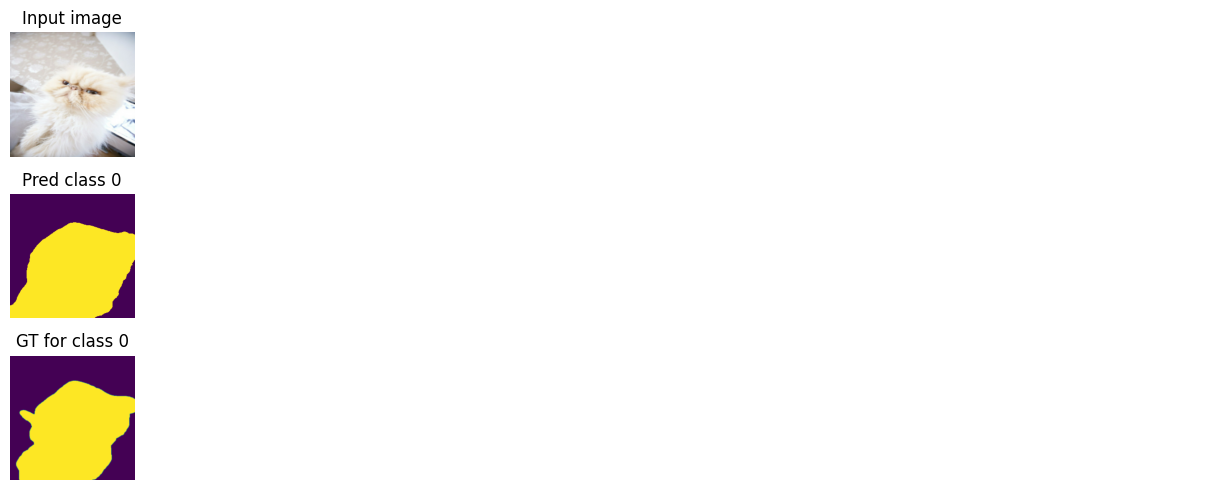

Train loss: 0.00676 | Time: 19m 4s | Val loss: 0.01403
Train_DICE_avg: 0.96060 | Train_Jaccard_avg: 0.92642 | Train_Sensitivity_avg: 0.97411 | Train_Specificity_avg: 0.96345 
Class 0 - Train_DICE: 0.96060 | Train_Jaccard: 0.92642 | Train_Sensitivity: 0.97411 | Train_Specificity: 0.96345 
Val_DICE_avg: 0.94056 | Val_Jaccard_avg: 0.89356 | Val_Sensitivity_avg: 0.96131 | Val_Specificity_avg: 0.94602 
Class 0 - Val_DICE: 0.94056 | Val_Jaccard: 0.89356 | Val_Sensitivity: 0.96131 | Val_Specificity: 0.94602 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00673 | Time: 19m 26s | Val loss: 0.01414
Train_DICE_avg: 0.95981 | Train_Jaccard_avg: 0.92576 | Train_Sensitivity_avg: 0.97427 | Train_Specificity_avg: 0.96321 
Class 0 - Train_DICE: 0.95981 | Train_Jaccard: 0.92576 | Train_Sensitivity: 0.97427 | Train_Specificity: 0.96321 
Val_DICE_avg: 0.94116 | Val_Jaccard_avg: 0.89478 | Val_Sensitivity_avg: 0.96120 | Val_Specificity_avg: 0.94787 
Class 0 - Val_DICE: 0.94116 | Val_Jaccard: 0.89478 | Val_Sensitivity: 0.96120 | Val_Specificity: 0.94787 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00664 | Time: 19m 49s | Val loss: 0.01418
Train_DICE_avg: 0.96116 | Train_Jaccard_avg: 0.92745 | Train_Sensitivity_avg: 0.97418 | Train_Specificity_avg: 0.96388 
Class 0 - Train_DICE: 0.96116 | Train_Jaccard: 0.92745 | Train_Sensitivity: 0.97418 | Train_Specificity: 0.96388 
Val_DICE_avg: 0.94214 | Val_Jaccard_avg: 0.89658 | Val_Sensitivity_avg: 0.95722 | Val_Specificity_avg: 0.95185 
Class 0 - Val_DICE: 0.94214 | Val_Jaccard: 0.89658 | Val_Sensitivity: 0.95722 | Val_Specificity: 0.95185 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00658 | Time: 20m 11s | Val loss: 0.01407
Train_DICE_avg: 0.96042 | Train_Jaccard_avg: 0.92686 | Train_Sensitivity_avg: 0.97394 | Train_Specificity_avg: 0.96310 
Class 0 - Train_DICE: 0.96042 | Train_Jaccard: 0.92686 | Train_Sensitivity: 0.97394 | Train_Specificity: 0.96310 
Val_DICE_avg: 0.94011 | Val_Jaccard_avg: 0.89291 | Val_Sensitivity_avg: 0.96381 | Val_Specificity_avg: 0.94549 
Class 0 - Val_DICE: 0.94011 | Val_Jaccard: 0.89291 | Val_Sensitivity: 0.96381 | Val_Specificity: 0.94549 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00657 | Time: 20m 34s | Val loss: 0.01431
Train_DICE_avg: 0.96031 | Train_Jaccard_avg: 0.92669 | Train_Sensitivity_avg: 0.97390 | Train_Specificity_avg: 0.96396 
Class 0 - Train_DICE: 0.96031 | Train_Jaccard: 0.92669 | Train_Sensitivity: 0.97390 | Train_Specificity: 0.96396 
Val_DICE_avg: 0.93949 | Val_Jaccard_avg: 0.89181 | Val_Sensitivity_avg: 0.96448 | Val_Specificity_avg: 0.94416 
Class 0 - Val_DICE: 0.93949 | Val_Jaccard: 0.89181 | Val_Sensitivity: 0.96448 | Val_Specificity: 0.94416 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

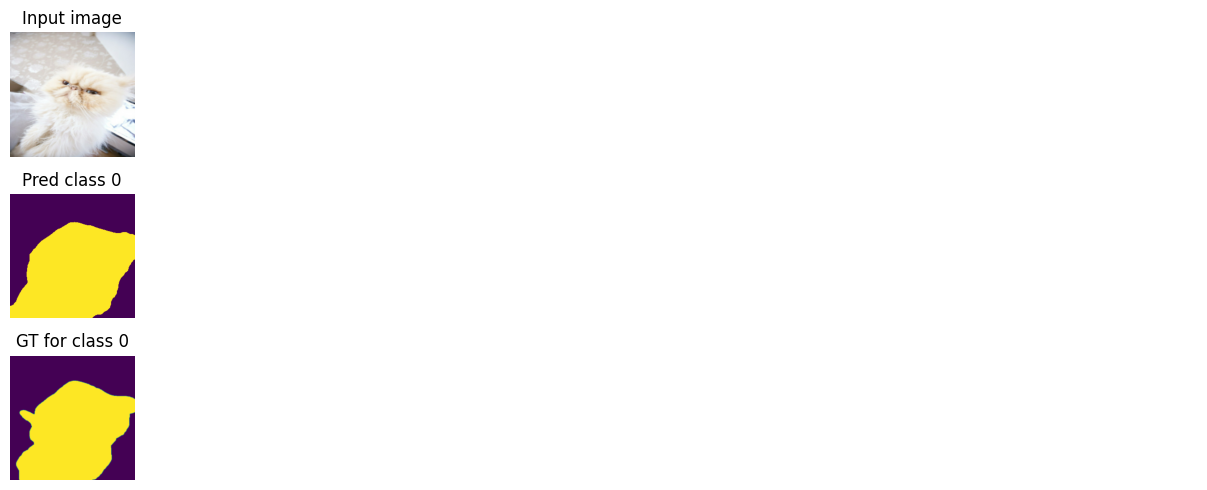

Train loss: 0.00655 | Time: 20m 57s | Val loss: 0.01426
Train_DICE_avg: 0.96268 | Train_Jaccard_avg: 0.92945 | Train_Sensitivity_avg: 0.97616 | Train_Specificity_avg: 0.96411 
Class 0 - Train_DICE: 0.96268 | Train_Jaccard: 0.92945 | Train_Sensitivity: 0.97616 | Train_Specificity: 0.96411 
Val_DICE_avg: 0.93947 | Val_Jaccard_avg: 0.89187 | Val_Sensitivity_avg: 0.96467 | Val_Specificity_avg: 0.94435 
Class 0 - Val_DICE: 0.93947 | Val_Jaccard: 0.89187 | Val_Sensitivity: 0.96467 | Val_Specificity: 0.94435 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00642 | Time: 21m 19s | Val loss: 0.01414
Train_DICE_avg: 0.96193 | Train_Jaccard_avg: 0.92883 | Train_Sensitivity_avg: 0.97542 | Train_Specificity_avg: 0.96333 
Class 0 - Train_DICE: 0.96193 | Train_Jaccard: 0.92883 | Train_Sensitivity: 0.97542 | Train_Specificity: 0.96333 
Val_DICE_avg: 0.93964 | Val_Jaccard_avg: 0.89210 | Val_Sensitivity_avg: 0.96469 | Val_Specificity_avg: 0.94422 
Class 0 - Val_DICE: 0.93964 | Val_Jaccard: 0.89210 | Val_Sensitivity: 0.96469 | Val_Specificity: 0.94422 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00648 | Time: 21m 42s | Val loss: 0.01444
Train_DICE_avg: 0.96278 | Train_Jaccard_avg: 0.92962 | Train_Sensitivity_avg: 0.97525 | Train_Specificity_avg: 0.96395 
Class 0 - Train_DICE: 0.96278 | Train_Jaccard: 0.92962 | Train_Sensitivity: 0.97525 | Train_Specificity: 0.96395 
Val_DICE_avg: 0.93897 | Val_Jaccard_avg: 0.89075 | Val_Sensitivity_avg: 0.96512 | Val_Specificity_avg: 0.94330 
Class 0 - Val_DICE: 0.93897 | Val_Jaccard: 0.89075 | Val_Sensitivity: 0.96512 | Val_Specificity: 0.94330 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00638 | Time: 22m 4s | Val loss: 0.01443
Train_DICE_avg: 0.96133 | Train_Jaccard_avg: 0.92852 | Train_Sensitivity_avg: 0.97431 | Train_Specificity_avg: 0.96428 
Class 0 - Train_DICE: 0.96133 | Train_Jaccard: 0.92852 | Train_Sensitivity: 0.97431 | Train_Specificity: 0.96428 
Val_DICE_avg: 0.93849 | Val_Jaccard_avg: 0.89016 | Val_Sensitivity_avg: 0.96683 | Val_Specificity_avg: 0.94205 
Class 0 - Val_DICE: 0.93849 | Val_Jaccard: 0.89016 | Val_Sensitivity: 0.96683 | Val_Specificity: 0.94205 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.00650 | Time: 22m 27s | Val loss: 0.01414
Train_DICE_avg: 0.96311 | Train_Jaccard_avg: 0.93020 | Train_Sensitivity_avg: 0.97623 | Train_Specificity_avg: 0.96458 
Class 0 - Train_DICE: 0.96311 | Train_Jaccard: 0.93020 | Train_Sensitivity: 0.97623 | Train_Specificity: 0.96458 
Val_DICE_avg: 0.94016 | Val_Jaccard_avg: 0.89286 | Val_Sensitivity_avg: 0.96558 | Val_Specificity_avg: 0.94420 
Class 0 - Val_DICE: 0.94016 | Val_Jaccard: 0.89286 | Val_Sensitivity: 0.96558 | Val_Specificity: 0.94420 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

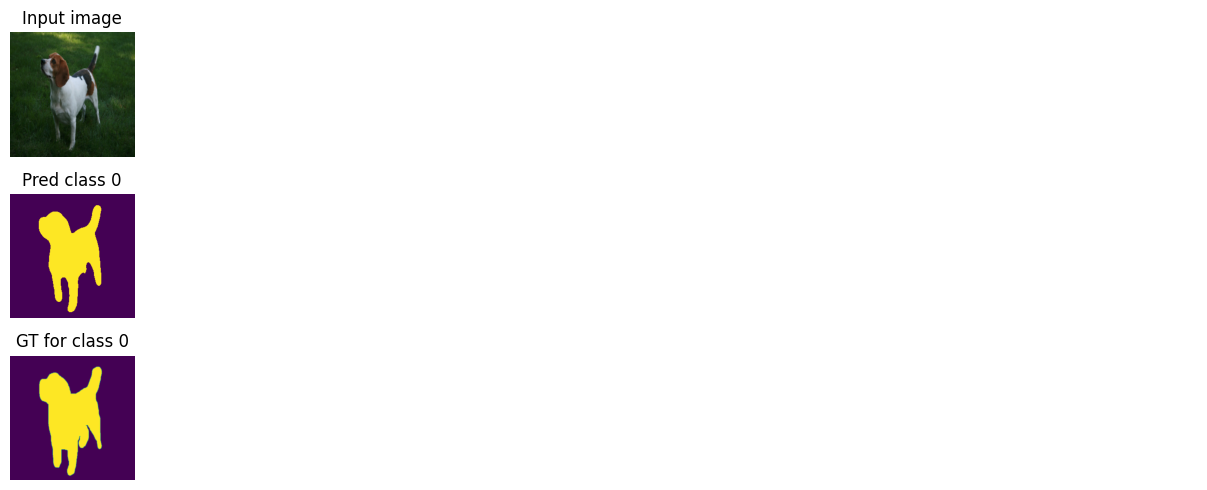

Train loss: 0.00639 | Time: 22m 50s | Val loss: 0.01425
Train_DICE_avg: 0.96302 | Train_Jaccard_avg: 0.93006 | Train_Sensitivity_avg: 0.97620 | Train_Specificity_avg: 0.96515 
Class 0 - Train_DICE: 0.96302 | Train_Jaccard: 0.93006 | Train_Sensitivity: 0.97620 | Train_Specificity: 0.96515 
Val_DICE_avg: 0.93937 | Val_Jaccard_avg: 0.89147 | Val_Sensitivity_avg: 0.96494 | Val_Specificity_avg: 0.94364 
Class 0 - Val_DICE: 0.93937 | Val_Jaccard: 0.89147 | Val_Sensitivity: 0.96494 | Val_Specificity: 0.94364 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [17]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]



Global Performance Metrics:
Loss mean: 0.01292, std: 0.00370
Dice Coefficient mean: 0.93878, std: 0.04678
Jaccard Index mean: 0.88795, std: 0.07562
Sensitivity mean: 0.97477, std: 0.04194
Specificity mean: 0.93296, std: 0.05986

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.93878, std: 0.04678
Jaccard mean: 0.88795, std: 0.07562
Sensitivity mean: 0.97477, std: 0.04194
Specificity mean: 0.93296, std: 0.05986


### Tversky Loss

In [19]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","OxfordIIITPet-UNet-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.73 GB
GPU Memory - Reserved: 1.45 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

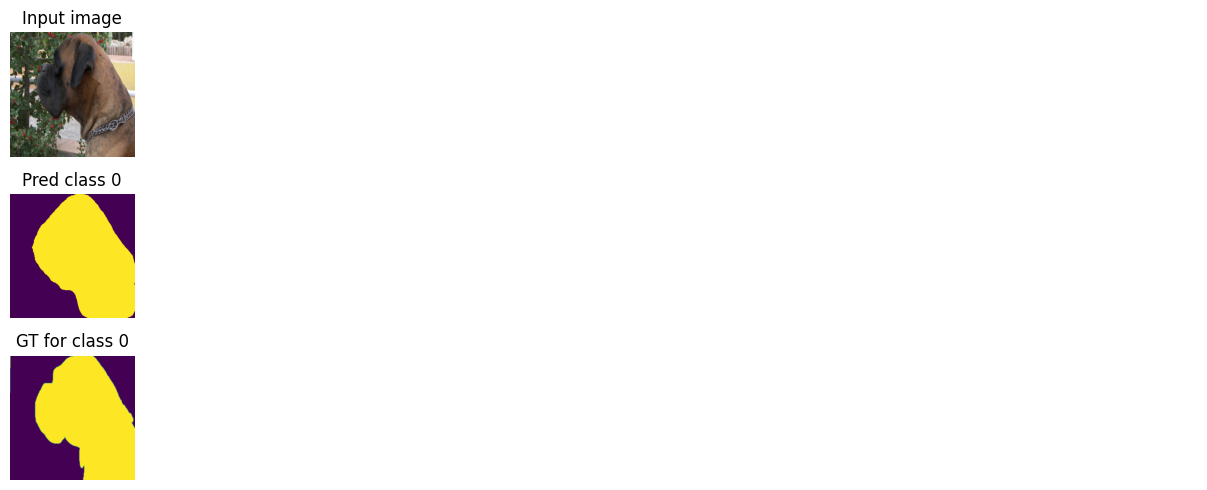

Train loss: 0.36213 | Time: 0m 22s | Val loss: 0.28716
Train_DICE_avg: 0.79270 | Train_Jaccard_avg: 0.67737 | Train_Sensitivity_avg: 0.73956 | Train_Specificity_avg: 0.88696 
Class 0 - Train_DICE: 0.79270 | Train_Jaccard: 0.67737 | Train_Sensitivity: 0.73956 | Train_Specificity: 0.88696 
Val_DICE_avg: 0.87566 | Val_Jaccard_avg: 0.78916 | Val_Sensitivity_avg: 0.87442 | Val_Specificity_avg: 0.91196 
Class 0 - Val_DICE: 0.87566 | Val_Jaccard: 0.78916 | Val_Sensitivity: 0.87442 | Val_Specificity: 0.91196 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.25837 | Time: 0m 44s | Val loss: 0.22844
Train_DICE_avg: 0.88509 | Train_Jaccard_avg: 0.80336 | Train_Sensitivity_avg: 0.85499 | Train_Specificity_avg: 0.93817 
Class 0 - Train_DICE: 0.88509 | Train_Jaccard: 0.80336 | Train_Sensitivity: 0.85499 | Train_Specificity: 0.93817 
Val_DICE_avg: 0.91097 | Val_Jaccard_avg: 0.84434 | Val_Sensitivity_avg: 0.91710 | Val_Specificity_avg: 0.93202 
Class 0 - Val_DICE: 0.91097 | Val_Jaccard: 0.84434 | Val_Sensitivity: 0.91710 | Val_Specificity: 0.93202 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.23751 | Time: 1m 6s | Val loss: 0.21933
Train_DICE_avg: 0.90423 | Train_Jaccard_avg: 0.83347 | Train_Sensitivity_avg: 0.88042 | Train_Specificity_avg: 0.94717 
Class 0 - Train_DICE: 0.90423 | Train_Jaccard: 0.83347 | Train_Sensitivity: 0.88042 | Train_Specificity: 0.94717 
Val_DICE_avg: 0.92088 | Val_Jaccard_avg: 0.86114 | Val_Sensitivity_avg: 0.90525 | Val_Specificity_avg: 0.95565 
Class 0 - Val_DICE: 0.92088 | Val_Jaccard: 0.86114 | Val_Sensitivity: 0.90525 | Val_Specificity: 0.95565 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.22268 | Time: 1m 28s | Val loss: 0.20785
Train_DICE_avg: 0.91482 | Train_Jaccard_avg: 0.85039 | Train_Sensitivity_avg: 0.89475 | Train_Specificity_avg: 0.95077 
Class 0 - Train_DICE: 0.91482 | Train_Jaccard: 0.85039 | Train_Sensitivity: 0.89475 | Train_Specificity: 0.95077 
Val_DICE_avg: 0.92528 | Val_Jaccard_avg: 0.86855 | Val_Sensitivity_avg: 0.90861 | Val_Specificity_avg: 0.96060 
Class 0 - Val_DICE: 0.92528 | Val_Jaccard: 0.86855 | Val_Sensitivity: 0.90861 | Val_Specificity: 0.96060 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.21167 | Time: 1m 50s | Val loss: 0.19863
Train_DICE_avg: 0.91907 | Train_Jaccard_avg: 0.85691 | Train_Sensitivity_avg: 0.90219 | Train_Specificity_avg: 0.95300 
Class 0 - Train_DICE: 0.91907 | Train_Jaccard: 0.85691 | Train_Sensitivity: 0.90219 | Train_Specificity: 0.95300 
Val_DICE_avg: 0.92966 | Val_Jaccard_avg: 0.87513 | Val_Sensitivity_avg: 0.92089 | Val_Specificity_avg: 0.95969 
Class 0 - Val_DICE: 0.92966 | Val_Jaccard: 0.87513 | Val_Sensitivity: 0.92089 | Val_Specificity: 0.95969 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

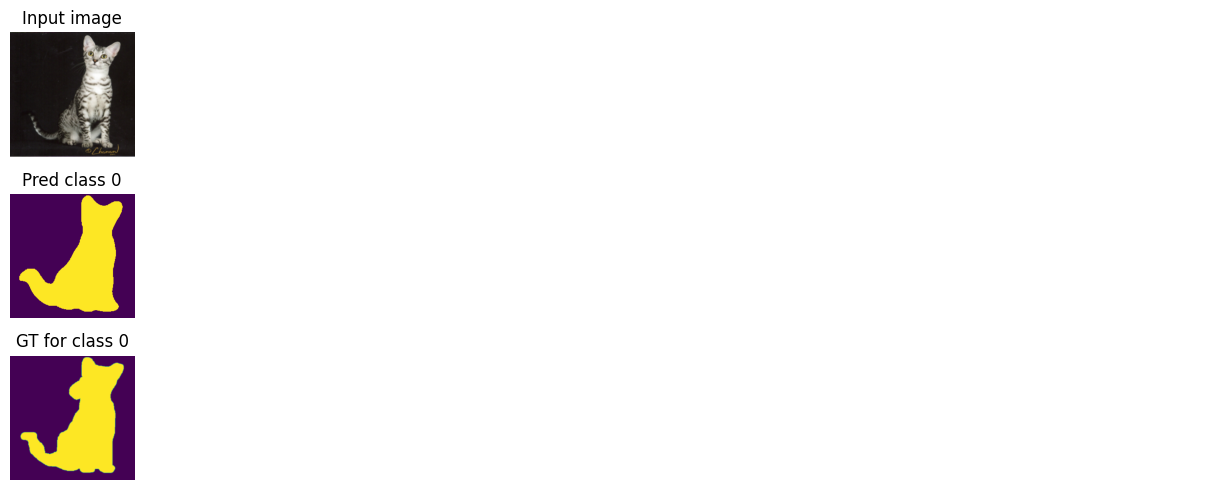

Train loss: 0.20155 | Time: 2m 12s | Val loss: 0.19004
Train_DICE_avg: 0.92401 | Train_Jaccard_avg: 0.86483 | Train_Sensitivity_avg: 0.91042 | Train_Specificity_avg: 0.95157 
Class 0 - Train_DICE: 0.92401 | Train_Jaccard: 0.86483 | Train_Sensitivity: 0.91042 | Train_Specificity: 0.95157 
Val_DICE_avg: 0.93308 | Val_Jaccard_avg: 0.88077 | Val_Sensitivity_avg: 0.93178 | Val_Specificity_avg: 0.95577 
Class 0 - Val_DICE: 0.93308 | Val_Jaccard: 0.88077 | Val_Sensitivity: 0.93178 | Val_Specificity: 0.95577 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.19099 | Time: 2m 34s | Val loss: 0.17937
Train_DICE_avg: 0.92873 | Train_Jaccard_avg: 0.87255 | Train_Sensitivity_avg: 0.91702 | Train_Specificity_avg: 0.95274 
Class 0 - Train_DICE: 0.92873 | Train_Jaccard: 0.87255 | Train_Sensitivity: 0.91702 | Train_Specificity: 0.95274 
Val_DICE_avg: 0.93376 | Val_Jaccard_avg: 0.88225 | Val_Sensitivity_avg: 0.93407 | Val_Specificity_avg: 0.95561 
Class 0 - Val_DICE: 0.93376 | Val_Jaccard: 0.88225 | Val_Sensitivity: 0.93407 | Val_Specificity: 0.95561 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.18202 | Time: 2m 57s | Val loss: 0.16946
Train_DICE_avg: 0.93180 | Train_Jaccard_avg: 0.87754 | Train_Sensitivity_avg: 0.92266 | Train_Specificity_avg: 0.95351 
Class 0 - Train_DICE: 0.93180 | Train_Jaccard: 0.87754 | Train_Sensitivity: 0.92266 | Train_Specificity: 0.95351 
Val_DICE_avg: 0.93512 | Val_Jaccard_avg: 0.88434 | Val_Sensitivity_avg: 0.93149 | Val_Specificity_avg: 0.95936 
Class 0 - Val_DICE: 0.93512 | Val_Jaccard: 0.88434 | Val_Sensitivity: 0.93149 | Val_Specificity: 0.95936 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.17506 | Time: 3m 18s | Val loss: 0.16686
Train_DICE_avg: 0.93192 | Train_Jaccard_avg: 0.87798 | Train_Sensitivity_avg: 0.92505 | Train_Specificity_avg: 0.95233 
Class 0 - Train_DICE: 0.93192 | Train_Jaccard: 0.87798 | Train_Sensitivity: 0.92505 | Train_Specificity: 0.95233 
Val_DICE_avg: 0.93372 | Val_Jaccard_avg: 0.88207 | Val_Sensitivity_avg: 0.93482 | Val_Specificity_avg: 0.95580 
Class 0 - Val_DICE: 0.93372 | Val_Jaccard: 0.88207 | Val_Sensitivity: 0.93482 | Val_Specificity: 0.95580 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.16830 | Time: 3m 40s | Val loss: 0.15885
Train_DICE_avg: 0.93313 | Train_Jaccard_avg: 0.87982 | Train_Sensitivity_avg: 0.92806 | Train_Specificity_avg: 0.95141 
Class 0 - Train_DICE: 0.93313 | Train_Jaccard: 0.87982 | Train_Sensitivity: 0.92806 | Train_Specificity: 0.95141 
Val_DICE_avg: 0.93396 | Val_Jaccard_avg: 0.88301 | Val_Sensitivity_avg: 0.94840 | Val_Specificity_avg: 0.94985 
Class 0 - Val_DICE: 0.93396 | Val_Jaccard: 0.88301 | Val_Sensitivity: 0.94840 | Val_Specificity: 0.94985 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

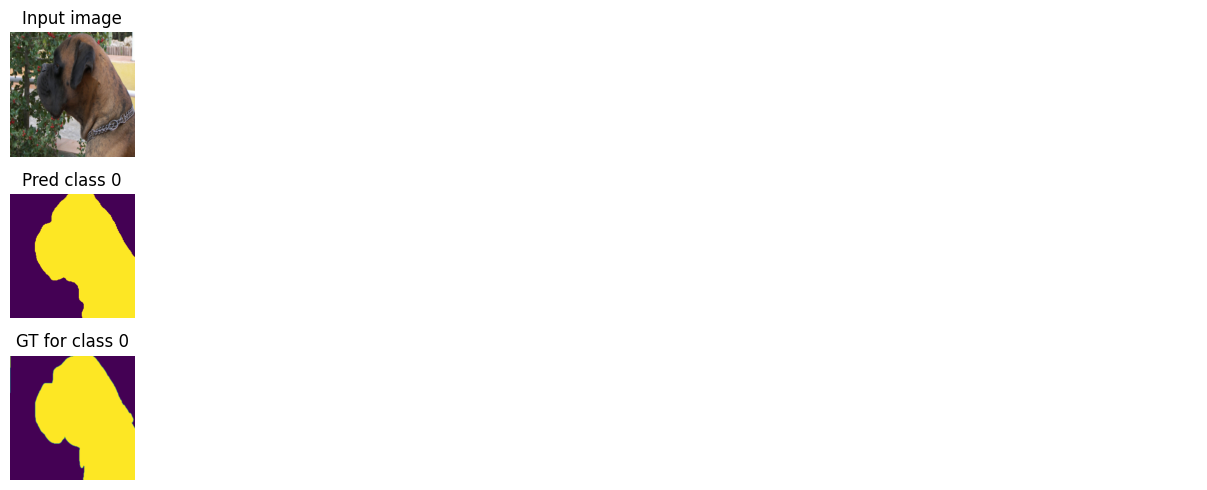

Train loss: 0.16064 | Time: 4m 3s | Val loss: 0.14450
Train_DICE_avg: 0.93466 | Train_Jaccard_avg: 0.88225 | Train_Sensitivity_avg: 0.93192 | Train_Specificity_avg: 0.95064 
Class 0 - Train_DICE: 0.93466 | Train_Jaccard: 0.88225 | Train_Sensitivity: 0.93192 | Train_Specificity: 0.95064 
Val_DICE_avg: 0.93382 | Val_Jaccard_avg: 0.88310 | Val_Sensitivity_avg: 0.94749 | Val_Specificity_avg: 0.94836 
Class 0 - Val_DICE: 0.93382 | Val_Jaccard: 0.88310 | Val_Sensitivity: 0.94749 | Val_Specificity: 0.94836 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15241 | Time: 4m 25s | Val loss: 0.14656
Train_DICE_avg: 0.93702 | Train_Jaccard_avg: 0.88626 | Train_Sensitivity_avg: 0.93576 | Train_Specificity_avg: 0.95117 
Class 0 - Train_DICE: 0.93702 | Train_Jaccard: 0.88626 | Train_Sensitivity: 0.93576 | Train_Specificity: 0.95117 
Val_DICE_avg: 0.93451 | Val_Jaccard_avg: 0.88425 | Val_Sensitivity_avg: 0.94574 | Val_Specificity_avg: 0.95354 
Class 0 - Val_DICE: 0.93451 | Val_Jaccard: 0.88425 | Val_Sensitivity: 0.94574 | Val_Specificity: 0.95354 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14724 | Time: 4m 47s | Val loss: 0.13314
Train_DICE_avg: 0.93633 | Train_Jaccard_avg: 0.88509 | Train_Sensitivity_avg: 0.93771 | Train_Specificity_avg: 0.95091 
Class 0 - Train_DICE: 0.93633 | Train_Jaccard: 0.88509 | Train_Sensitivity: 0.93771 | Train_Specificity: 0.95091 
Val_DICE_avg: 0.93122 | Val_Jaccard_avg: 0.87888 | Val_Sensitivity_avg: 0.95881 | Val_Specificity_avg: 0.93832 
Class 0 - Val_DICE: 0.93122 | Val_Jaccard: 0.87888 | Val_Sensitivity: 0.95881 | Val_Specificity: 0.93832 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13946 | Time: 5m 10s | Val loss: 0.13702
Train_DICE_avg: 0.93927 | Train_Jaccard_avg: 0.89010 | Train_Sensitivity_avg: 0.94226 | Train_Specificity_avg: 0.95043 
Class 0 - Train_DICE: 0.93927 | Train_Jaccard: 0.89010 | Train_Sensitivity: 0.94226 | Train_Specificity: 0.95043 
Val_DICE_avg: 0.93631 | Val_Jaccard_avg: 0.88655 | Val_Sensitivity_avg: 0.94668 | Val_Specificity_avg: 0.95347 
Class 0 - Val_DICE: 0.93631 | Val_Jaccard: 0.88655 | Val_Sensitivity: 0.94668 | Val_Specificity: 0.95347 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13280 | Time: 5m 32s | Val loss: 0.13181
Train_DICE_avg: 0.94065 | Train_Jaccard_avg: 0.89217 | Train_Sensitivity_avg: 0.94275 | Train_Specificity_avg: 0.95137 
Class 0 - Train_DICE: 0.94065 | Train_Jaccard: 0.89217 | Train_Sensitivity: 0.94275 | Train_Specificity: 0.95137 
Val_DICE_avg: 0.93671 | Val_Jaccard_avg: 0.88717 | Val_Sensitivity_avg: 0.95100 | Val_Specificity_avg: 0.94992 
Class 0 - Val_DICE: 0.93671 | Val_Jaccard: 0.88717 | Val_Sensitivity: 0.95100 | Val_Specificity: 0.94992 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

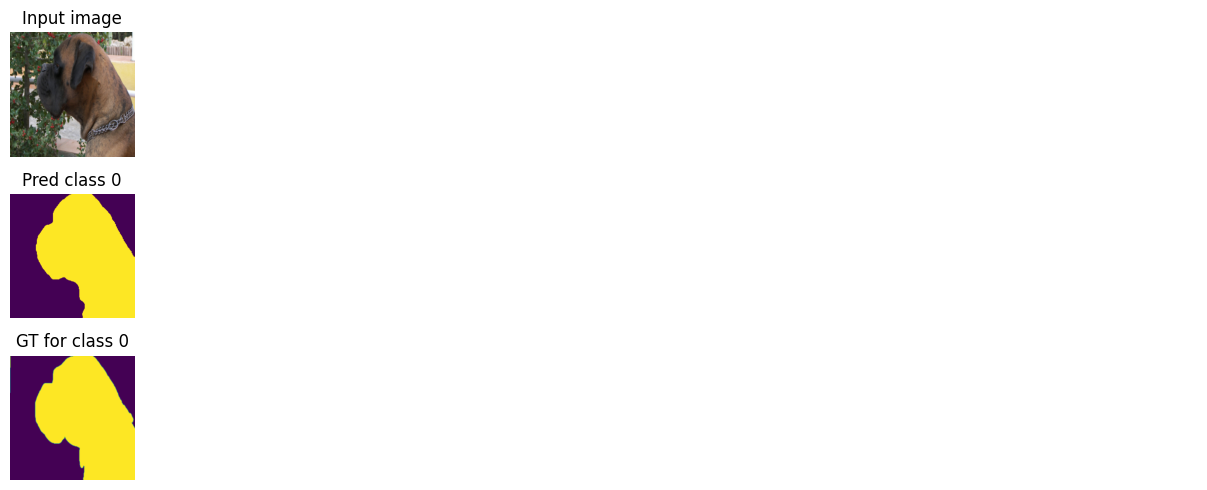

Train loss: 0.12714 | Time: 5m 55s | Val loss: 0.12269
Train_DICE_avg: 0.94155 | Train_Jaccard_avg: 0.89381 | Train_Sensitivity_avg: 0.94517 | Train_Specificity_avg: 0.95057 
Class 0 - Train_DICE: 0.94155 | Train_Jaccard: 0.89381 | Train_Sensitivity: 0.94517 | Train_Specificity: 0.95057 
Val_DICE_avg: 0.93720 | Val_Jaccard_avg: 0.88774 | Val_Sensitivity_avg: 0.95606 | Val_Specificity_avg: 0.94860 
Class 0 - Val_DICE: 0.93720 | Val_Jaccard: 0.88774 | Val_Sensitivity: 0.95606 | Val_Specificity: 0.94860 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.12134 | Time: 6m 17s | Val loss: 0.11376
Train_DICE_avg: 0.94296 | Train_Jaccard_avg: 0.89623 | Train_Sensitivity_avg: 0.94867 | Train_Specificity_avg: 0.95046 
Class 0 - Train_DICE: 0.94296 | Train_Jaccard: 0.89623 | Train_Sensitivity: 0.94867 | Train_Specificity: 0.95046 
Val_DICE_avg: 0.93765 | Val_Jaccard_avg: 0.88887 | Val_Sensitivity_avg: 0.95661 | Val_Specificity_avg: 0.94913 
Class 0 - Val_DICE: 0.93765 | Val_Jaccard: 0.88887 | Val_Sensitivity: 0.95661 | Val_Specificity: 0.94913 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11749 | Time: 6m 40s | Val loss: 0.11683
Train_DICE_avg: 0.94267 | Train_Jaccard_avg: 0.89581 | Train_Sensitivity_avg: 0.94808 | Train_Specificity_avg: 0.95175 
Class 0 - Train_DICE: 0.94267 | Train_Jaccard: 0.89581 | Train_Sensitivity: 0.94808 | Train_Specificity: 0.95175 
Val_DICE_avg: 0.93791 | Val_Jaccard_avg: 0.88925 | Val_Sensitivity_avg: 0.95694 | Val_Specificity_avg: 0.94898 
Class 0 - Val_DICE: 0.93791 | Val_Jaccard: 0.88925 | Val_Sensitivity: 0.95694 | Val_Specificity: 0.94898 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11342 | Time: 7m 2s | Val loss: 0.11050
Train_DICE_avg: 0.94263 | Train_Jaccard_avg: 0.89582 | Train_Sensitivity_avg: 0.95159 | Train_Specificity_avg: 0.94939 
Class 0 - Train_DICE: 0.94263 | Train_Jaccard: 0.89582 | Train_Sensitivity: 0.95159 | Train_Specificity: 0.94939 
Val_DICE_avg: 0.92629 | Val_Jaccard_avg: 0.87090 | Val_Sensitivity_avg: 0.96836 | Val_Specificity_avg: 0.93048 
Class 0 - Val_DICE: 0.92629 | Val_Jaccard: 0.87090 | Val_Sensitivity: 0.96836 | Val_Specificity: 0.93048 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10924 | Time: 7m 24s | Val loss: 0.10578
Train_DICE_avg: 0.94360 | Train_Jaccard_avg: 0.89721 | Train_Sensitivity_avg: 0.95091 | Train_Specificity_avg: 0.95058 
Class 0 - Train_DICE: 0.94360 | Train_Jaccard: 0.89721 | Train_Sensitivity: 0.95091 | Train_Specificity: 0.95058 
Val_DICE_avg: 0.93494 | Val_Jaccard_avg: 0.88511 | Val_Sensitivity_avg: 0.95810 | Val_Specificity_avg: 0.94626 
Class 0 - Val_DICE: 0.93494 | Val_Jaccard: 0.88511 | Val_Sensitivity: 0.95810 | Val_Specificity: 0.94626 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

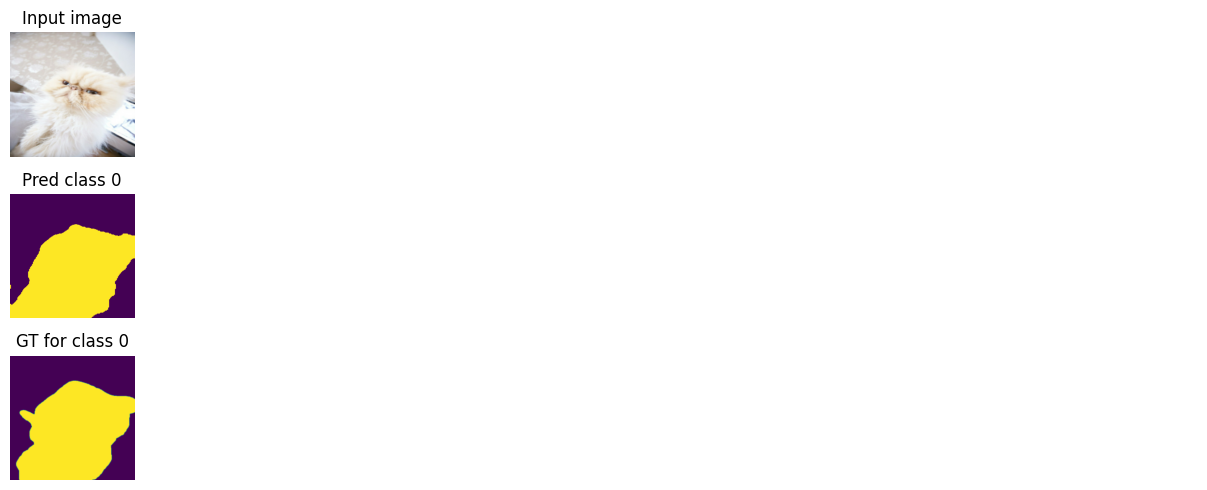

Train loss: 0.10576 | Time: 7m 47s | Val loss: 0.10500
Train_DICE_avg: 0.94241 | Train_Jaccard_avg: 0.89540 | Train_Sensitivity_avg: 0.95224 | Train_Specificity_avg: 0.94865 
Class 0 - Train_DICE: 0.94241 | Train_Jaccard: 0.89540 | Train_Sensitivity: 0.95224 | Train_Specificity: 0.94865 
Val_DICE_avg: 0.93714 | Val_Jaccard_avg: 0.88809 | Val_Sensitivity_avg: 0.95491 | Val_Specificity_avg: 0.94846 
Class 0 - Val_DICE: 0.93714 | Val_Jaccard: 0.88809 | Val_Sensitivity: 0.95491 | Val_Specificity: 0.94846 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10027 | Time: 8m 9s | Val loss: 0.10076
Train_DICE_avg: 0.94475 | Train_Jaccard_avg: 0.89923 | Train_Sensitivity_avg: 0.95392 | Train_Specificity_avg: 0.94888 
Class 0 - Train_DICE: 0.94475 | Train_Jaccard: 0.89923 | Train_Sensitivity: 0.95392 | Train_Specificity: 0.94888 
Val_DICE_avg: 0.93530 | Val_Jaccard_avg: 0.88516 | Val_Sensitivity_avg: 0.95455 | Val_Specificity_avg: 0.94935 
Class 0 - Val_DICE: 0.93530 | Val_Jaccard: 0.88516 | Val_Sensitivity: 0.95455 | Val_Specificity: 0.94935 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09665 | Time: 8m 32s | Val loss: 0.09569
Train_DICE_avg: 0.94438 | Train_Jaccard_avg: 0.89886 | Train_Sensitivity_avg: 0.95618 | Train_Specificity_avg: 0.94948 
Class 0 - Train_DICE: 0.94438 | Train_Jaccard: 0.89886 | Train_Sensitivity: 0.95618 | Train_Specificity: 0.94948 
Val_DICE_avg: 0.93582 | Val_Jaccard_avg: 0.88581 | Val_Sensitivity_avg: 0.95360 | Val_Specificity_avg: 0.94916 
Class 0 - Val_DICE: 0.93582 | Val_Jaccard: 0.88581 | Val_Sensitivity: 0.95360 | Val_Specificity: 0.94916 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09282 | Time: 8m 54s | Val loss: 0.08912
Train_DICE_avg: 0.94499 | Train_Jaccard_avg: 0.90003 | Train_Sensitivity_avg: 0.95562 | Train_Specificity_avg: 0.94989 
Class 0 - Train_DICE: 0.94499 | Train_Jaccard: 0.90003 | Train_Sensitivity: 0.95562 | Train_Specificity: 0.94989 
Val_DICE_avg: 0.93495 | Val_Jaccard_avg: 0.88407 | Val_Sensitivity_avg: 0.96095 | Val_Specificity_avg: 0.94162 
Class 0 - Val_DICE: 0.93495 | Val_Jaccard: 0.88407 | Val_Sensitivity: 0.96095 | Val_Specificity: 0.94162 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08816 | Time: 9m 17s | Val loss: 0.09196
Train_DICE_avg: 0.94678 | Train_Jaccard_avg: 0.90281 | Train_Sensitivity_avg: 0.95894 | Train_Specificity_avg: 0.94876 
Class 0 - Train_DICE: 0.94678 | Train_Jaccard: 0.90281 | Train_Sensitivity: 0.95894 | Train_Specificity: 0.94876 
Val_DICE_avg: 0.93402 | Val_Jaccard_avg: 0.88275 | Val_Sensitivity_avg: 0.96388 | Val_Specificity_avg: 0.93997 
Class 0 - Val_DICE: 0.93402 | Val_Jaccard: 0.88275 | Val_Sensitivity: 0.96388 | Val_Specificity: 0.93997 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

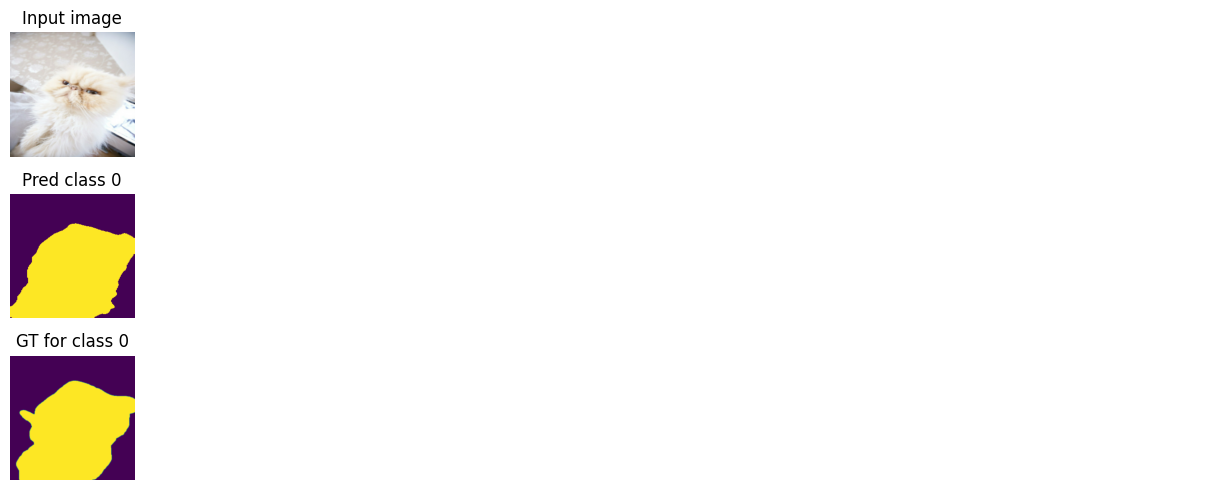

Train loss: 0.08390 | Time: 9m 39s | Val loss: 0.09059
Train_DICE_avg: 0.94811 | Train_Jaccard_avg: 0.90509 | Train_Sensitivity_avg: 0.96093 | Train_Specificity_avg: 0.95096 
Class 0 - Train_DICE: 0.94811 | Train_Jaccard: 0.90509 | Train_Sensitivity: 0.96093 | Train_Specificity: 0.95096 
Val_DICE_avg: 0.93471 | Val_Jaccard_avg: 0.88465 | Val_Sensitivity_avg: 0.95848 | Val_Specificity_avg: 0.94658 
Class 0 - Val_DICE: 0.93471 | Val_Jaccard: 0.88465 | Val_Sensitivity: 0.95848 | Val_Specificity: 0.94658 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08151 | Time: 10m 2s | Val loss: 0.08516
Train_DICE_avg: 0.94791 | Train_Jaccard_avg: 0.90466 | Train_Sensitivity_avg: 0.96167 | Train_Specificity_avg: 0.94995 
Class 0 - Train_DICE: 0.94791 | Train_Jaccard: 0.90466 | Train_Sensitivity: 0.96167 | Train_Specificity: 0.94995 
Val_DICE_avg: 0.93610 | Val_Jaccard_avg: 0.88613 | Val_Sensitivity_avg: 0.96032 | Val_Specificity_avg: 0.94206 
Class 0 - Val_DICE: 0.93610 | Val_Jaccard: 0.88613 | Val_Sensitivity: 0.96032 | Val_Specificity: 0.94206 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07820 | Time: 10m 24s | Val loss: 0.08140
Train_DICE_avg: 0.94873 | Train_Jaccard_avg: 0.90599 | Train_Sensitivity_avg: 0.96298 | Train_Specificity_avg: 0.95062 
Class 0 - Train_DICE: 0.94873 | Train_Jaccard: 0.90599 | Train_Sensitivity: 0.96298 | Train_Specificity: 0.95062 
Val_DICE_avg: 0.93789 | Val_Jaccard_avg: 0.88938 | Val_Sensitivity_avg: 0.95804 | Val_Specificity_avg: 0.94808 
Class 0 - Val_DICE: 0.93789 | Val_Jaccard: 0.88938 | Val_Sensitivity: 0.95804 | Val_Specificity: 0.94808 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07565 | Time: 10m 47s | Val loss: 0.08246
Train_DICE_avg: 0.94896 | Train_Jaccard_avg: 0.90649 | Train_Sensitivity_avg: 0.96418 | Train_Specificity_avg: 0.95050 
Class 0 - Train_DICE: 0.94896 | Train_Jaccard: 0.90649 | Train_Sensitivity: 0.96418 | Train_Specificity: 0.95050 
Val_DICE_avg: 0.93687 | Val_Jaccard_avg: 0.88720 | Val_Sensitivity_avg: 0.95632 | Val_Specificity_avg: 0.94658 
Class 0 - Val_DICE: 0.93687 | Val_Jaccard: 0.88720 | Val_Sensitivity: 0.95632 | Val_Specificity: 0.94658 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07266 | Time: 11m 9s | Val loss: 0.07850
Train_DICE_avg: 0.95017 | Train_Jaccard_avg: 0.90848 | Train_Sensitivity_avg: 0.96537 | Train_Specificity_avg: 0.94915 
Class 0 - Train_DICE: 0.95017 | Train_Jaccard: 0.90848 | Train_Sensitivity: 0.96537 | Train_Specificity: 0.94915 
Val_DICE_avg: 0.94094 | Val_Jaccard_avg: 0.89454 | Val_Sensitivity_avg: 0.94914 | Val_Specificity_avg: 0.95586 
Class 0 - Val_DICE: 0.94094 | Val_Jaccard: 0.89454 | Val_Sensitivity: 0.94914 | Val_Specificity: 0.95586 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

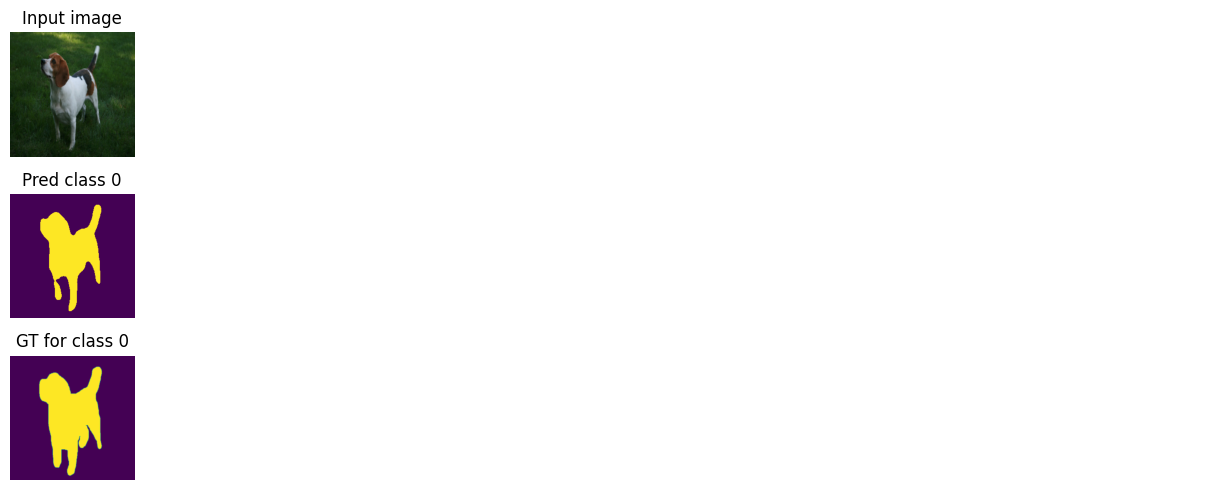

Train loss: 0.07201 | Time: 11m 32s | Val loss: 0.07907
Train_DICE_avg: 0.94836 | Train_Jaccard_avg: 0.90547 | Train_Sensitivity_avg: 0.96465 | Train_Specificity_avg: 0.94797 
Class 0 - Train_DICE: 0.94836 | Train_Jaccard: 0.90547 | Train_Sensitivity: 0.96465 | Train_Specificity: 0.94797 
Val_DICE_avg: 0.93791 | Val_Jaccard_avg: 0.88925 | Val_Sensitivity_avg: 0.95819 | Val_Specificity_avg: 0.94958 
Class 0 - Val_DICE: 0.93791 | Val_Jaccard: 0.88925 | Val_Sensitivity: 0.95819 | Val_Specificity: 0.94958 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06878 | Time: 11m 55s | Val loss: 0.07222
Train_DICE_avg: 0.94939 | Train_Jaccard_avg: 0.90722 | Train_Sensitivity_avg: 0.96583 | Train_Specificity_avg: 0.94909 
Class 0 - Train_DICE: 0.94939 | Train_Jaccard: 0.90722 | Train_Sensitivity: 0.96583 | Train_Specificity: 0.94909 
Val_DICE_avg: 0.93969 | Val_Jaccard_avg: 0.89191 | Val_Sensitivity_avg: 0.96059 | Val_Specificity_avg: 0.94673 
Class 0 - Val_DICE: 0.93969 | Val_Jaccard: 0.89191 | Val_Sensitivity: 0.96059 | Val_Specificity: 0.94673 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06515 | Time: 12m 17s | Val loss: 0.07138
Train_DICE_avg: 0.95093 | Train_Jaccard_avg: 0.90991 | Train_Sensitivity_avg: 0.96804 | Train_Specificity_avg: 0.95077 
Class 0 - Train_DICE: 0.95093 | Train_Jaccard: 0.90991 | Train_Sensitivity: 0.96804 | Train_Specificity: 0.95077 
Val_DICE_avg: 0.93749 | Val_Jaccard_avg: 0.88845 | Val_Sensitivity_avg: 0.96358 | Val_Specificity_avg: 0.94270 
Class 0 - Val_DICE: 0.93749 | Val_Jaccard: 0.88845 | Val_Sensitivity: 0.96358 | Val_Specificity: 0.94270 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06345 | Time: 12m 39s | Val loss: 0.07149
Train_DICE_avg: 0.95120 | Train_Jaccard_avg: 0.91042 | Train_Sensitivity_avg: 0.96822 | Train_Specificity_avg: 0.95098 
Class 0 - Train_DICE: 0.95120 | Train_Jaccard: 0.91042 | Train_Sensitivity: 0.96822 | Train_Specificity: 0.95098 
Val_DICE_avg: 0.93883 | Val_Jaccard_avg: 0.89076 | Val_Sensitivity_avg: 0.95981 | Val_Specificity_avg: 0.94820 
Class 0 - Val_DICE: 0.93883 | Val_Jaccard: 0.89076 | Val_Sensitivity: 0.95981 | Val_Specificity: 0.94820 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06160 | Time: 13m 2s | Val loss: 0.06804
Train_DICE_avg: 0.95146 | Train_Jaccard_avg: 0.91084 | Train_Sensitivity_avg: 0.96941 | Train_Specificity_avg: 0.95014 
Class 0 - Train_DICE: 0.95146 | Train_Jaccard: 0.91084 | Train_Sensitivity: 0.96941 | Train_Specificity: 0.95014 
Val_DICE_avg: 0.93404 | Val_Jaccard_avg: 0.88245 | Val_Sensitivity_avg: 0.96866 | Val_Specificity_avg: 0.93520 
Class 0 - Val_DICE: 0.93404 | Val_Jaccard: 0.88245 | Val_Sensitivity: 0.96866 | Val_Specificity: 0.93520 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

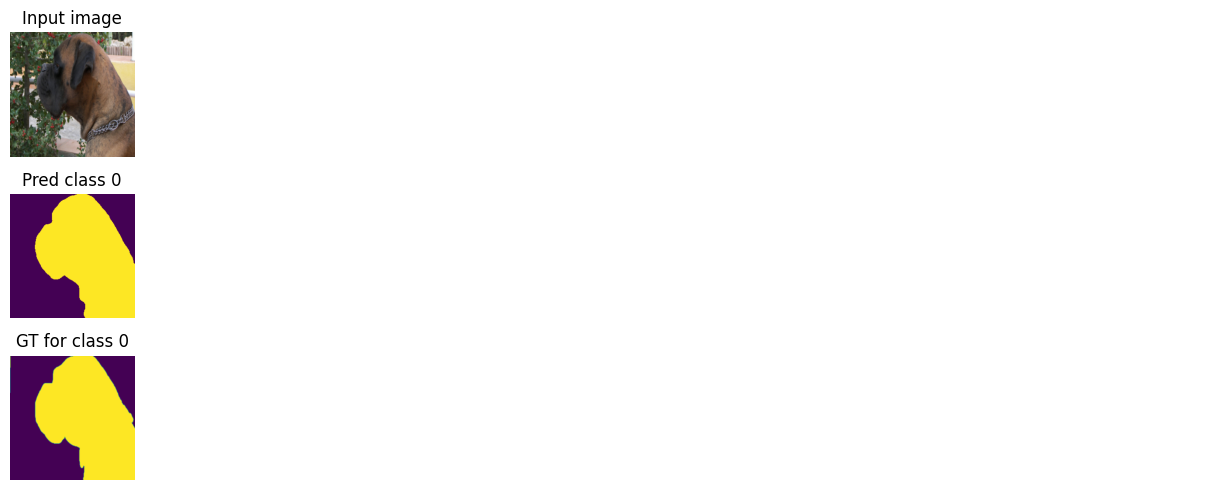

Train loss: 0.06004 | Time: 13m 24s | Val loss: 0.06701
Train_DICE_avg: 0.95209 | Train_Jaccard_avg: 0.91211 | Train_Sensitivity_avg: 0.96930 | Train_Specificity_avg: 0.95236 
Class 0 - Train_DICE: 0.95209 | Train_Jaccard: 0.91211 | Train_Sensitivity: 0.96930 | Train_Specificity: 0.95236 
Val_DICE_avg: 0.93791 | Val_Jaccard_avg: 0.88899 | Val_Sensitivity_avg: 0.96284 | Val_Specificity_avg: 0.94337 
Class 0 - Val_DICE: 0.93791 | Val_Jaccard: 0.88899 | Val_Sensitivity: 0.96284 | Val_Specificity: 0.94337 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05848 | Time: 13m 47s | Val loss: 0.06734
Train_DICE_avg: 0.95240 | Train_Jaccard_avg: 0.91247 | Train_Sensitivity_avg: 0.96991 | Train_Specificity_avg: 0.95121 
Class 0 - Train_DICE: 0.95240 | Train_Jaccard: 0.91247 | Train_Sensitivity: 0.96991 | Train_Specificity: 0.95121 
Val_DICE_avg: 0.93588 | Val_Jaccard_avg: 0.88573 | Val_Sensitivity_avg: 0.96722 | Val_Specificity_avg: 0.93900 
Class 0 - Val_DICE: 0.93588 | Val_Jaccard: 0.88573 | Val_Sensitivity: 0.96722 | Val_Specificity: 0.93900 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05643 | Time: 14m 9s | Val loss: 0.06607
Train_DICE_avg: 0.95362 | Train_Jaccard_avg: 0.91490 | Train_Sensitivity_avg: 0.97155 | Train_Specificity_avg: 0.95225 
Class 0 - Train_DICE: 0.95362 | Train_Jaccard: 0.91490 | Train_Sensitivity: 0.97155 | Train_Specificity: 0.95225 
Val_DICE_avg: 0.93524 | Val_Jaccard_avg: 0.88457 | Val_Sensitivity_avg: 0.96727 | Val_Specificity_avg: 0.93671 
Class 0 - Val_DICE: 0.93524 | Val_Jaccard: 0.88457 | Val_Sensitivity: 0.96727 | Val_Specificity: 0.93671 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05578 | Time: 14m 32s | Val loss: 0.06618
Train_DICE_avg: 0.95340 | Train_Jaccard_avg: 0.91423 | Train_Sensitivity_avg: 0.97094 | Train_Specificity_avg: 0.95131 
Class 0 - Train_DICE: 0.95340 | Train_Jaccard: 0.91423 | Train_Sensitivity: 0.97094 | Train_Specificity: 0.95131 
Val_DICE_avg: 0.93984 | Val_Jaccard_avg: 0.89245 | Val_Sensitivity_avg: 0.96167 | Val_Specificity_avg: 0.94550 
Class 0 - Val_DICE: 0.93984 | Val_Jaccard: 0.89245 | Val_Sensitivity: 0.96167 | Val_Specificity: 0.94550 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05384 | Time: 14m 54s | Val loss: 0.06520
Train_DICE_avg: 0.95449 | Train_Jaccard_avg: 0.91626 | Train_Sensitivity_avg: 0.97278 | Train_Specificity_avg: 0.95223 
Class 0 - Train_DICE: 0.95449 | Train_Jaccard: 0.91626 | Train_Sensitivity: 0.97278 | Train_Specificity: 0.95223 
Val_DICE_avg: 0.93962 | Val_Jaccard_avg: 0.89230 | Val_Sensitivity_avg: 0.96149 | Val_Specificity_avg: 0.94706 
Class 0 - Val_DICE: 0.93962 | Val_Jaccard: 0.89230 | Val_Sensitivity: 0.96149 | Val_Specificity: 0.94706 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

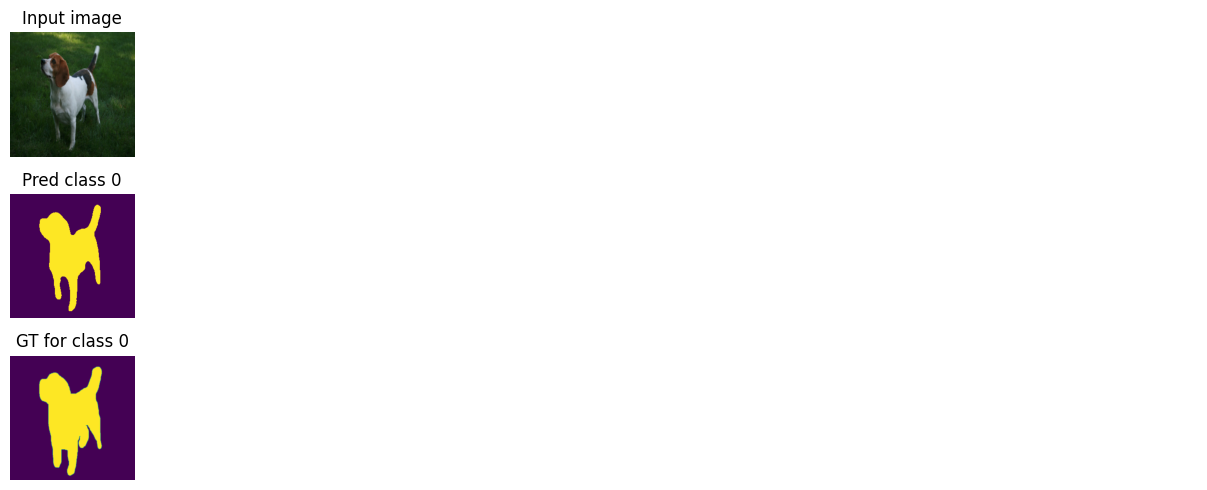

Train loss: 0.05259 | Time: 15m 17s | Val loss: 0.06774
Train_DICE_avg: 0.95546 | Train_Jaccard_avg: 0.91785 | Train_Sensitivity_avg: 0.97275 | Train_Specificity_avg: 0.95496 
Class 0 - Train_DICE: 0.95546 | Train_Jaccard: 0.91785 | Train_Sensitivity: 0.97275 | Train_Specificity: 0.95496 
Val_DICE_avg: 0.94026 | Val_Jaccard_avg: 0.89368 | Val_Sensitivity_avg: 0.96032 | Val_Specificity_avg: 0.94960 
Class 0 - Val_DICE: 0.94026 | Val_Jaccard: 0.89368 | Val_Sensitivity: 0.96032 | Val_Specificity: 0.94960 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05135 | Time: 15m 39s | Val loss: 0.06583
Train_DICE_avg: 0.95593 | Train_Jaccard_avg: 0.91872 | Train_Sensitivity_avg: 0.97386 | Train_Specificity_avg: 0.95368 
Class 0 - Train_DICE: 0.95593 | Train_Jaccard: 0.91872 | Train_Sensitivity: 0.97386 | Train_Specificity: 0.95368 
Val_DICE_avg: 0.94000 | Val_Jaccard_avg: 0.89318 | Val_Sensitivity_avg: 0.95906 | Val_Specificity_avg: 0.94894 
Class 0 - Val_DICE: 0.94000 | Val_Jaccard: 0.89318 | Val_Sensitivity: 0.95906 | Val_Specificity: 0.94894 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05066 | Time: 16m 2s | Val loss: 0.06609
Train_DICE_avg: 0.95608 | Train_Jaccard_avg: 0.91901 | Train_Sensitivity_avg: 0.97404 | Train_Specificity_avg: 0.95445 
Class 0 - Train_DICE: 0.95608 | Train_Jaccard: 0.91901 | Train_Sensitivity: 0.97404 | Train_Specificity: 0.95445 
Val_DICE_avg: 0.93905 | Val_Jaccard_avg: 0.89144 | Val_Sensitivity_avg: 0.96075 | Val_Specificity_avg: 0.94602 
Class 0 - Val_DICE: 0.93905 | Val_Jaccard: 0.89144 | Val_Sensitivity: 0.96075 | Val_Specificity: 0.94602 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04928 | Time: 16m 24s | Val loss: 0.06586
Train_DICE_avg: 0.95714 | Train_Jaccard_avg: 0.92092 | Train_Sensitivity_avg: 0.97469 | Train_Specificity_avg: 0.95586 
Class 0 - Train_DICE: 0.95714 | Train_Jaccard: 0.92092 | Train_Sensitivity: 0.97469 | Train_Specificity: 0.95586 
Val_DICE_avg: 0.93959 | Val_Jaccard_avg: 0.89281 | Val_Sensitivity_avg: 0.95938 | Val_Specificity_avg: 0.94875 
Class 0 - Val_DICE: 0.93959 | Val_Jaccard: 0.89281 | Val_Sensitivity: 0.95938 | Val_Specificity: 0.94875 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04871 | Time: 16m 47s | Val loss: 0.06497
Train_DICE_avg: 0.95695 | Train_Jaccard_avg: 0.92058 | Train_Sensitivity_avg: 0.97565 | Train_Specificity_avg: 0.95362 
Class 0 - Train_DICE: 0.95695 | Train_Jaccard: 0.92058 | Train_Sensitivity: 0.97565 | Train_Specificity: 0.95362 
Val_DICE_avg: 0.93924 | Val_Jaccard_avg: 0.89211 | Val_Sensitivity_avg: 0.96055 | Val_Specificity_avg: 0.94819 
Class 0 - Val_DICE: 0.93924 | Val_Jaccard: 0.89211 | Val_Sensitivity: 0.96055 | Val_Specificity: 0.94819 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

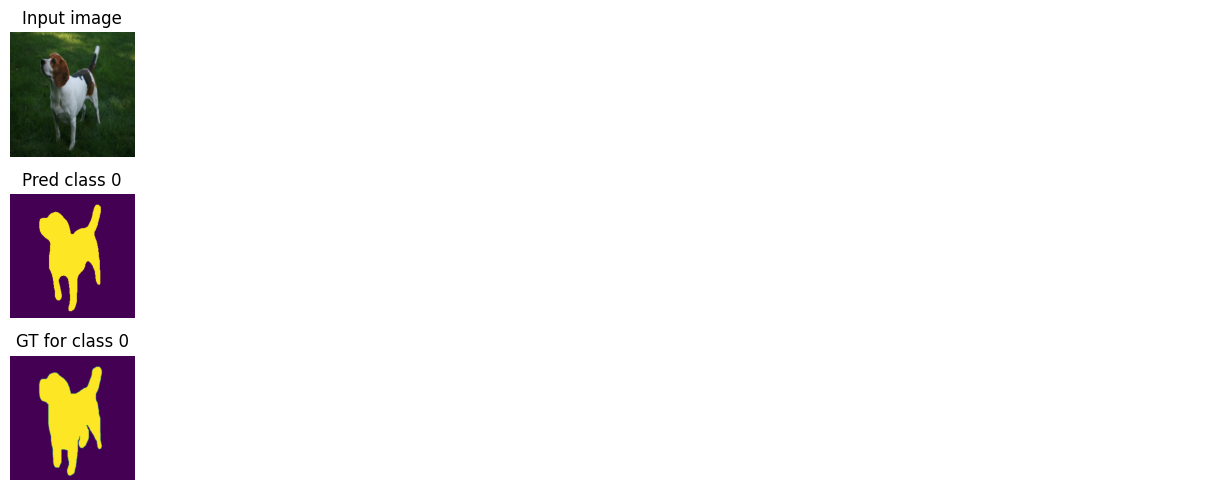

Train loss: 0.04791 | Time: 17m 10s | Val loss: 0.06599
Train_DICE_avg: 0.95787 | Train_Jaccard_avg: 0.92222 | Train_Sensitivity_avg: 0.97500 | Train_Specificity_avg: 0.95628 
Class 0 - Train_DICE: 0.95787 | Train_Jaccard: 0.92222 | Train_Sensitivity: 0.97500 | Train_Specificity: 0.95628 
Val_DICE_avg: 0.94056 | Val_Jaccard_avg: 0.89439 | Val_Sensitivity_avg: 0.95704 | Val_Specificity_avg: 0.95112 
Class 0 - Val_DICE: 0.94056 | Val_Jaccard: 0.89439 | Val_Sensitivity: 0.95704 | Val_Specificity: 0.95112 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04752 | Time: 17m 32s | Val loss: 0.06639
Train_DICE_avg: 0.95754 | Train_Jaccard_avg: 0.92161 | Train_Sensitivity_avg: 0.97584 | Train_Specificity_avg: 0.95450 
Class 0 - Train_DICE: 0.95754 | Train_Jaccard: 0.92161 | Train_Sensitivity: 0.97584 | Train_Specificity: 0.95450 
Val_DICE_avg: 0.93997 | Val_Jaccard_avg: 0.89367 | Val_Sensitivity_avg: 0.95569 | Val_Specificity_avg: 0.95203 
Class 0 - Val_DICE: 0.93997 | Val_Jaccard: 0.89367 | Val_Sensitivity: 0.95569 | Val_Specificity: 0.95203 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04646 | Time: 17m 54s | Val loss: 0.06526
Train_DICE_avg: 0.95864 | Train_Jaccard_avg: 0.92357 | Train_Sensitivity_avg: 0.97619 | Train_Specificity_avg: 0.95631 
Class 0 - Train_DICE: 0.95864 | Train_Jaccard: 0.92357 | Train_Sensitivity: 0.97619 | Train_Specificity: 0.95631 
Val_DICE_avg: 0.94109 | Val_Jaccard_avg: 0.89526 | Val_Sensitivity_avg: 0.95568 | Val_Specificity_avg: 0.95290 
Class 0 - Val_DICE: 0.94109 | Val_Jaccard: 0.89526 | Val_Sensitivity: 0.95568 | Val_Specificity: 0.95290 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04619 | Time: 18m 17s | Val loss: 0.06453
Train_DICE_avg: 0.95844 | Train_Jaccard_avg: 0.92327 | Train_Sensitivity_avg: 0.97650 | Train_Specificity_avg: 0.95556 
Class 0 - Train_DICE: 0.95844 | Train_Jaccard: 0.92327 | Train_Sensitivity: 0.97650 | Train_Specificity: 0.95556 
Val_DICE_avg: 0.94136 | Val_Jaccard_avg: 0.89553 | Val_Sensitivity_avg: 0.95679 | Val_Specificity_avg: 0.95137 
Class 0 - Val_DICE: 0.94136 | Val_Jaccard: 0.89553 | Val_Sensitivity: 0.95679 | Val_Specificity: 0.95137 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04603 | Time: 18m 39s | Val loss: 0.06382
Train_DICE_avg: 0.95834 | Train_Jaccard_avg: 0.92310 | Train_Sensitivity_avg: 0.97654 | Train_Specificity_avg: 0.95585 
Class 0 - Train_DICE: 0.95834 | Train_Jaccard: 0.92310 | Train_Sensitivity: 0.97654 | Train_Specificity: 0.95585 
Val_DICE_avg: 0.93948 | Val_Jaccard_avg: 0.89256 | Val_Sensitivity_avg: 0.95962 | Val_Specificity_avg: 0.94873 
Class 0 - Val_DICE: 0.93948 | Val_Jaccard: 0.89256 | Val_Sensitivity: 0.95962 | Val_Specificity: 0.94873 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

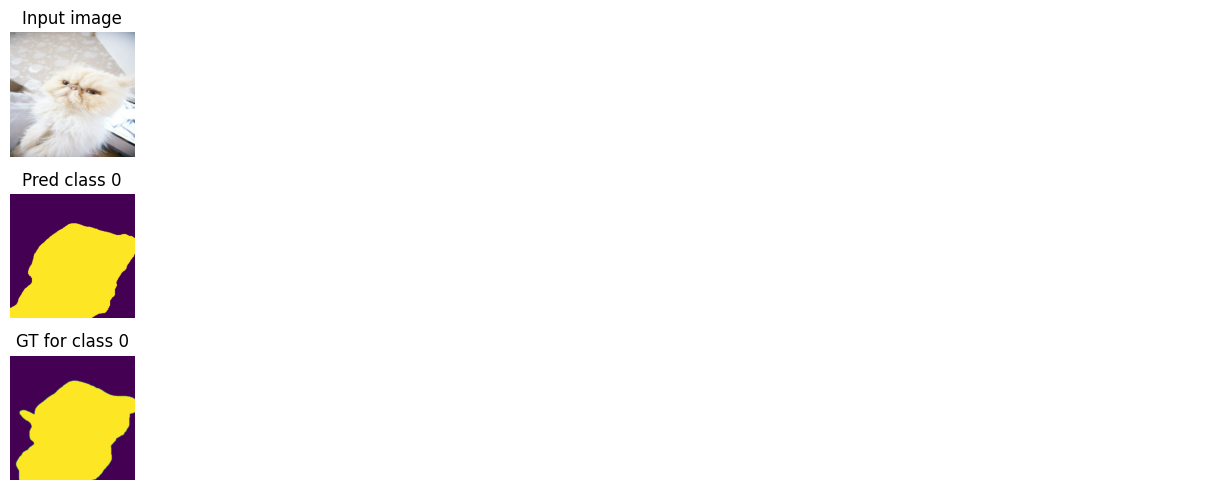

Train loss: 0.04551 | Time: 19m 2s | Val loss: 0.06342
Train_DICE_avg: 0.95866 | Train_Jaccard_avg: 0.92373 | Train_Sensitivity_avg: 0.97670 | Train_Specificity_avg: 0.95708 
Class 0 - Train_DICE: 0.95866 | Train_Jaccard: 0.92373 | Train_Sensitivity: 0.97670 | Train_Specificity: 0.95708 
Val_DICE_avg: 0.94030 | Val_Jaccard_avg: 0.89366 | Val_Sensitivity_avg: 0.95918 | Val_Specificity_avg: 0.94950 
Class 0 - Val_DICE: 0.94030 | Val_Jaccard: 0.89366 | Val_Sensitivity: 0.95918 | Val_Specificity: 0.94950 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04510 | Time: 19m 25s | Val loss: 0.06604
Train_DICE_avg: 0.95874 | Train_Jaccard_avg: 0.92386 | Train_Sensitivity_avg: 0.97684 | Train_Specificity_avg: 0.95725 
Class 0 - Train_DICE: 0.95874 | Train_Jaccard: 0.92386 | Train_Sensitivity: 0.97684 | Train_Specificity: 0.95725 
Val_DICE_avg: 0.94138 | Val_Jaccard_avg: 0.89549 | Val_Sensitivity_avg: 0.95165 | Val_Specificity_avg: 0.95571 
Class 0 - Val_DICE: 0.94138 | Val_Jaccard: 0.89549 | Val_Sensitivity: 0.95165 | Val_Specificity: 0.95571 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04508 | Time: 19m 48s | Val loss: 0.06366
Train_DICE_avg: 0.95870 | Train_Jaccard_avg: 0.92374 | Train_Sensitivity_avg: 0.97670 | Train_Specificity_avg: 0.95570 
Class 0 - Train_DICE: 0.95870 | Train_Jaccard: 0.92374 | Train_Sensitivity: 0.97670 | Train_Specificity: 0.95570 
Val_DICE_avg: 0.94051 | Val_Jaccard_avg: 0.89406 | Val_Sensitivity_avg: 0.95697 | Val_Specificity_avg: 0.95078 
Class 0 - Val_DICE: 0.94051 | Val_Jaccard: 0.89406 | Val_Sensitivity: 0.95697 | Val_Specificity: 0.95078 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04433 | Time: 20m 10s | Val loss: 0.06262
Train_DICE_avg: 0.95912 | Train_Jaccard_avg: 0.92454 | Train_Sensitivity_avg: 0.97743 | Train_Specificity_avg: 0.95699 
Class 0 - Train_DICE: 0.95912 | Train_Jaccard: 0.92454 | Train_Sensitivity: 0.97743 | Train_Specificity: 0.95699 
Val_DICE_avg: 0.93942 | Val_Jaccard_avg: 0.89217 | Val_Sensitivity_avg: 0.96101 | Val_Specificity_avg: 0.94829 
Class 0 - Val_DICE: 0.93942 | Val_Jaccard: 0.89217 | Val_Sensitivity: 0.96101 | Val_Specificity: 0.94829 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04402 | Time: 20m 32s | Val loss: 0.06298
Train_DICE_avg: 0.95952 | Train_Jaccard_avg: 0.92521 | Train_Sensitivity_avg: 0.97723 | Train_Specificity_avg: 0.95800 
Class 0 - Train_DICE: 0.95952 | Train_Jaccard: 0.92521 | Train_Sensitivity: 0.97723 | Train_Specificity: 0.95800 
Val_DICE_avg: 0.93836 | Val_Jaccard_avg: 0.89048 | Val_Sensitivity_avg: 0.96155 | Val_Specificity_avg: 0.94692 
Class 0 - Val_DICE: 0.93836 | Val_Jaccard: 0.89048 | Val_Sensitivity: 0.96155 | Val_Specificity: 0.94692 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

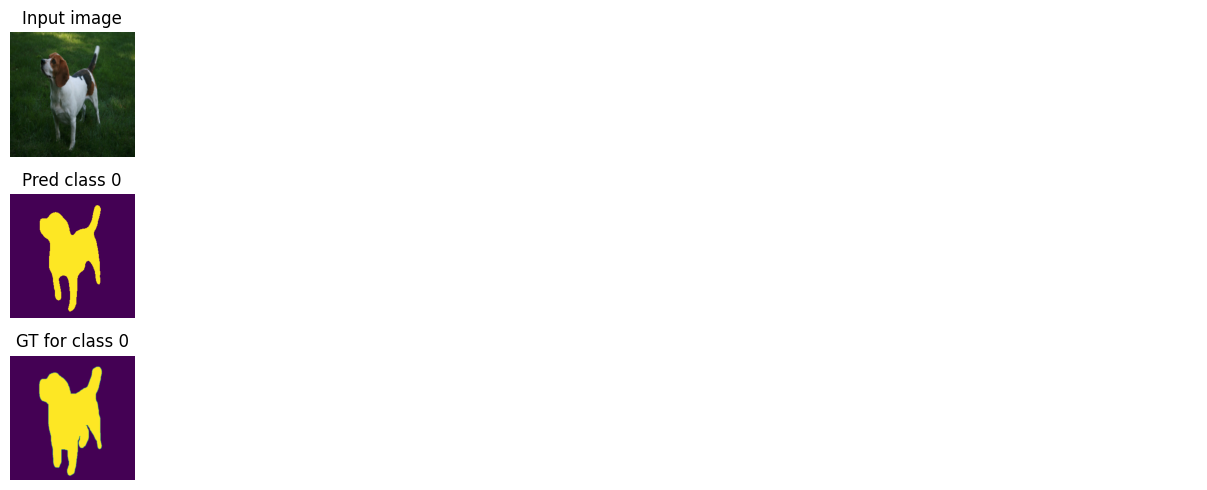

Train loss: 0.04385 | Time: 20m 56s | Val loss: 0.06231
Train_DICE_avg: 0.95959 | Train_Jaccard_avg: 0.92530 | Train_Sensitivity_avg: 0.97707 | Train_Specificity_avg: 0.95886 
Class 0 - Train_DICE: 0.95959 | Train_Jaccard: 0.92530 | Train_Sensitivity: 0.97707 | Train_Specificity: 0.95886 
Val_DICE_avg: 0.93954 | Val_Jaccard_avg: 0.89215 | Val_Sensitivity_avg: 0.96060 | Val_Specificity_avg: 0.94823 
Class 0 - Val_DICE: 0.93954 | Val_Jaccard: 0.89215 | Val_Sensitivity: 0.96060 | Val_Specificity: 0.94823 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04356 | Time: 21m 18s | Val loss: 0.06304
Train_DICE_avg: 0.95948 | Train_Jaccard_avg: 0.92517 | Train_Sensitivity_avg: 0.97771 | Train_Specificity_avg: 0.95746 
Class 0 - Train_DICE: 0.95948 | Train_Jaccard: 0.92517 | Train_Sensitivity: 0.97771 | Train_Specificity: 0.95746 
Val_DICE_avg: 0.93922 | Val_Jaccard_avg: 0.89158 | Val_Sensitivity_avg: 0.96005 | Val_Specificity_avg: 0.94857 
Class 0 - Val_DICE: 0.93922 | Val_Jaccard: 0.89158 | Val_Sensitivity: 0.96005 | Val_Specificity: 0.94857 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04292 | Time: 21m 41s | Val loss: 0.06242
Train_DICE_avg: 0.96003 | Train_Jaccard_avg: 0.92617 | Train_Sensitivity_avg: 0.97819 | Train_Specificity_avg: 0.95700 
Class 0 - Train_DICE: 0.96003 | Train_Jaccard: 0.92617 | Train_Sensitivity: 0.97819 | Train_Specificity: 0.95700 
Val_DICE_avg: 0.93902 | Val_Jaccard_avg: 0.89136 | Val_Sensitivity_avg: 0.96130 | Val_Specificity_avg: 0.94761 
Class 0 - Val_DICE: 0.93902 | Val_Jaccard: 0.89136 | Val_Sensitivity: 0.96130 | Val_Specificity: 0.94761 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04250 | Time: 22m 3s | Val loss: 0.06191
Train_DICE_avg: 0.96049 | Train_Jaccard_avg: 0.92697 | Train_Sensitivity_avg: 0.97809 | Train_Specificity_avg: 0.95830 
Class 0 - Train_DICE: 0.96049 | Train_Jaccard: 0.92697 | Train_Sensitivity: 0.97809 | Train_Specificity: 0.95830 
Val_DICE_avg: 0.93861 | Val_Jaccard_avg: 0.89059 | Val_Sensitivity_avg: 0.96181 | Val_Specificity_avg: 0.94655 
Class 0 - Val_DICE: 0.93861 | Val_Jaccard: 0.89059 | Val_Sensitivity: 0.96181 | Val_Specificity: 0.94655 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04245 | Time: 22m 26s | Val loss: 0.06180
Train_DICE_avg: 0.96037 | Train_Jaccard_avg: 0.92673 | Train_Sensitivity_avg: 0.97800 | Train_Specificity_avg: 0.95785 
Class 0 - Train_DICE: 0.96037 | Train_Jaccard: 0.92673 | Train_Sensitivity: 0.97800 | Train_Specificity: 0.95785 
Val_DICE_avg: 0.93880 | Val_Jaccard_avg: 0.89080 | Val_Sensitivity_avg: 0.96196 | Val_Specificity_avg: 0.94655 
Class 0 - Val_DICE: 0.93880 | Val_Jaccard: 0.89080 | Val_Sensitivity: 0.96196 | Val_Specificity: 0.94655 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

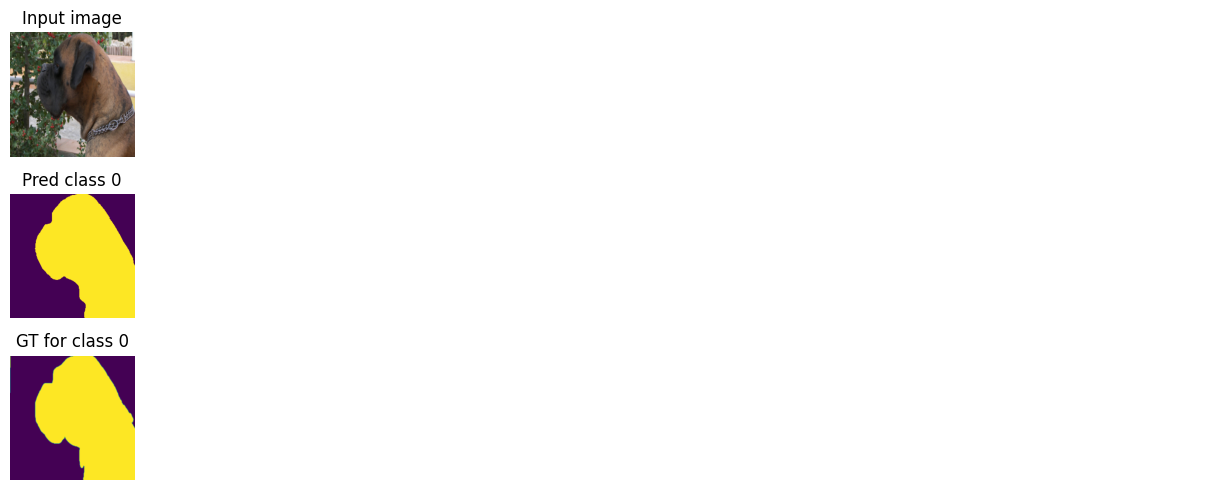

Train loss: 0.04234 | Time: 22m 49s | Val loss: 0.06255
Train_DICE_avg: 0.96043 | Train_Jaccard_avg: 0.92689 | Train_Sensitivity_avg: 0.97802 | Train_Specificity_avg: 0.95809 
Class 0 - Train_DICE: 0.96043 | Train_Jaccard: 0.92689 | Train_Sensitivity: 0.97802 | Train_Specificity: 0.95809 
Val_DICE_avg: 0.93942 | Val_Jaccard_avg: 0.89192 | Val_Sensitivity_avg: 0.96005 | Val_Specificity_avg: 0.94877 
Class 0 - Val_DICE: 0.93942 | Val_Jaccard: 0.89192 | Val_Sensitivity: 0.96005 | Val_Specificity: 0.94877 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [20]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [21]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]



Global Performance Metrics:
Loss mean: 0.06215, std: 0.01041
Dice Coefficient mean: 0.94661, std: 0.04463
Jaccard Index mean: 0.90160, std: 0.07025
Sensitivity mean: 0.94640, std: 0.05055
Specificity mean: 0.96665, std: 0.04638

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.94661, std: 0.04463
Jaccard mean: 0.90160, std: 0.07025
Sensitivity mean: 0.94640, std: 0.05055
Specificity mean: 0.96665, std: 0.04638
